# **<center>Machine Learning appliqué à l'identification des défauts de crédit**

In [1]:
# Librairies
import pandas as pd
import numpy as np
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV, cross_val_score,
    RandomizedSearchCV, cross_validate,
    StratifiedKFold
)
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from credit_card_default_utils import *

## Introduction

![](img_appli.png)

L'apprentissage automatique (machine learning) peut être utilisé pour identifier les défauts de crédit, ce qui est crucial pour les institutions financières, les prêteurs et les établissements de crédit afin de minimiser les risques et les pertes associés aux prêts. Voici les étapes générales pour appliquer l'apprentissage automatique à la détection des défauts de crédit :

**1. Collecte de données** :

Rassemblez des données historiques sur les prêts, y compris les caractéristiques du demandeur, les antécédents de crédit, les renseignements financiers, les détails du prêt et les résultats (par exemple, si le prêt a été remboursé ou en défaut).

**2. Prétraitement des données** :

Nettoyez les données en traitant les valeurs manquantes, les valeurs aberrantes et en normalisant les caractéristiques.
Encodez les variables catégorielles en utilisant des techniques comme l'encodage one-hot ou la représentation vectorielle.

**3. Séparation des données** :

Divisez les données en ensembles d'entraînement, de validation et de test pour évaluer la performance du modèle.

**4. Sélection du modèle** :

Choisissez un algorithme d'apprentissage automatique adapté à la tâche. Les méthodes couramment utilisées pour la détection des défauts de crédit incluent la régression logistique, les arbres de décision, les forêts aléatoires, les machines à vecteurs de support (SVM) et les réseaux de neurones.

**5. Entraînement du modèle** :

Entraînez le modèle sur l'ensemble d'entraînement en utilisant les données historiques pour qu'il puisse apprendre à distinguer les emprunteurs à risque de ceux à faible risque.

**6. Évaluation du modèle** :

Utilisez l'ensemble de validation pour ajuster les hyperparamètres du modèle et évaluer ses performances à l'aide de mesures telles que la précision, le rappel, la F1-score et la courbe ROC-AUC.

**7. Optimisation du modèle** :

Optimisez le modèle en ajustant ses hyperparamètres, en appliquant des techniques de régularisation et en évaluant différentes stratégies de gestion de déséquilibre de classe (s'il y a un déséquilibre significatif entre les défauts de crédit et les remboursements).

**8. Test du modèle** :

Évaluez finalement la performance du modèle sur l'ensemble de test pour obtenir une estimation de sa capacité à généraliser sur de nouvelles données.

**9. Déploiement du modèle** :

Une fois que le modèle atteint des performances satisfaisantes, il peut être déployé pour automatiser le processus de décision de crédit ou servir de support à la prise de décision humaine.

**10. Surveillance continue** :

Surveillez en continu les performances du modèle après son déploiement, car les comportements des emprunteurs et les conditions économiques peuvent évoluer.

L'application de l'apprentissage automatique pour la détection des défauts de crédit peut permettre de prendre des décisions plus précises, de réduire les risques de crédit et d'optimiser le rendement du portefeuille de prêts. Il est important de noter que la gestion des risques et la conformité réglementaire doivent être prises en compte dans ce contexte, car la détection des défauts de crédit implique des considérations éthiques et légales.

À la fin de ce projet, vous serez familiarisé avec une approche réelle d'une tâche d'apprentissage automatique, depuis la collecte et le nettoyage des données jusqu'à la création et le réglage d'un classificateur. Un autre point à retenir est de comprendre l'approche générale des projets d'apprentissage automatique, qui peut ensuite être appliquée à de nombreuses tâches différentes, qu'il s'agisse de prédire le taux de désabonnement ou d'estimer le prix d'un nouveau bien immobilier dans un quartier.

## Données

L’ensemble de données utilisé dans ce chapitre a été collecté dans une banque taïwanaise en octobre 2005. L’étude était motivée par le fait qu’à cette époque, de plus en plus de banques accordaient du crédit (en espèces ou par carte de crédit) à des clients consentants. En outre, de plus en plus de personnes, quelle que soit leur capacité de remboursement, ont accumulé des dettes importantes. Tout cela a conduit à des situations dans lesquelles certaines personnes n’ont pas pu rembourser leurs dettes impayées. En d’autres termes, ils n’ont pas remboursé leurs prêts.

L'objectif de l'étude est d'utiliser certaines informations de base sur les clients (telles que le sexe, l'âge et le niveau d'éducation), ainsi que leurs antécédents de remboursement, pour prédire lesquels d'entre eux étaient susceptibles de faire défaut. Le contexte peut être décrit comme suit : en utilisant les 6 mois précédents d'historique de remboursement (avril-septembre 2005), nous essayons de prédire si le client fera défaut en octobre 2005. Naturellement, une telle étude pourrait être généralisée pour prédire si un client sera en défaut de paiement le mois suivant, au cours du trimestre suivant, et ainsi de suite.

Source des données : https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [3]:
DownloadRawData()
raw_df = ReadRawData()
raw_df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

***Explication des fonctions DownloadRawData() et ReadRawData()***

Ces deux fonctions Python ont pour objectif de télécharger et importer des données brutes à partir d'une source en ligne, puis de les charger dans un DataFrame Pandas pour l'analyse ultérieure. Voici comment elles fonctionnent :

1. DownloadRawData(): Cette fonction effectue les étapes suivantes :

    - Définit l'URL du fichier ZIP que vous souhaitez télécharger.

    - Spécifie le nom du fichier ZIP local dans lequel les données seront stockées.

    - Utilise la bibliothèque requests pour télécharger le fichier ZIP depuis l'URL.

    - Enregistre le contenu téléchargé dans le fichier ZIP local.

    - Ensuite, la fonction extrait les fichiers du ZIP dans le répertoire actuel.

2. ReadRawData(): Cette fonction effectue les étapes suivantes :

    - Spécifie le chemin du fichier de données extrait à partir du ZIP. Dans ce cas, le fichier s'appelle "default of credit card clients.xls".

    - Utilise la bibliothèque Pandas (pd.read_excel()) pour charger le contenu du fichier Excel dans un DataFrame Pandas. Le paramètre header=1 indique que la première ligne du fichier Excel doit être ignorée et que la deuxième ligne (ligne d'en-tête) doit être utilisée comme nom de colonne.
    
    - La fonction retourne le DataFrame contenant les données brutes.

En utilisant ces deux fonctions, vous pouvez automatiser le téléchargement et l'importation de données brutes à partir de l'URL du fichier ZIP. Une fois les données chargées dans le DataFrame Pandas, vous pouvez les manipuler et les analyser selon vos besoins.

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
raw_df.ID.nunique()

30000

La colonne ID identifie de manière unique chaque observation de la dataframe. Donc chaque ligne de la dataframe correspond à un seul client. Voici la signification de chaque variable (Source : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) :

- ***ID*** : Identifiant de chaque client

- ***LIMIT_BAL*** : Montant du crédit accordé en dollars taïwanais (comprend le crédit individuel et le crédit familial/complémentaire)

- ***SEX*** : Sexe (1=homme, 2=femme)

- ***EDUCATION*** : Niveau d'éducation (1=diplômé d'une école supérieure, 2=université, 3=lycée, 4=autre, 5=inconnu, 6=inconnu)

- ***MARRIAGE*** : Statut matrimonial (1=marié, 2=célibataire, 3=autre)

- ***AGE*** : Âge en années

- ***PAY_0*** : Statut de paiement en septembre 2005 (-1=paiement régulier, 1=retard de paiement d'un mois, 2=retard de paiement de deux mois, … 8=retard de paiement de huit mois, 9=retard de paiement de neuf mois et plus)

- ***PAY_2*** : Statut de paiement en août 2005 (échelle identique à celle ci-dessus)

- ***PAY_3*** : Statut de paiement en juillet 2005 (échelle identique à celle ci-dessus)

- ***PAY_4*** : Statut de paiement en juin 2005 (échelle identique à celle ci-dessus)

- ***PAY_5*** : Statut de paiement en mai 2005 (échelle identique à celle ci-dessus)

- ***PAY_6*** : Statut de paiement en avril 2005 (échelle identique à celle ci-dessus)

- ***BILL_AMT1*** : Montant de la facture en septembre 2005 (en dollars taïwanais)

- ***BILL_AMT2*** : Montant de la facture en août 2005 (en dollars taïwanais)

- ***BILL_AMT3*** : Montant de la facture en juillet 2005 (en dollars taïwanais)

- ***BILL_AMT4*** : Montant de la facture en juin 2005 (en dollars taïwanais)

- ***BILL_AMT5*** : Montant de la facture en mai 2005 (en dollars taïwanais)

- ***BILL_AMT6*** : Montant de la facture en avril 2005 (en dollars taïwanais)

- ***PAY_AMT1*** : Montant du paiement précédent en septembre 2005 (en dollars taïwanais)

- ***PAY_AMT2*** : Montant du paiement précédent en août 2005 (en dollars taïwanais)

- ***PAY_AMT3*** : Montant du paiement précédent en juillet 2005 (en dollars taïwanais)

- ***PAY_AMT4*** : Montant du paiement précédent en juin 2005 (en dollars taïwanais)

- ***PAY_AMT5*** : Montant du paiement précédent en mai 2005 (en dollars taïwanais)

- ***PAY_AMT6*** : Montant du paiement précédent en avril 2005 (en dollars taïwanais)

- ***default payment next month*** : Défaut de paiement (1=oui, 0=non)

D'après la description des variables, les colonnes `SEX`, `EDUCATION` et `MARRIAGE` sont en réalité des colonnes catégorielles car elles décrivent des catégories ou des classes discrètes plutôt que des valeurs numériques continues.

Par ailleurs, les colonnes `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5` et `PAY_6` ne sont pas catégorielles, mais plutôt des variables ordinales. Elles représentent le statut de paiement pour différents mois, et elles ont une échelle d'ordre, ce qui signifie que les valeurs ont une signification hiérarchique. Ces colonnes sont souvent utilisées pour indiquer le nombre de mois de retard dans le paiement, et elles sont généralement codées avec des entiers tels que -1 pour "paiement régulier", 1 pour "retard d'un mois", 2 pour "retard de deux mois", et ainsi de suite. Les valeurs numériques dans ces colonnes ont une signification progressive, ce qui en fait des variables ordinales. Vous pouvez les considérer comme des variables numériques discrètes, et elles peuvent être incluses dans des analyses statistiques et des modèles d'apprentissage automatique en tant que telles. Par exemple, vous pourriez utiliser ces variables pour analyser les comportements de paiement des clients et leur relation avec les défauts de crédit.

In [6]:
df = FormattageRawData()

***Explication de la fonction FormattageRawData()***

La fonction FormattageRawData effectue plusieurs tâches de prétraitement sur les données brutes extraites. Voici comment cette fonction travaille :

1. Lecture des données brutes :

    - Tout d'abord, elle utilise la fonction ReadRawData pour lire les données brutes à partir du fichier Excel et les stocker dans le DataFrame raw_data.

2. Renommage des noms de colonne :

    - La fonction renomme les noms de colonne en mettant en minuscules et en remplaçant les espaces par des underscores (_) pour rendre les noms de colonne plus conviviaux et cohérents.

3. Création de nouveaux noms de colonne :

    - La fonction crée de nouveaux noms de colonne en combinant des variables et des mois, par exemple, "payment_status_sep", "payment_status_aug", etc. Ces nouveaux noms de colonne sont stockés dans la liste new_column_names.

    - Elle définit un dictionnaire rename_dict pour mapper les anciens noms de colonne aux nouveaux noms, puis renomme effectivement les colonnes du DataFrame.

4. Mappage des nombres aux chaînes de caractères :

    - La fonction utilise des dictionnaires pour mapper des valeurs numériques aux chaînes de caractères pour les colonnes "sex," "education," "marriage," et "payment_status." Par exemple, elle mappe 1 à "Male" et 2 à "Female" pour la colonne "sex."

5. Conversion des colonnes en variables catégorielles :

    - Certaines colonnes, telles que "sex," "marriage," "education," et "default_payment_next_month," sont converties en variables catégorielles en utilisant le type de données Pandas "category."

6. Conversion des colonnes "payment_status" en variables ordinales :

    - Les colonnes "payment_status_sep," "payment_status_aug," etc., sont converties en variables ordinales. Cela signifie que l'ordre des catégories a une signification. Par exemple, les paiements retardés de 1 mois sont ordonnés avant ceux de 2 mois. Ces colonnes sont également converties en utilisant le type de données Pandas "CategoricalDtype" avec un ordre spécifique défini par le dictionnaire payment_status.

7. Sauvegarde au format CSV :

    - Enfin, la fonction sauvegarde le DataFrame formaté au format CSV dans un fichier nommé "credit_card_default.csv" en utilisant la méthode to_csv.

8. Retour des données reformatées :

    - La fonction retourne le DataFrame raw_data contenant les données après le prétraitement.

Ainsi, cette fonction prépare les données brutes pour une analyse ultérieure en les renommant, en mappant des valeurs, en convertissant des colonnes en types appropriés et en les sauvegardant dans un fichier CSV. Cela permet d'obtenir un ensemble de données prêt pour l'analyse ou l'apprentissage automatique.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          30000 non-null  int64   
 1   limit_bal                   30000 non-null  int64   
 2   sex                         30000 non-null  category
 3   education                   30000 non-null  category
 4   marriage                    30000 non-null  category
 5   age                         30000 non-null  int64   
 6   payment_status_sep          30000 non-null  category
 7   payment_status_aug          30000 non-null  category
 8   payment_status_jul          30000 non-null  category
 9   payment_status_jun          30000 non-null  category
 10  payment_status_may          30000 non-null  category
 11  payment_status_apr          30000 non-null  category
 12  bill_statement_sep          30000 non-null  int64   
 13  bill_statement_a

In [8]:
df['payment_status_sep']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: payment_status_sep, Length: 30000, dtype: category
Categories (12, int64): [-2 < -1 < 0 < 1 ... 6 < 7 < 8 < 9]

## Analyse exploratoire des données


L'analyse exploratoire des données est une étape essentielle dans tout projet de Machine Learning. Cette étape vous permet de comprendre vos données, de mettre en évidence des tendances, des relations et des anomalies, et de préparer les données pour la modélisation.

In [9]:
# Résumé statistique des variables numériques
df.describe().T

count           mean            std       min  \
id                    30000.0   15000.500000    8660.398374       1.0   
limit_bal             30000.0  167484.322667  129747.661567   10000.0   
age                   30000.0      35.485500       9.217904      21.0   
bill_statement_sep    30000.0   51223.330900   73635.860576 -165580.0   
bill_statement_aug    30000.0   49179.075167   71173.768783  -69777.0   
bill_statement_jul    30000.0   47013.154800   69349.387427 -157264.0   
bill_statement_jun    30000.0   43262.948967   64332.856134 -170000.0   
bill_statement_may    30000.0   40311.400967   60797.155770  -81334.0   
bill_statement_apr    30000.0   38871.760400   59554.107537 -339603.0   
previous_payment_sep  30000.0    5663.580500   16563.280354       0.0   
previous_payment_aug  30000.0    5921.163500   23040.870402       0.0   
previous_payment_jul  30000.0    5225.681500   17606.961470       0.0   
previous_payment_jun  30000.0    4826.076867   15666.159744       0.0   
previous_payment_may  30000.0    4799.387633   15278.305679       0.0   
previous_payment_apr  30000.0    5215.502567   17777.465775       0.0   

                           25%       50%        75%        max  
id                     7500.75   15000.5   22500.25    30000.0  
limit_bal             50000.00  140000.0  240000.00  1000000.0  
age                      28.00      34.0      41.00       79.0  
bill_statement_sep     3558.75   22381.5   67091.00   964511.0  
bill_statement_aug     2984.75   21200.0   64006.25   983931.0  
bill_statement_jul     2666.25   20088.5   60164.75  1664089.0  
bill_statement_jun     2326.75   19052.0   54506.00   891586.0  
bill_statement_may     1763.00   18104.5   50190.50   927171.0  
bill_statement_apr     1256.00   17071.0   49198.25   961664.0  
previous_payment_sep   1000.00    2100.0    5006.00   873552.0  
previous_payment_aug    833.00    2009.0    5000.00  1684259.0  
previous_payment_jul    390.00    1800.0    4505.00   896040.0  
previous_payment_jun    296.00    1500.0    4013.25   621000.0  
previous_payment_may    252.50    1500.0    4031.50   426529.0  
previous_payment_apr    117.75    1500.0    4000.00   528666.0

In [10]:
# Résumé statistique des variables catégorielles
df.describe(include=['category']).T

count unique         top   freq
sex                         30000      2      Female  18112
education                   30000      4  University  14030
marriage                    30000      3      Single  15964
payment_status_sep          30000     11           0  14737
payment_status_aug          30000     11           0  15730
payment_status_jul          30000     11           0  15764
payment_status_jun          30000     11           0  16455
payment_status_may          30000     10           0  16947
payment_status_apr          30000     10           0  16286
default_payment_next_month  30000      2           0  23364

Passons à l'analyse des distributions des variables.

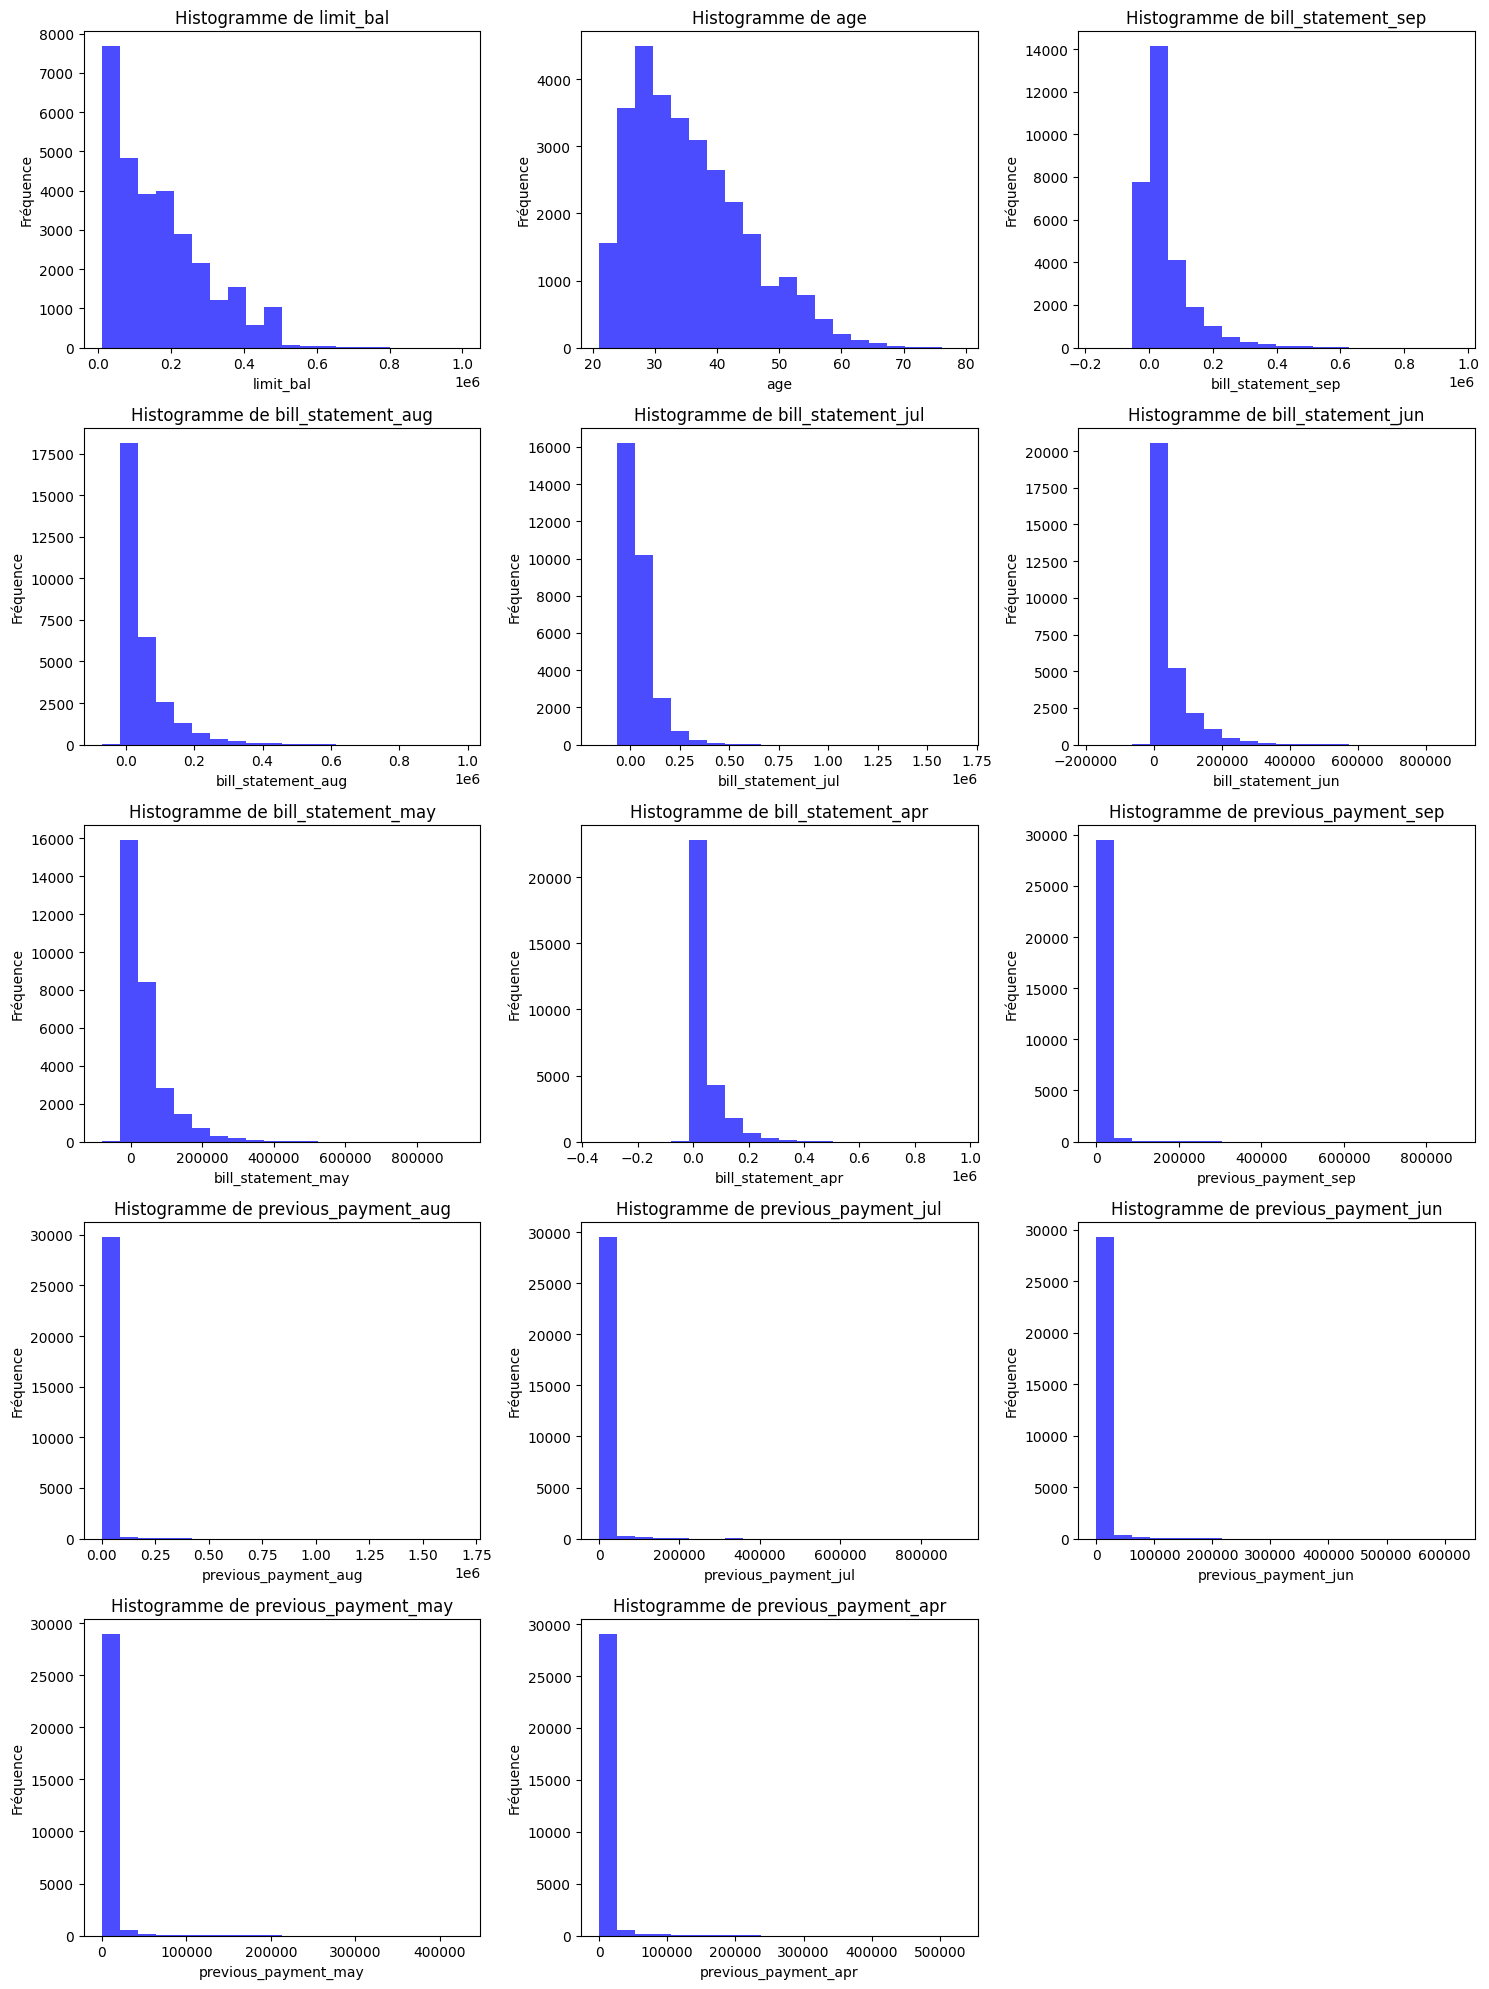

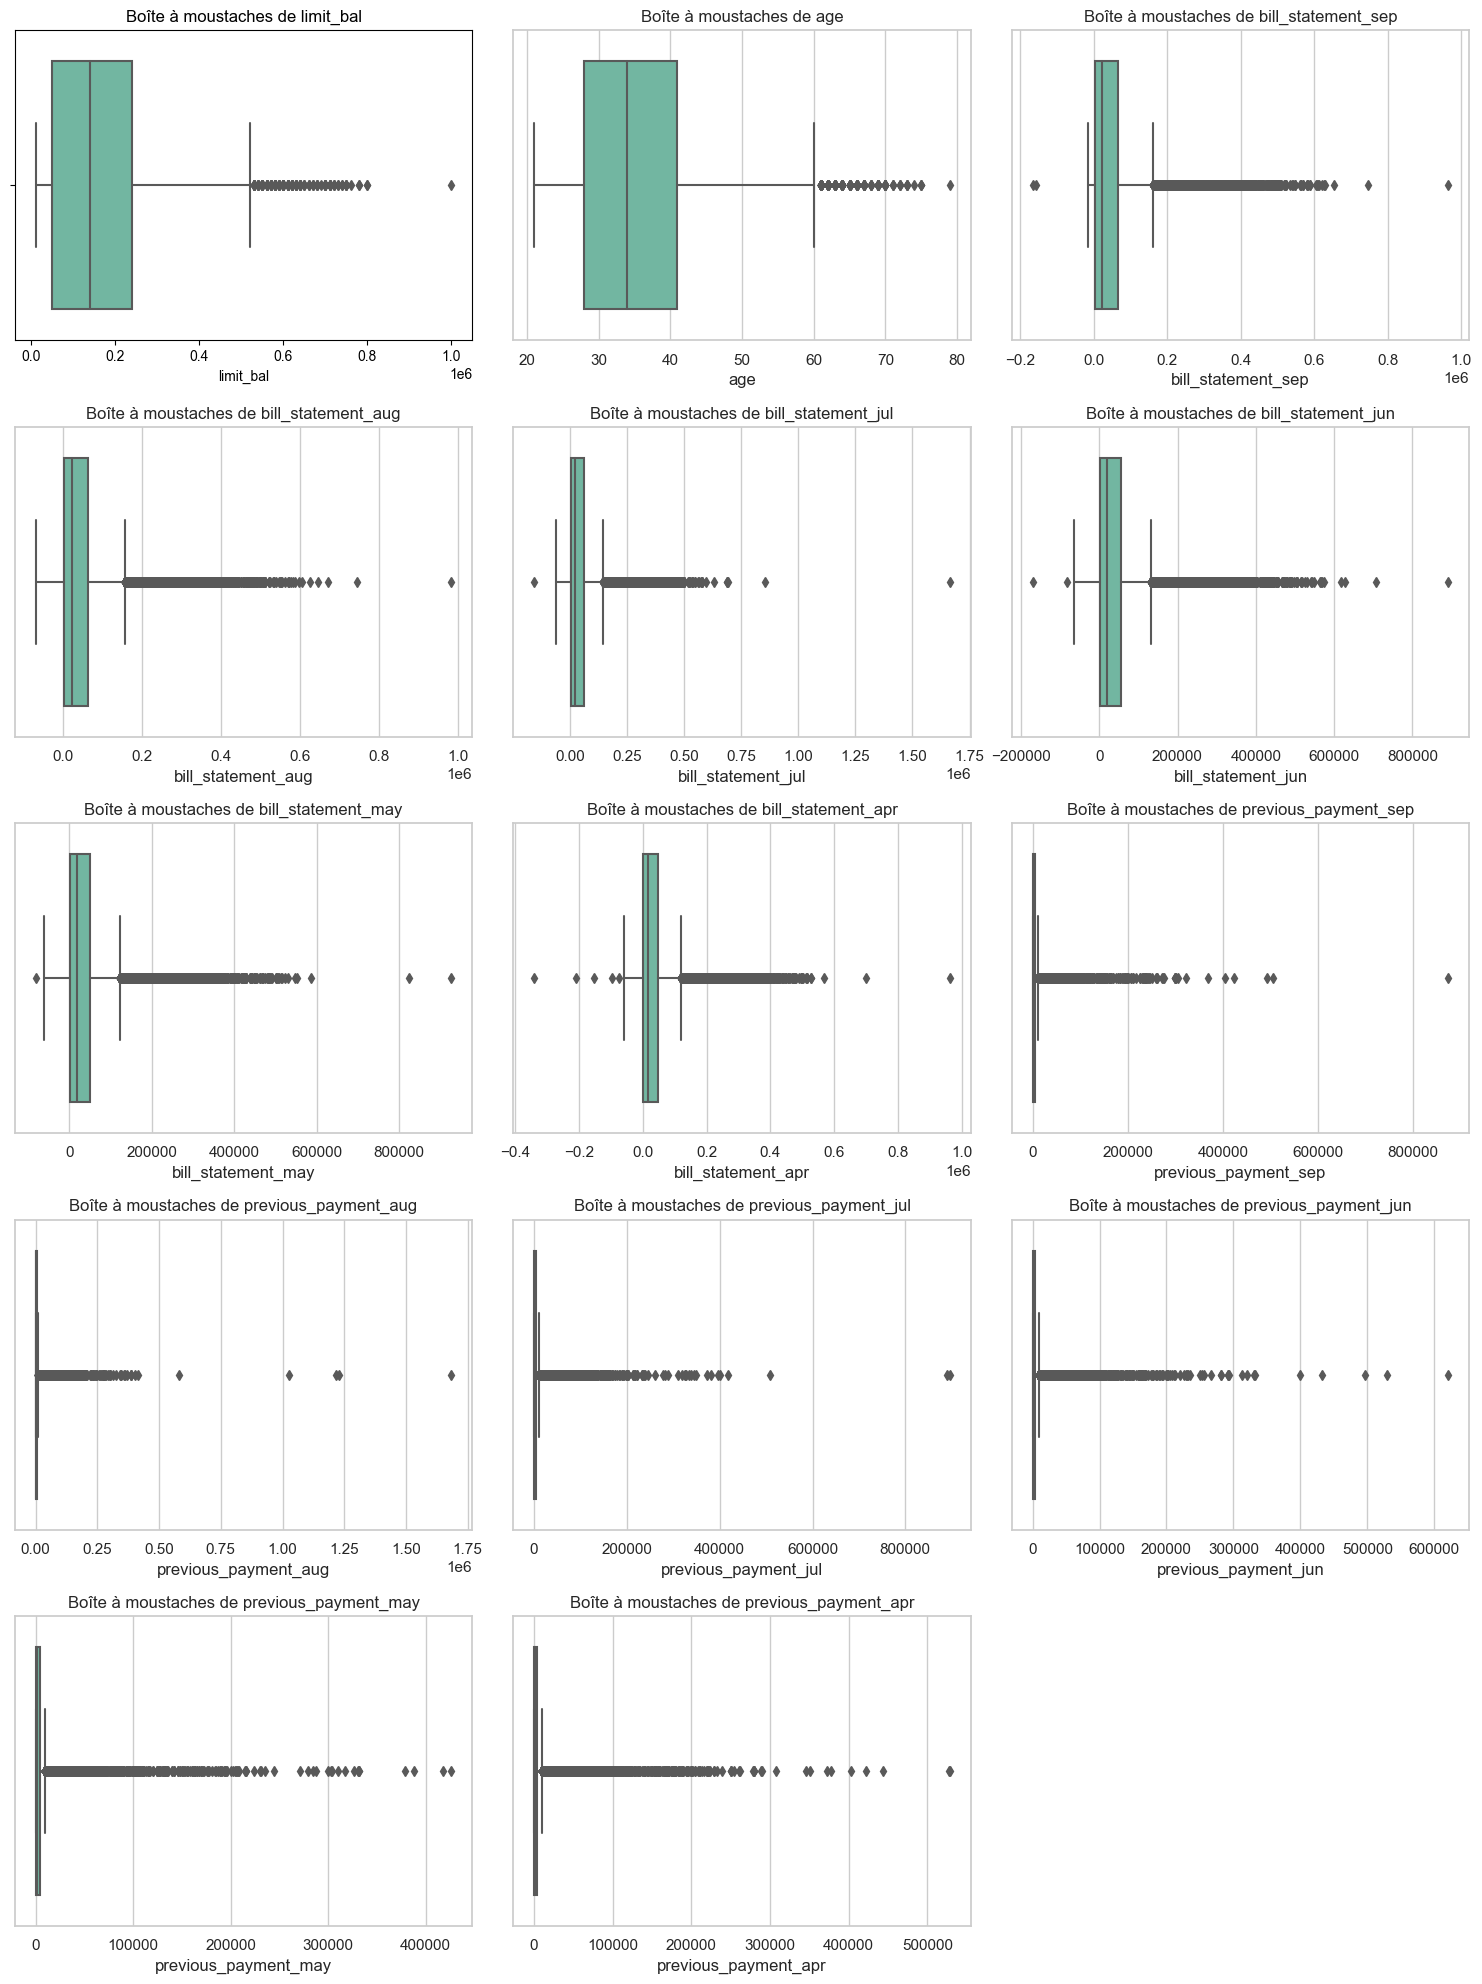

Analyse univariée de la colonne 'sex':

Fréquence des catégories :
sex
Female    0.603733
Male      0.396267
Name: proportion, dtype: float64



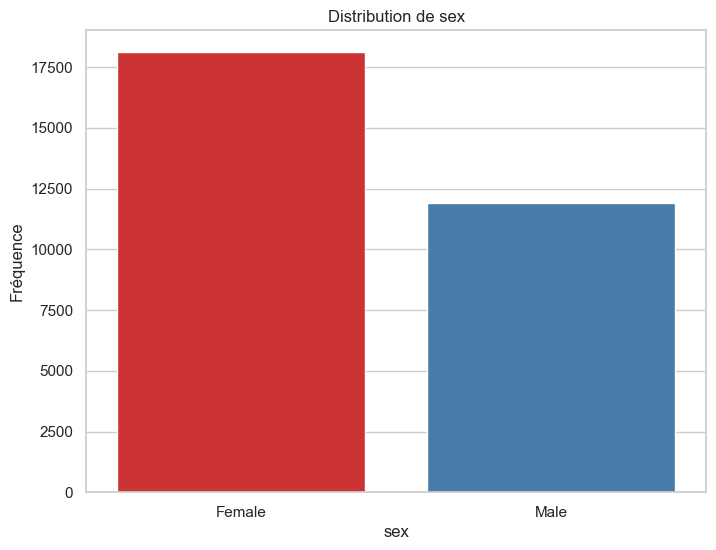

Statistiques descriptives pour sex:

count      30000
unique         2
top       Female
freq       18112
Name: sex, dtype: object


Analyse univariée de la colonne 'education':

Fréquence des catégories :
education
University         0.467667
Graduate school    0.352833
High school        0.163900
Others             0.015600
Name: proportion, dtype: float64



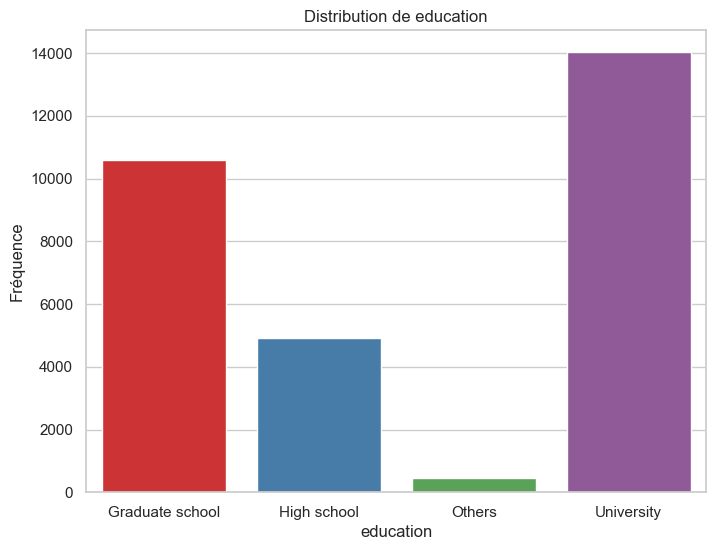

Statistiques descriptives pour education:

count          30000
unique             4
top       University
freq           14030
Name: education, dtype: object


Analyse univariée de la colonne 'marriage':

Fréquence des catégories :
marriage
Single     0.532133
Married    0.455300
Others     0.012567
Name: proportion, dtype: float64



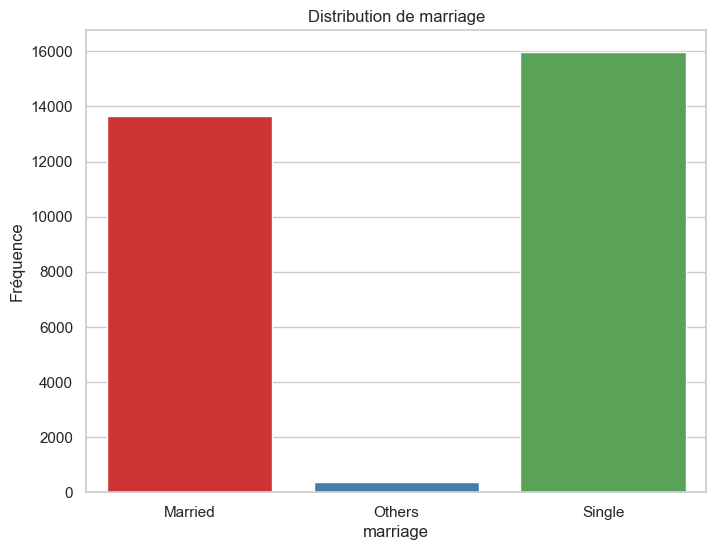

Statistiques descriptives pour marriage:

count      30000
unique         3
top       Single
freq       15964
Name: marriage, dtype: object


Analyse univariée de la colonne 'default_payment_next_month':

Fréquence des catégories :
default_payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64



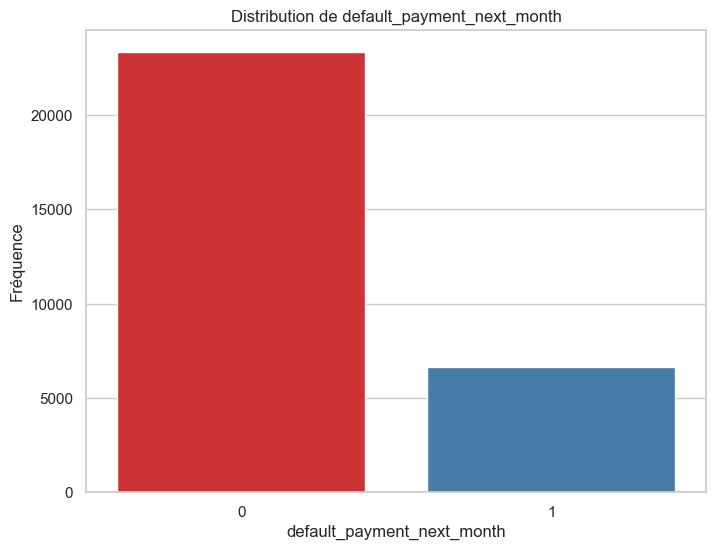

Statistiques descriptives pour default_payment_next_month:

count     30000
unique        2
top           0
freq      23364
Name: default_payment_next_month, dtype: int64


Analyse univariée de la colonne 'payment_status_sep':

Fréquence des catégories :
payment_status_sep
0     0.491233
-1    0.189533
1     0.122933
-2    0.091967
2     0.088900
3     0.010733
4     0.002533
5     0.000867
8     0.000633
6     0.000367
7     0.000300
9     0.000000
Name: proportion, dtype: float64



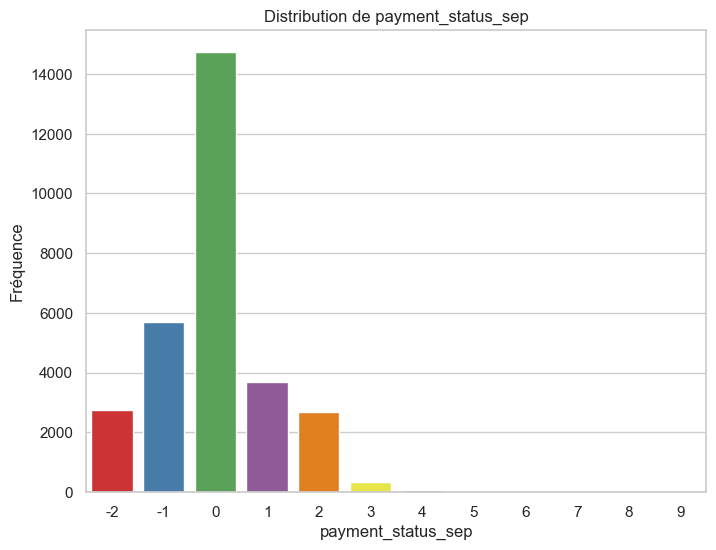

Statistiques descriptives pour payment_status_sep:

count     30000
unique       11
top           0
freq      14737
Name: payment_status_sep, dtype: int64


Analyse univariée de la colonne 'payment_status_aug':

Fréquence des catégories :
payment_status_aug
0     0.524333
-1    0.201667
2     0.130900
-2    0.126067
3     0.010867
4     0.003300
1     0.000933
5     0.000833
7     0.000667
6     0.000400
8     0.000033
9     0.000000
Name: proportion, dtype: float64



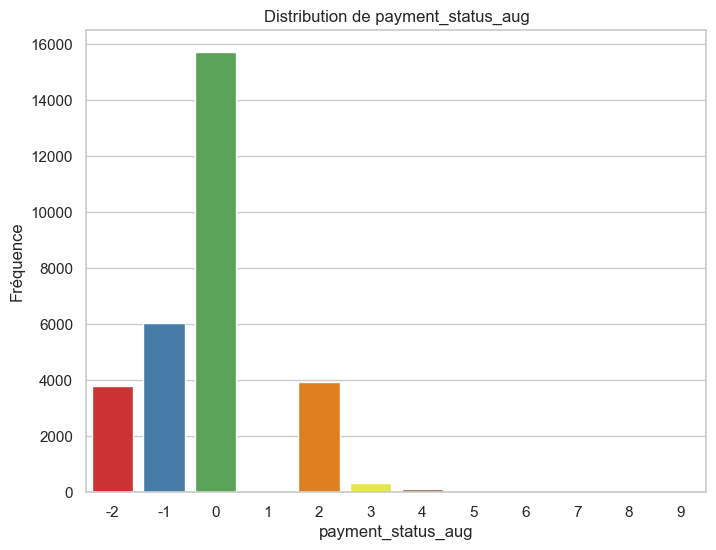

Statistiques descriptives pour payment_status_aug:

count     30000
unique       11
top           0
freq      15730
Name: payment_status_aug, dtype: int64


Analyse univariée de la colonne 'payment_status_jul':

Fréquence des catégories :
payment_status_jul
0     0.525467
-1    0.197933
-2    0.136167
2     0.127300
3     0.008000
4     0.002533
7     0.000900
6     0.000767
5     0.000700
1     0.000133
8     0.000100
9     0.000000
Name: proportion, dtype: float64



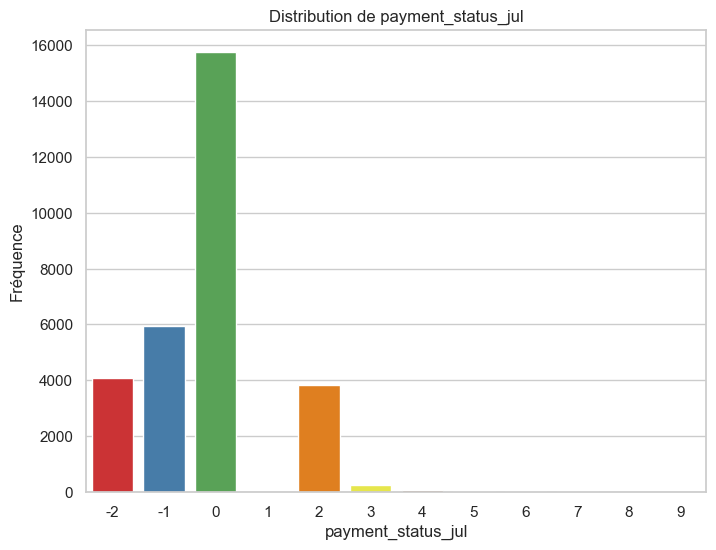

Statistiques descriptives pour payment_status_jul:

count     30000
unique       11
top           0
freq      15764
Name: payment_status_jul, dtype: int64


Analyse univariée de la colonne 'payment_status_jun':

Fréquence des catégories :
payment_status_jun
0     0.548500
-1    0.189567
-2    0.144933
2     0.105300
3     0.006000
4     0.002300
7     0.001933
5     0.001167
6     0.000167
1     0.000067
8     0.000067
9     0.000000
Name: proportion, dtype: float64



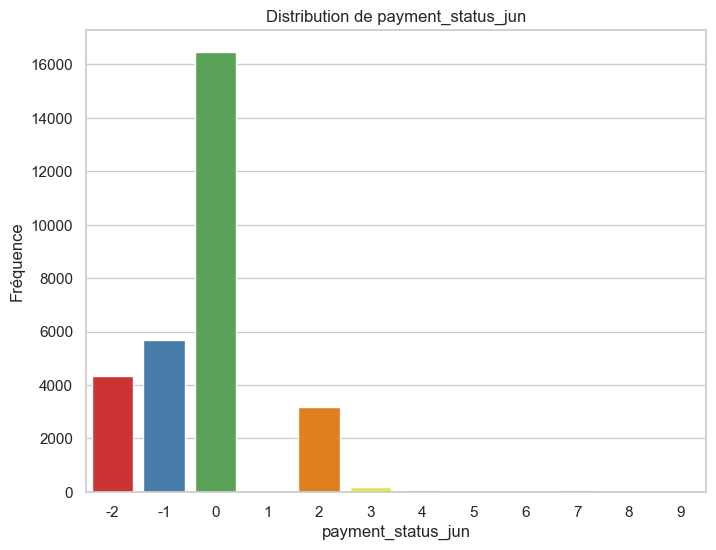

Statistiques descriptives pour payment_status_jun:

count     30000
unique       11
top           0
freq      16455
Name: payment_status_jun, dtype: int64


Analyse univariée de la colonne 'payment_status_may':

Fréquence des catégories :
payment_status_may
0     0.564900
-1    0.184633
-2    0.151533
2     0.087533
3     0.005933
4     0.002800
7     0.001933
5     0.000567
6     0.000133
8     0.000033
1     0.000000
9     0.000000
Name: proportion, dtype: float64



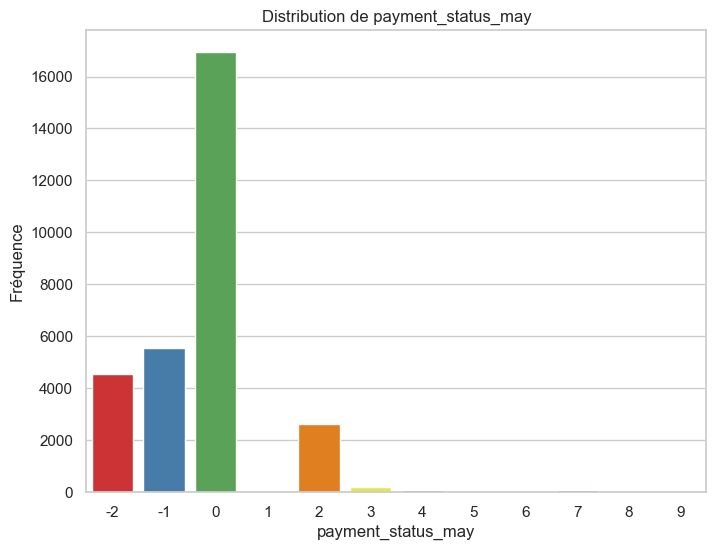

Statistiques descriptives pour payment_status_may:

count     30000
unique       10
top           0
freq      16947
Name: payment_status_may, dtype: int64


Analyse univariée de la colonne 'payment_status_apr':

Fréquence des catégories :
payment_status_apr
0     0.542867
-1    0.191333
-2    0.163167
2     0.092200
3     0.006133
4     0.001633
7     0.001533
6     0.000633
5     0.000433
8     0.000067
1     0.000000
9     0.000000
Name: proportion, dtype: float64



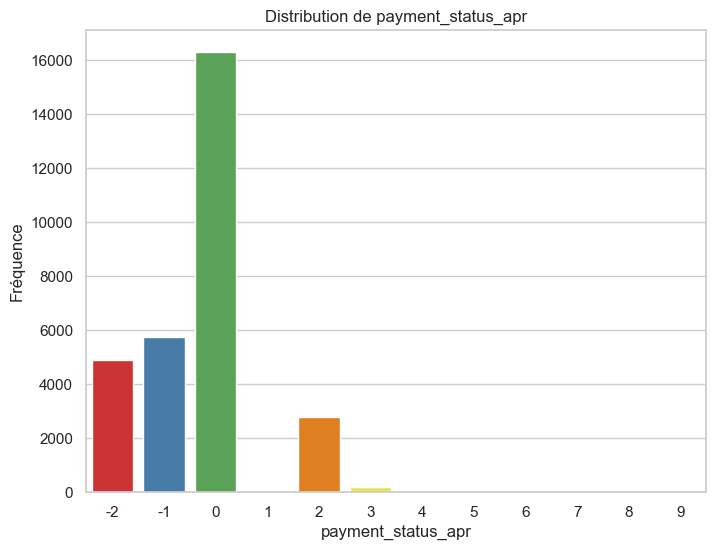

Statistiques descriptives pour payment_status_apr:

count     30000
unique       10
top           0
freq      16286
Name: payment_status_apr, dtype: int64




In [11]:
plot_distributions(df)

***Explication de la fonction plot_distributions()*** :

La fonction `plot_distributions` prend un DataFrame df en entrée et génère des visualisations pour analyser les distributions des données. Elle effectue plusieurs tâches pour les données numériques et catégorielles :

1. Histogrammes pour les données numériques :

    - Elle commence par sélectionner uniquement les colonnes numériques du DataFrame (en excluant une colonne appelée 'id' si elle existe).

    - Ensuite, elle génère un ensemble d'histogrammes pour chaque colonne numérique, en utilisant la bibliothèque matplotlib.pyplot. Chaque histogramme représente la distribution des valeurs d'une colonne numérique. Les paramètres tels que le nombre de bacs (bins), la couleur et l'alpha sont personnalisables.

2. Boîtes à moustaches (box plots) pour les données numériques :

    - Après les histogrammes, la fonction génère des boîtes à moustaches pour chaque colonne numérique. Les boîtes à moustaches montrent des mesures de tendance centrale et de dispersion pour chaque colonne, ce qui permet de détecter les valeurs aberrantes et d'analyser la répartition des données.

3. Diagrammes à barres pour les données catégorielles :

    - Ensuite, la fonction sélectionne un ensemble de colonnes catégorielles à analyser, telles que le "sexe," "éducation," "mariage," et les "statuts de paiement" pour différents mois.

    - Pour chaque colonne catégorielle, elle génère un diagramme à barres pour visualiser la distribution des catégories et leurs fréquences relatives. Elle utilise la bibliothèque seaborn pour créer ces graphiques à barres.

4. Statistiques descriptives :

    - Enfin, la fonction affiche des statistiques descriptives pour chaque colonne catégorielle. Ces statistiques comprennent le nombre total d'observations, le nombre de catégories uniques, la catégorie la plus fréquente, et d'autres informations statistiques de base.

La fonction est utile pour explorer et comprendre la distribution des données dans un DataFrame. Elle fournit des informations visuelles et statistiques pour les données numériques et catégorielles, ce qui peut être essentiel dans le processus de prétraitement et d'analyse des données.

Construisons les distributions des variables selon le sexe :

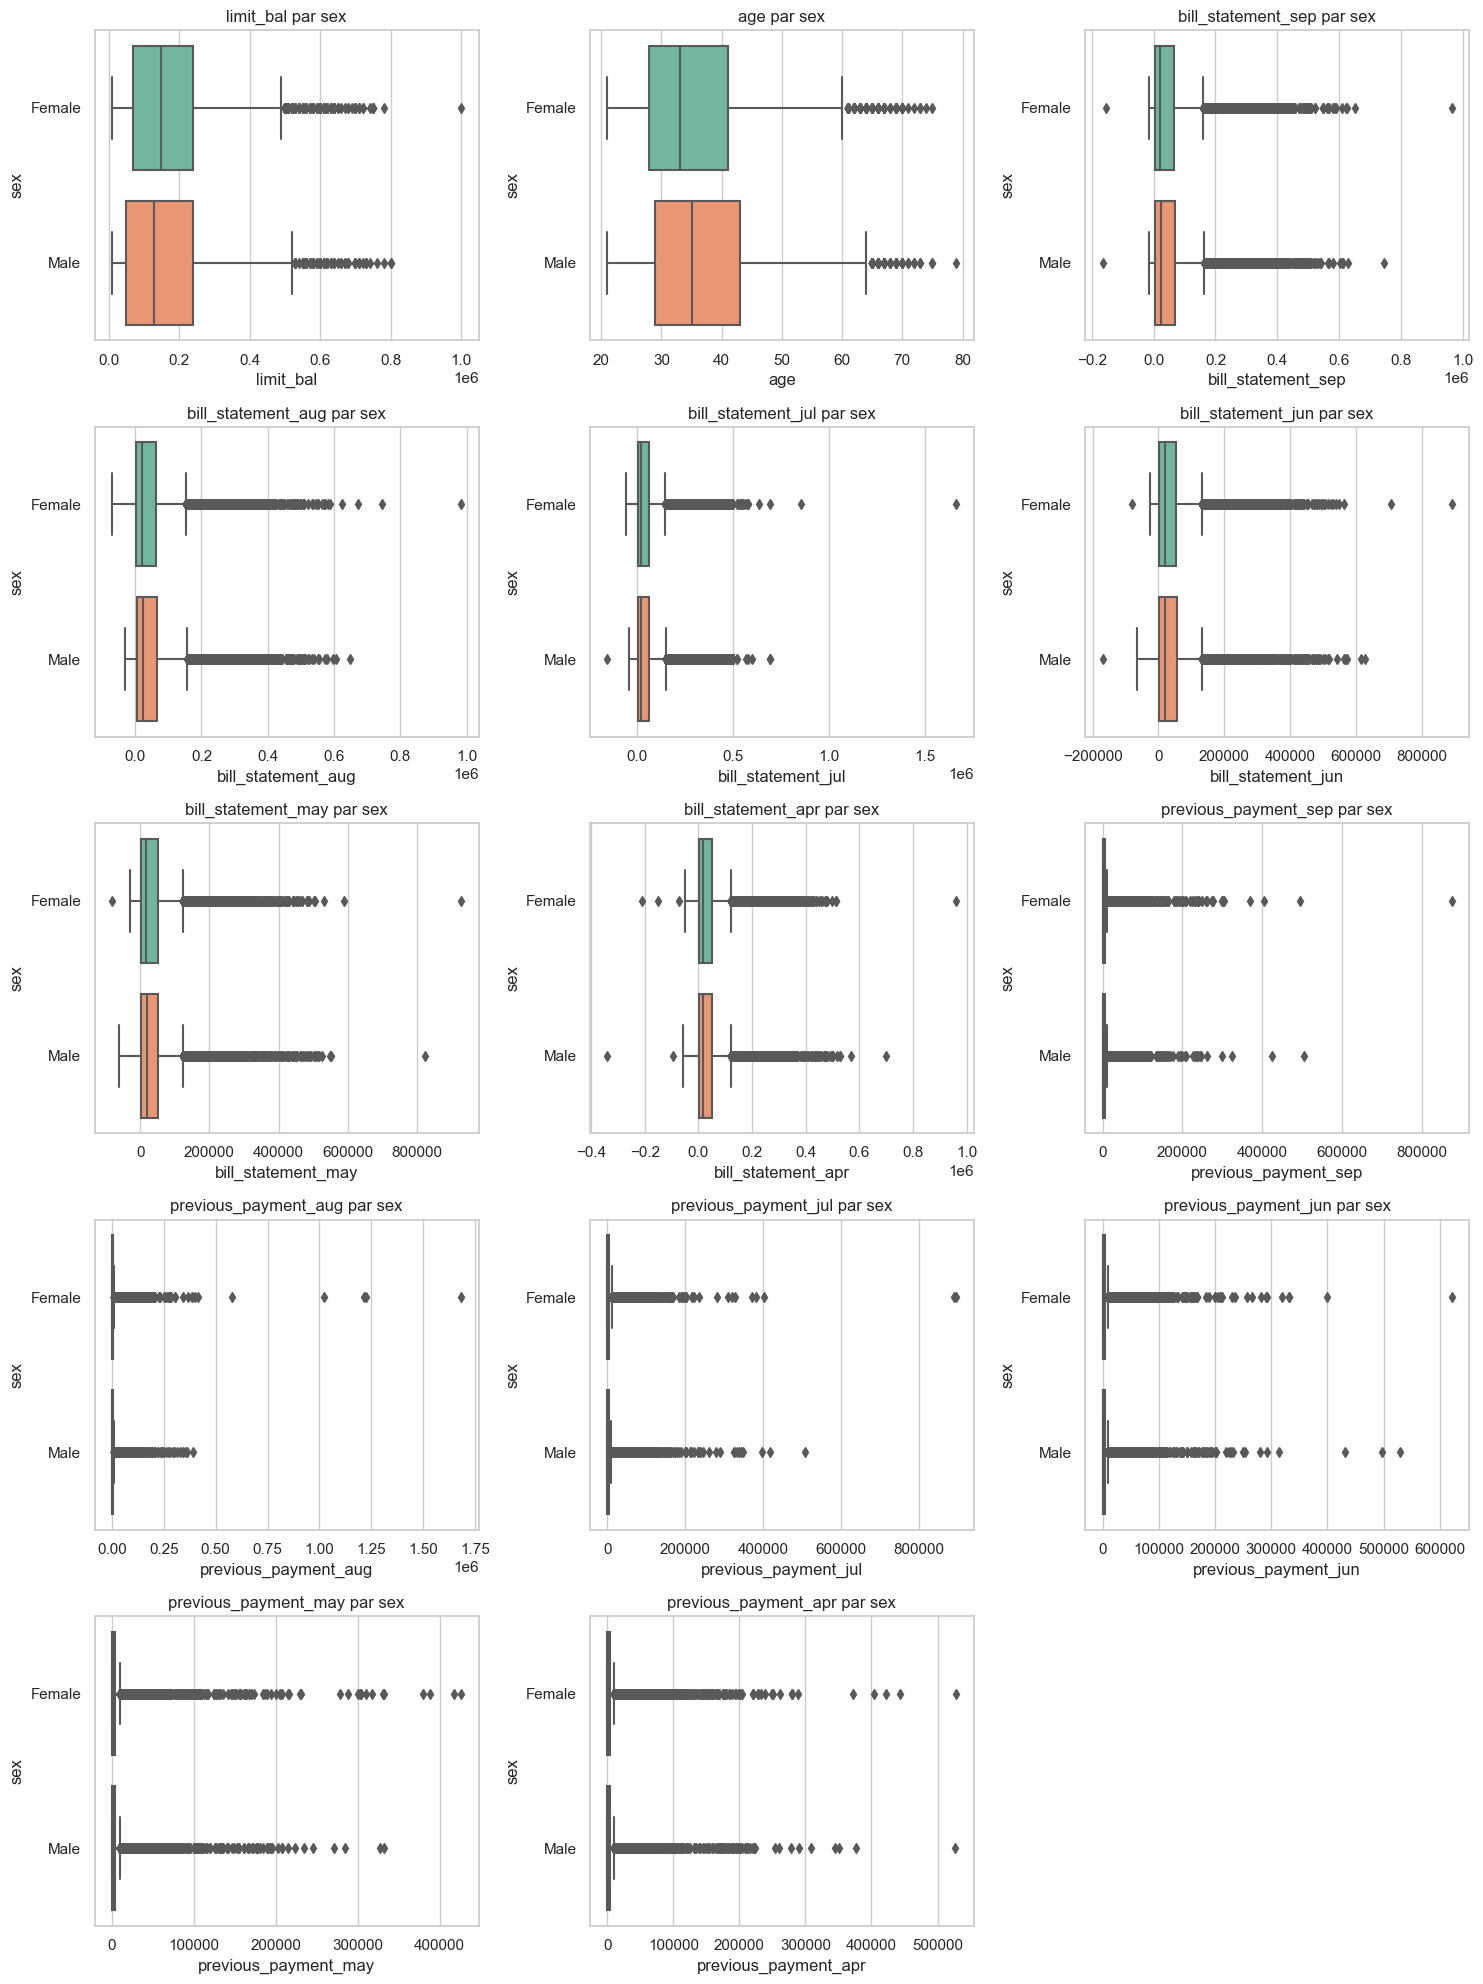

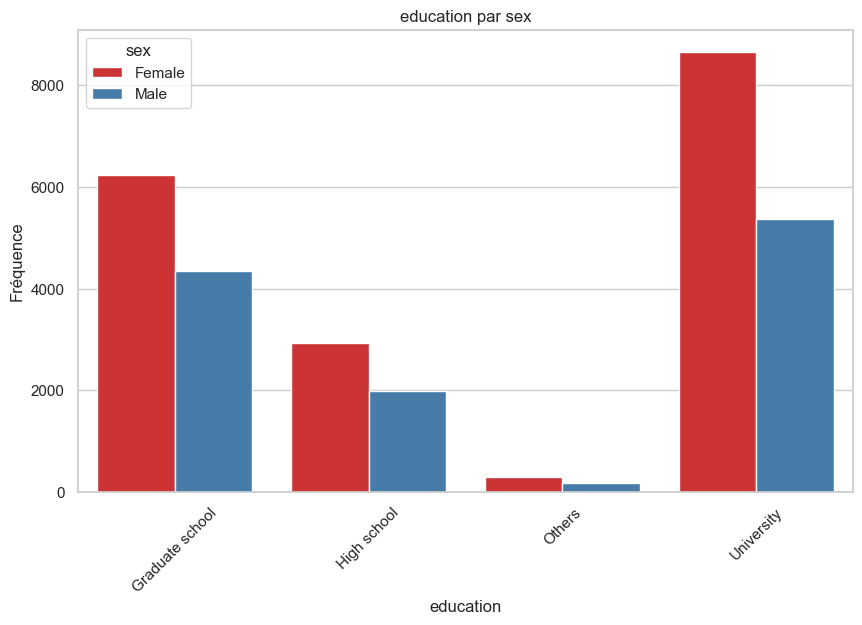

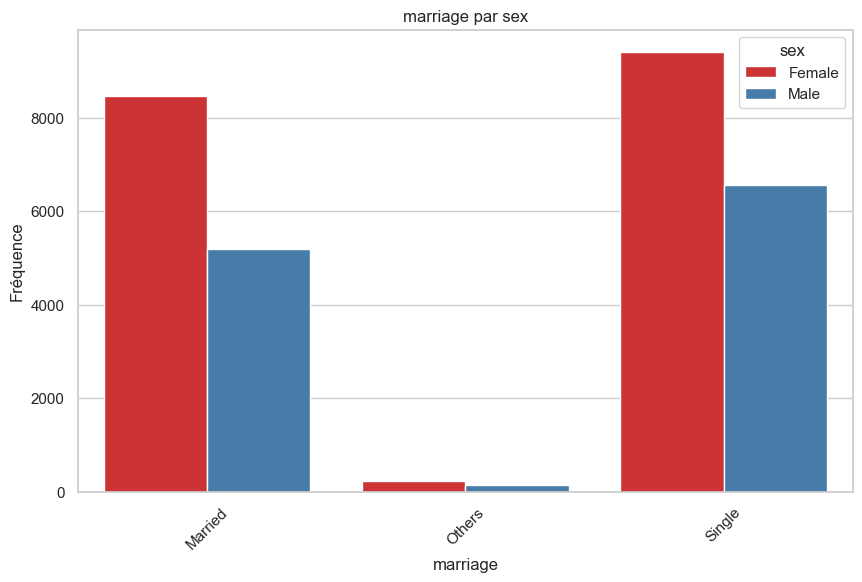

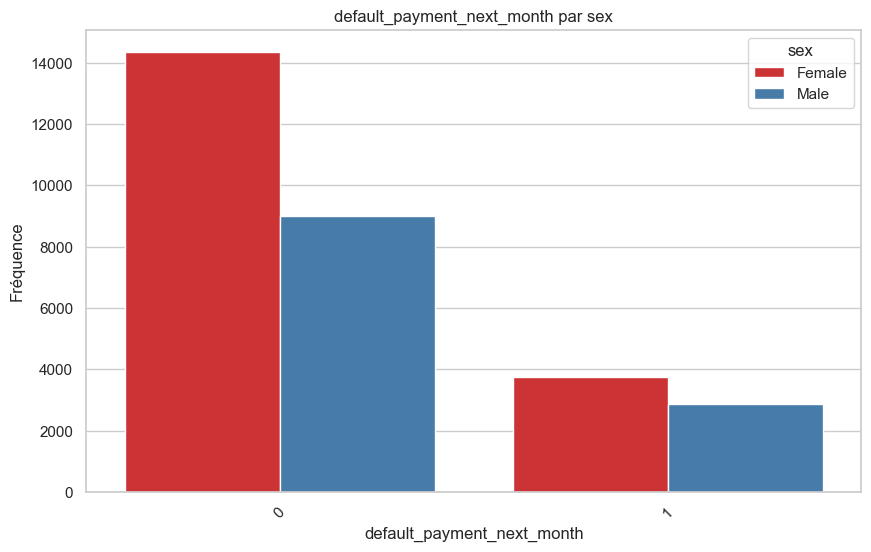

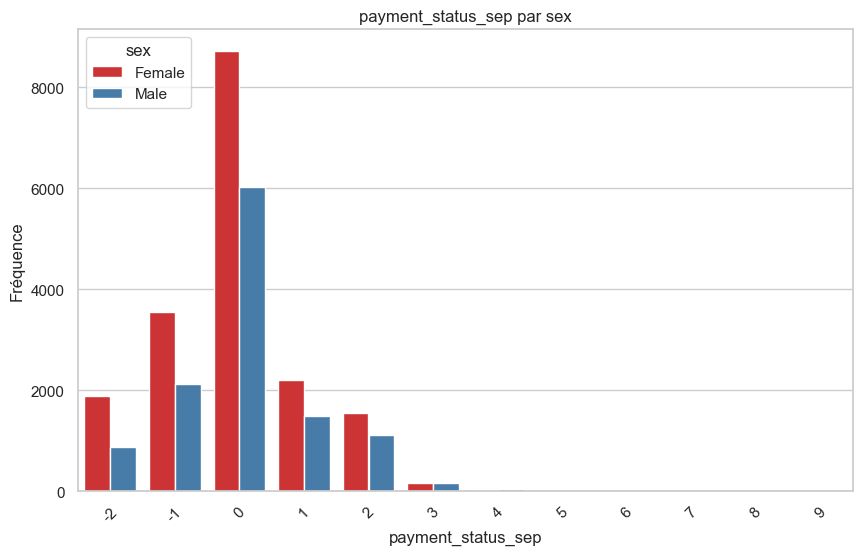

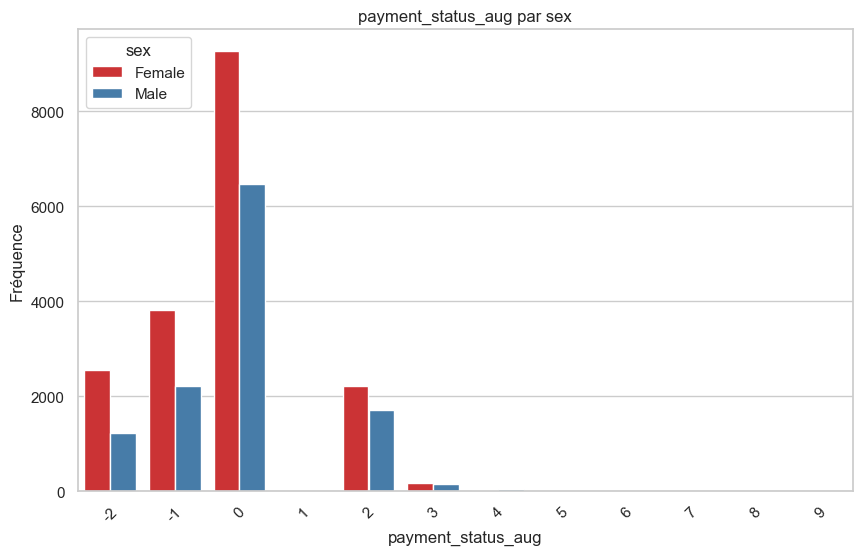

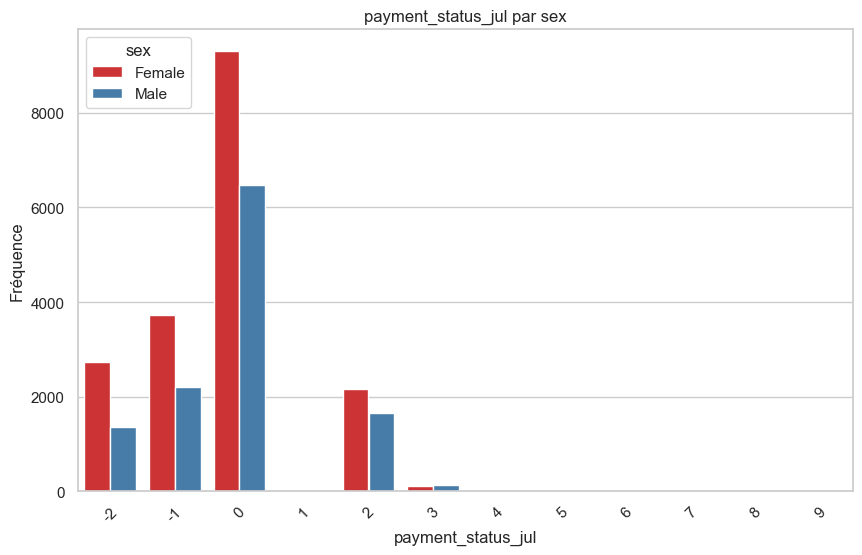

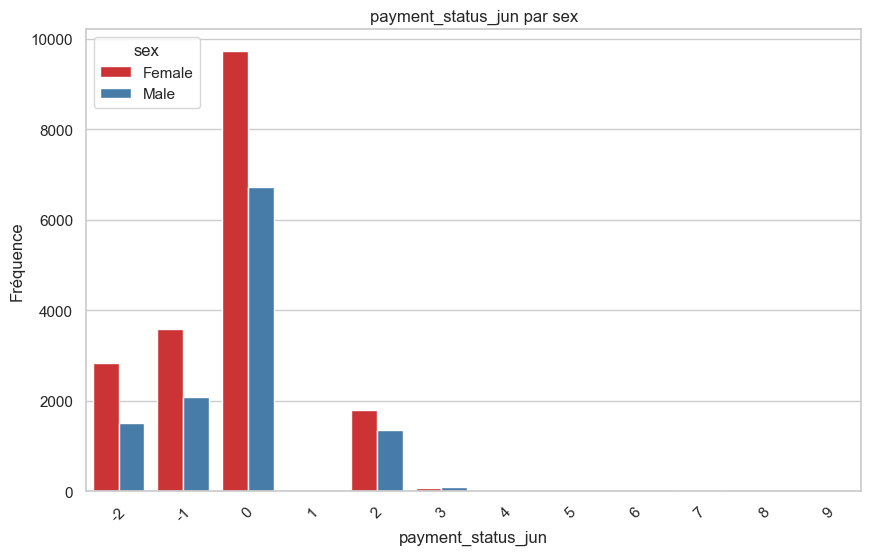

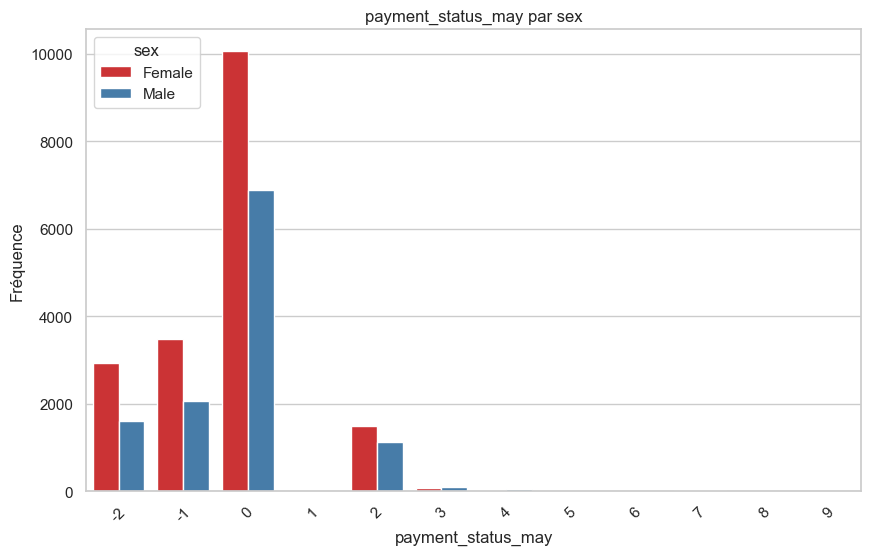

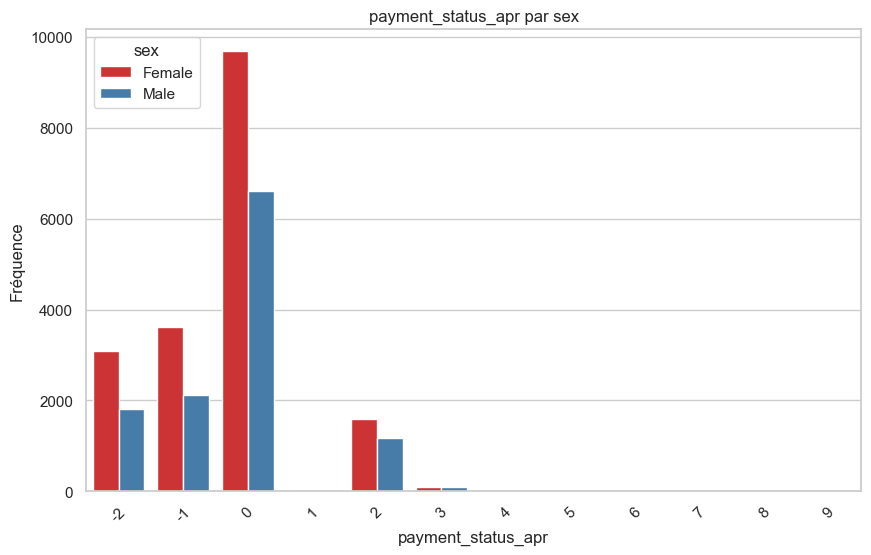

In [12]:
plot_discretize_distributions(df, 'sex')

L'analyse du sexe dans un contexte de Machine Learning appliqué à la prédiction des défauts de paiement peut être importante pour plusieurs raisons :

- **Compréhension des différences de comportement de remboursement** : Les hommes et les femmes peuvent avoir des comportements de remboursement différents envers les prêts ou les cartes de crédit. En examinant ces différences, vous pourriez identifier des tendances qui pourraient être utiles dans la prédiction des défauts de paiement.

- **Caractéristiques explicatives** : Le sexe peut être une caractéristique explicative qui influence le risque de défaut de paiement. Par exemple, il est possible que les hommes aient tendance à présenter un risque de défaut de paiement plus élevé que les femmes en fonction de certaines variables, telles que le niveau d'éducation, l'âge ou le statut matrimonial.

- **Segmentation de la clientèle** : Dans le cadre de la gestion du risque de crédit, la segmentation de la clientèle par sexe peut être utile. Par exemple, vous pourriez développer des modèles de prédiction de défaut de paiement spécifiques pour les hommes et les femmes, en tenant compte des caractéristiques qui sont importantes pour chaque groupe.

- **Équité et éthique** : L'analyse du sexe dans le Machine Learning peut également être importante du point de vue de l'équité et de l'éthique. Elle peut aider à identifier et à corriger d'éventuels biais de genre dans les modèles de prédiction, garantissant ainsi un traitement équitable des individus.

- **Adaptation de stratégies de prêt** : En comprenant comment le sexe peut influencer le risque de défaut de paiement, les institutions financières peuvent adapter leurs stratégies de prêt, de fixation des taux d'intérêt et de limites de crédit pour mieux répondre aux besoins de chaque groupe.

Cependant, il est essentiel de traiter les données liées au sexe avec sensibilité, de respecter les réglementations sur la protection de la vie privée et de veiller à ce que toute utilisation des données soit conforme aux normes éthiques et légales en vigueur. Il est également important de reconnaître que le sexe n'est qu'une variable parmi d'autres qui peuvent influencer la prédiction des défauts de paiement, et il doit être pris en compte en conjonction avec d'autres caractéristiques pertinentes pour développer des modèles de prédiction précis et équitables.

Analysons les distributions selon la variable cible (défaut de le mois prochain) :

***Explication de la fonction plot_discretize_distributions()*** :

La fonction `plot_discretize_distributions` est conçue pour explorer et analyser la distribution des données numériques en les segmentant par rapport à une variable catégorielle spécifique cat_var. Elle fournit une vue comparative des distributions des données numériques en fonction des catégories de la variable cat_var. Voici comment la fonction fonctionne :

1. Boîtes à moustaches segmentées par catégorie :

    - La fonction commence par créer un ensemble de boîtes à moustaches pour chaque colonne numérique du DataFrame df, en les segmentant par la variable catégorielle cat_var. Cela signifie qu'elle génère un graphique à boîtes pour chaque colonne numérique, mais elle divise les données en fonction des différentes catégories de cat_var. Par exemple, si cat_var est la variable "sexe," la fonction générera des boîtes à moustaches pour chaque colonne numérique (comme "montant du crédit" ou "âge"), mais les affichera séparément pour les catégories "Homme" et "Femme."

    - Chaque boîte à moustaches montre la distribution des données numériques pour une catégorie spécifique de cat_var. Elle peut révéler des différences dans la distribution des données entre les catégories.

2. Diagrammes à barres segmentés par catégorie :

    - Ensuite, la fonction crée des diagrammes à barres pour un ensemble de colonnes catégorielles (définies dans columns_to_analyze) en les segmentant également par cat_var. Cela signifie que pour chaque colonne catégorielle, elle génère des diagrammes à barres qui montrent la distribution des catégories de cette colonne, mais en les divisant par les catégories de cat_var. Par exemple, si cat_var est "sexe," la fonction générera des diagrammes à barres pour "éducation" ou "mariage," montrant comment la distribution de ces catégories varie en fonction du sexe ("Homme" et "Femme").

    - Les diagrammes à barres permettent de visualiser la répartition des catégories de chaque colonne catégorielle en fonction des différentes catégories de cat_var.

3. Personnalisation et affichage :

    - Pour chaque graphique, la fonction personnalise le titre, les étiquettes des axes, et effectue d'autres ajustements pour une meilleure lisibilité.

    - Enfin, elle affiche les graphiques à boîtes à moustaches et les diagrammes à barres.

L'objectif de cette fonction est d'aider à identifier des tendances ou des différences dans les données numériques en fonction des catégories de la variable cat_var. Cela peut être particulièrement utile pour l'analyse exploratoire des données et pour comprendre comment les caractéristiques numériques varient en fonction de différentes catégories.

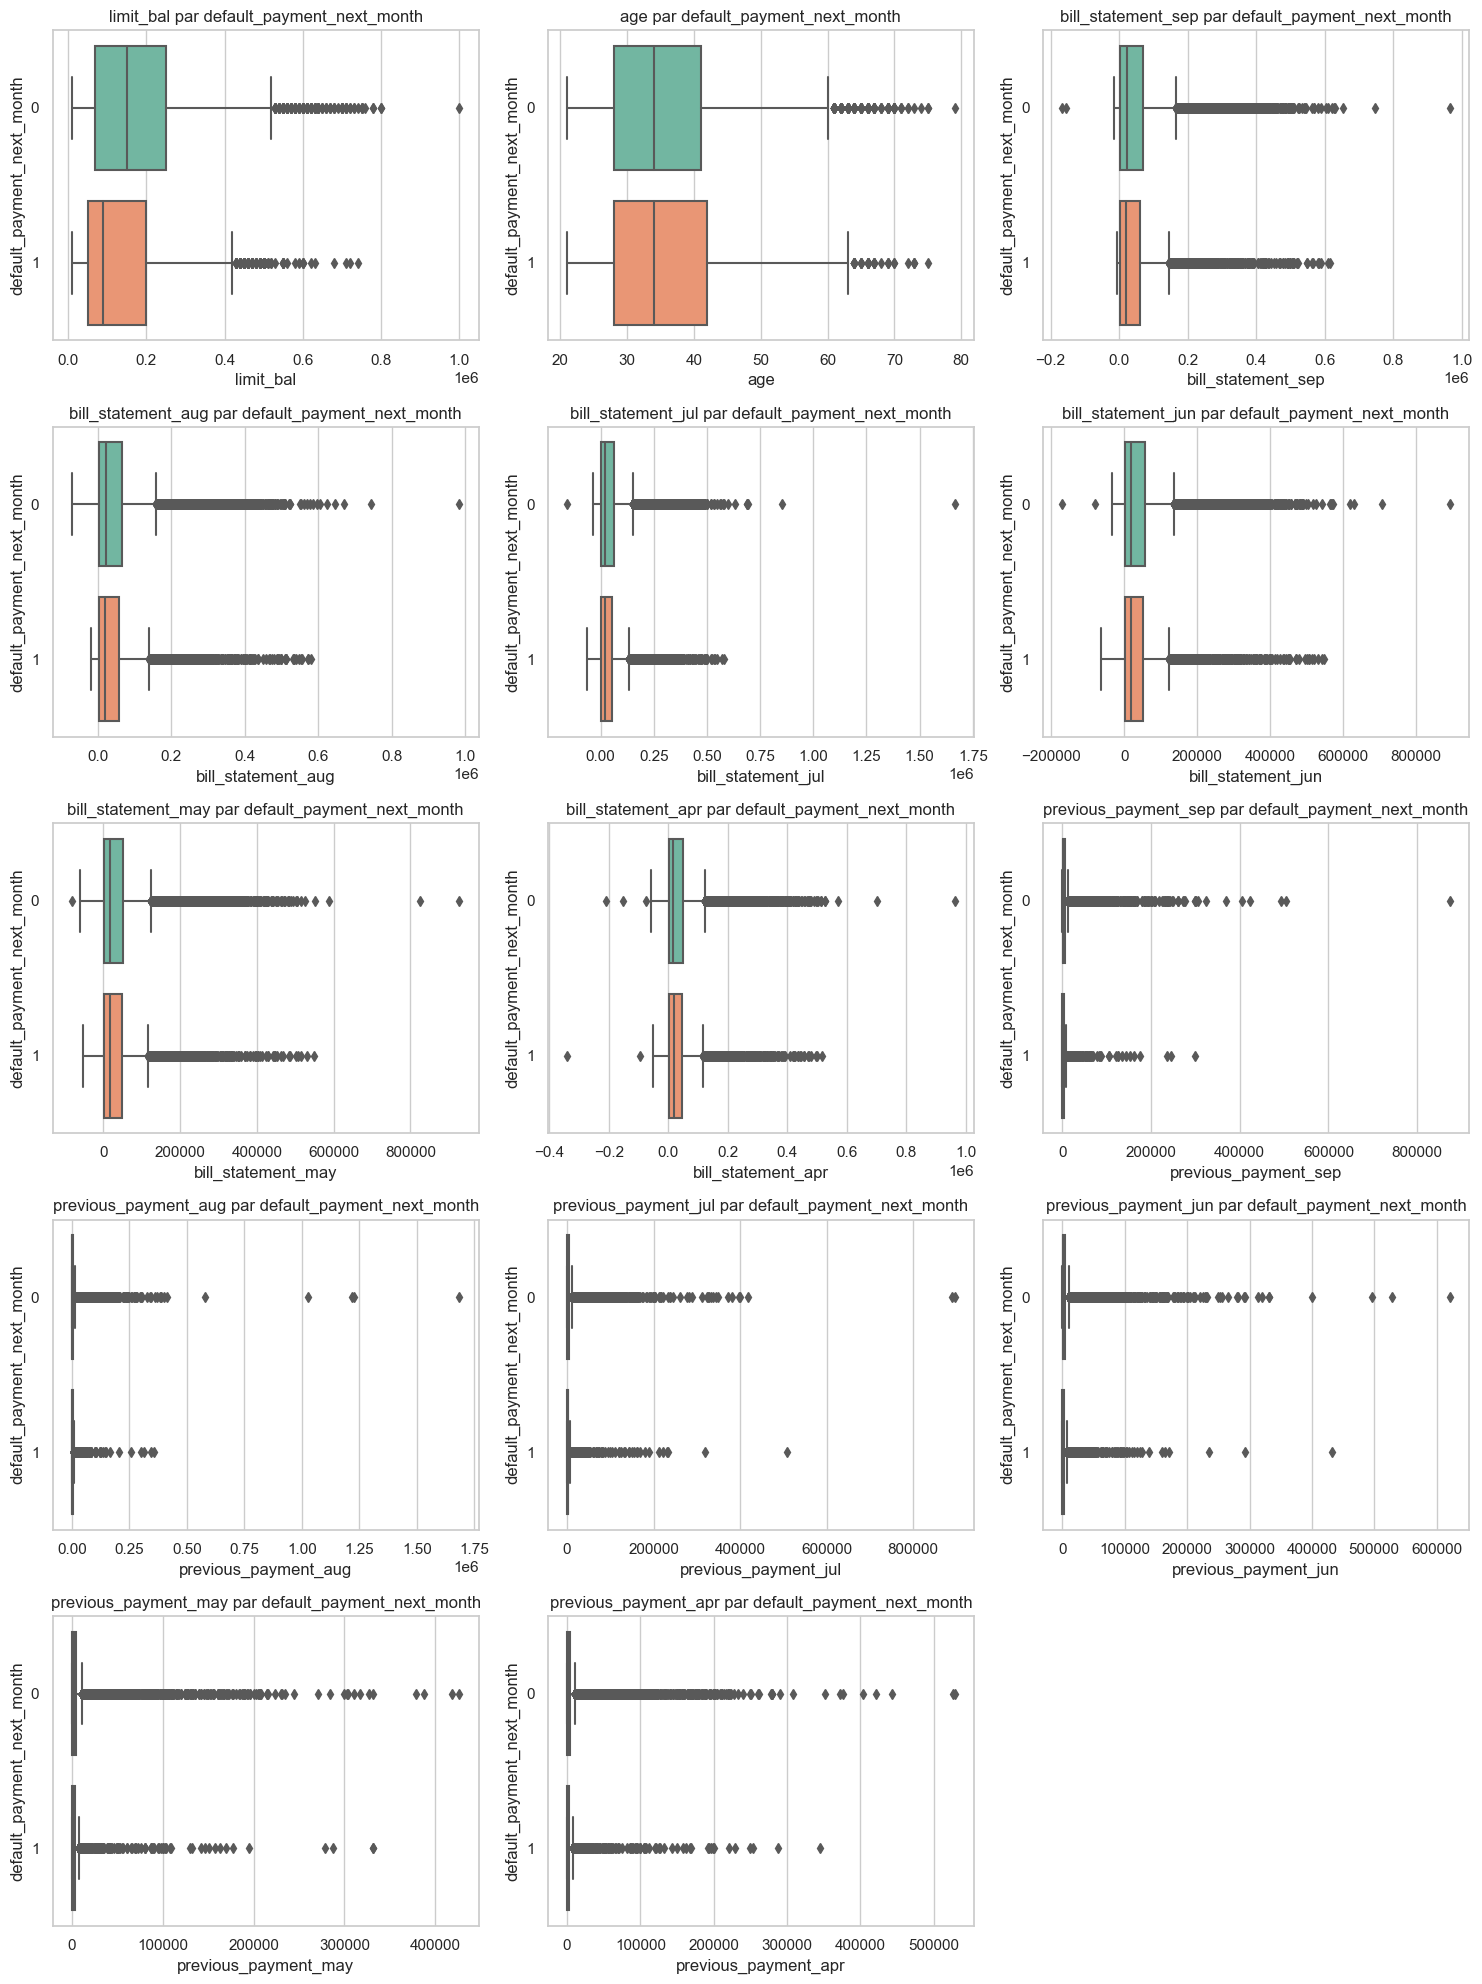

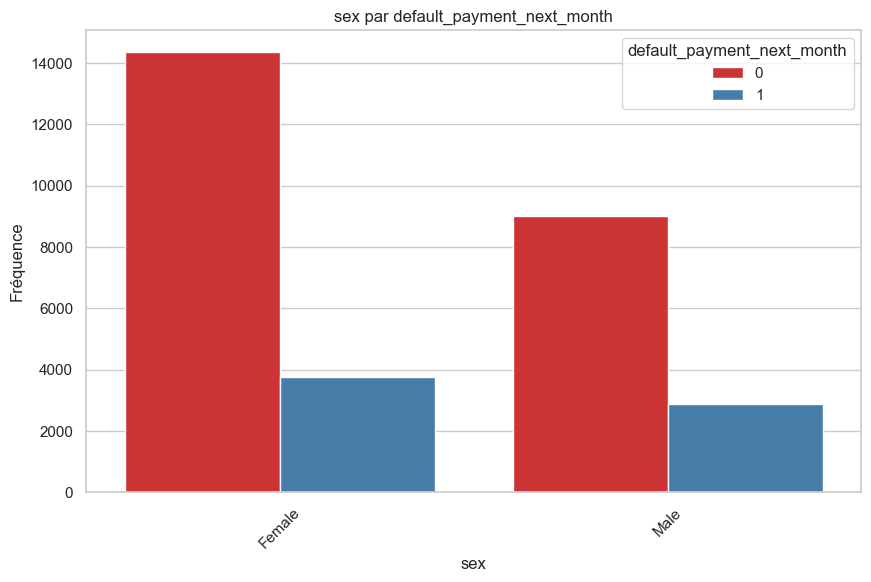

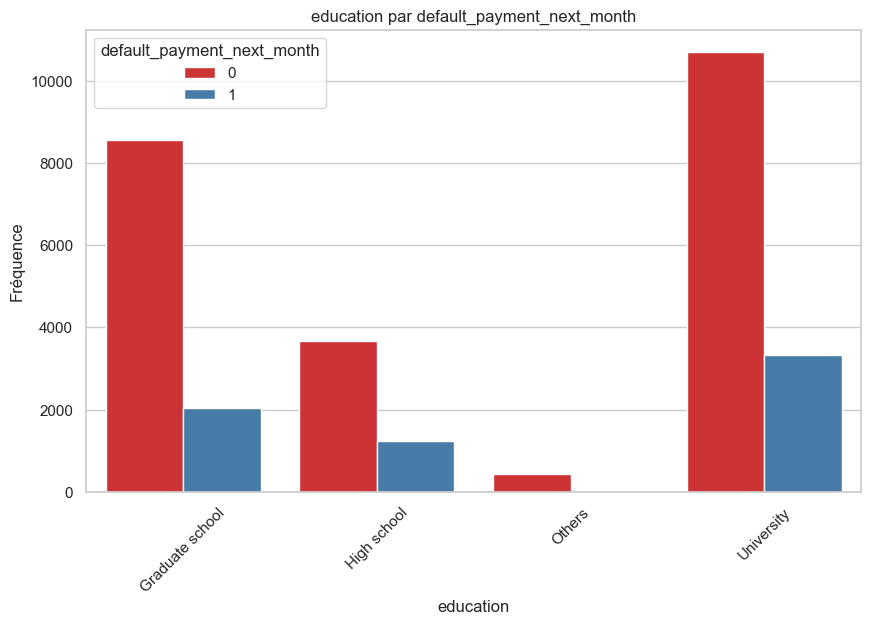

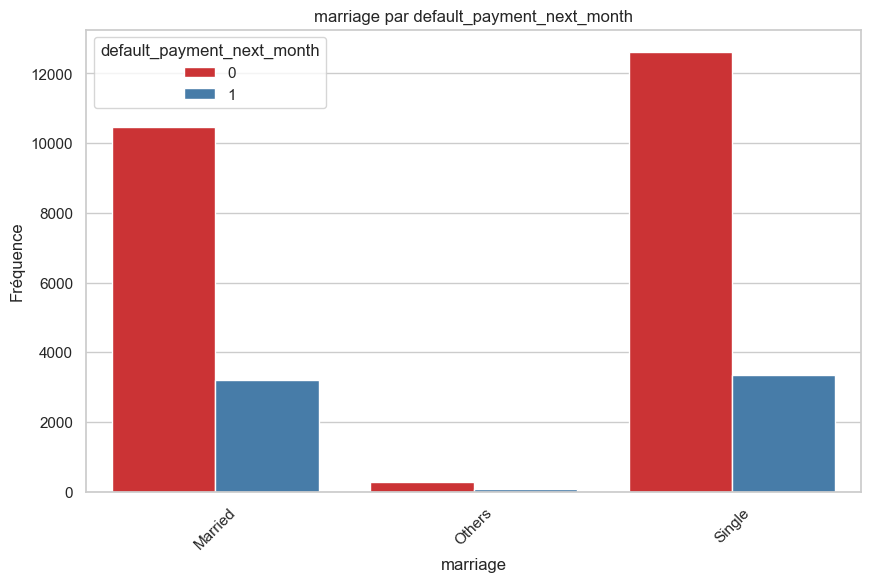

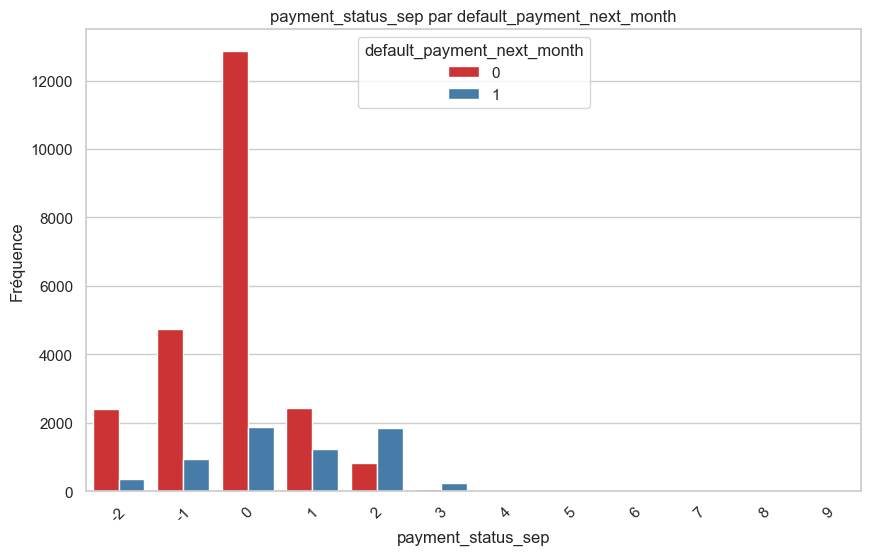

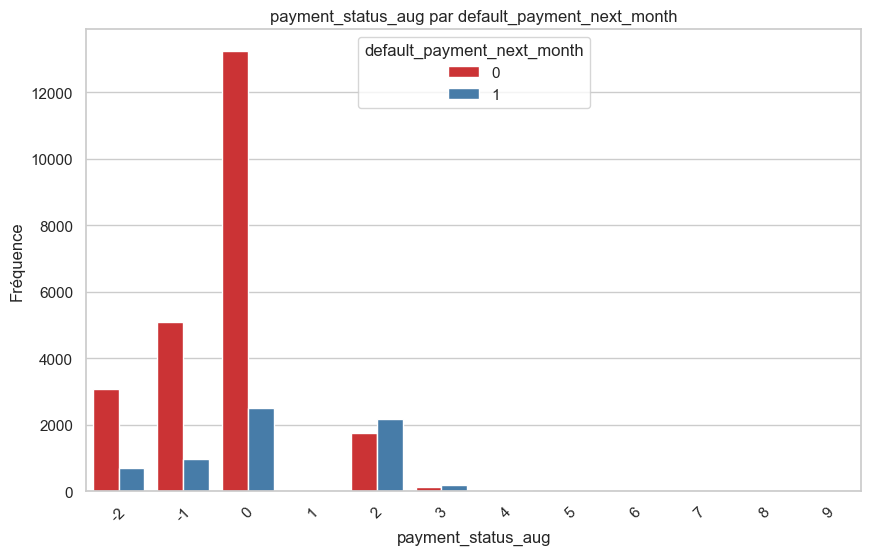

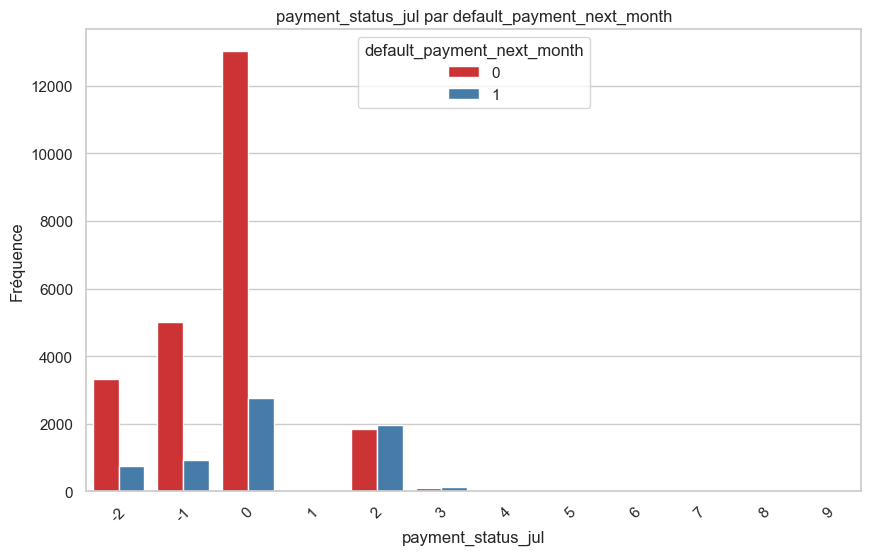

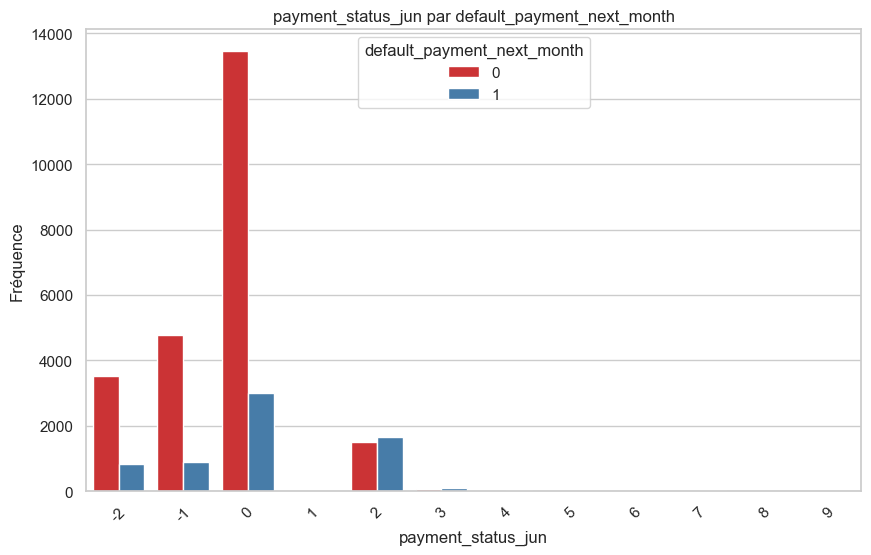

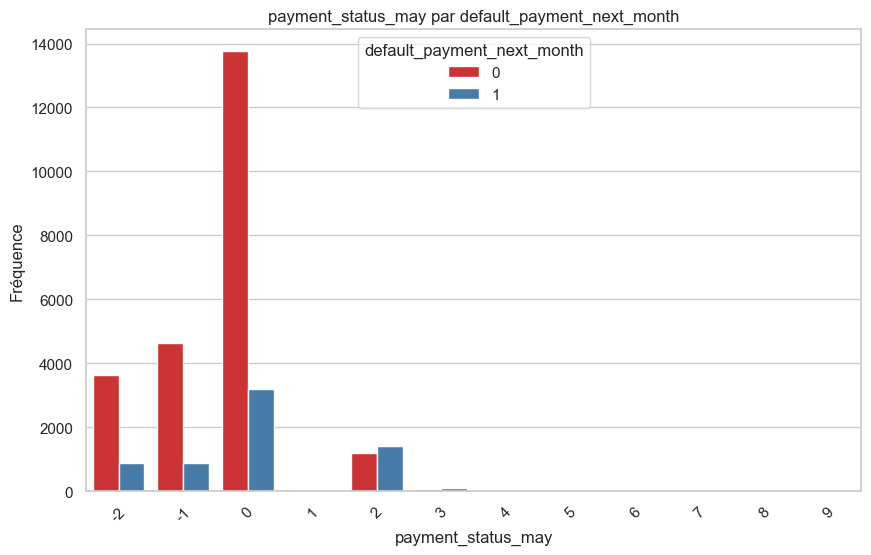

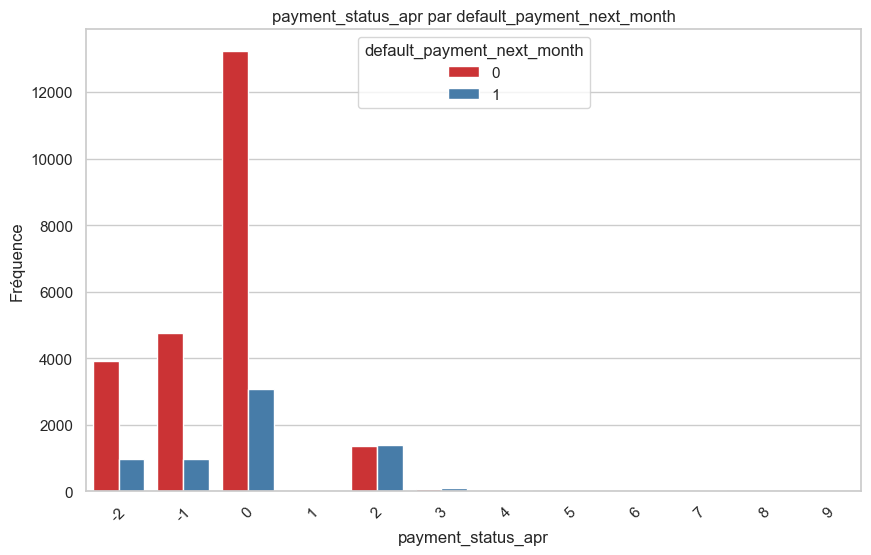

In [13]:
plot_discretize_distributions(df, 'default_payment_next_month')

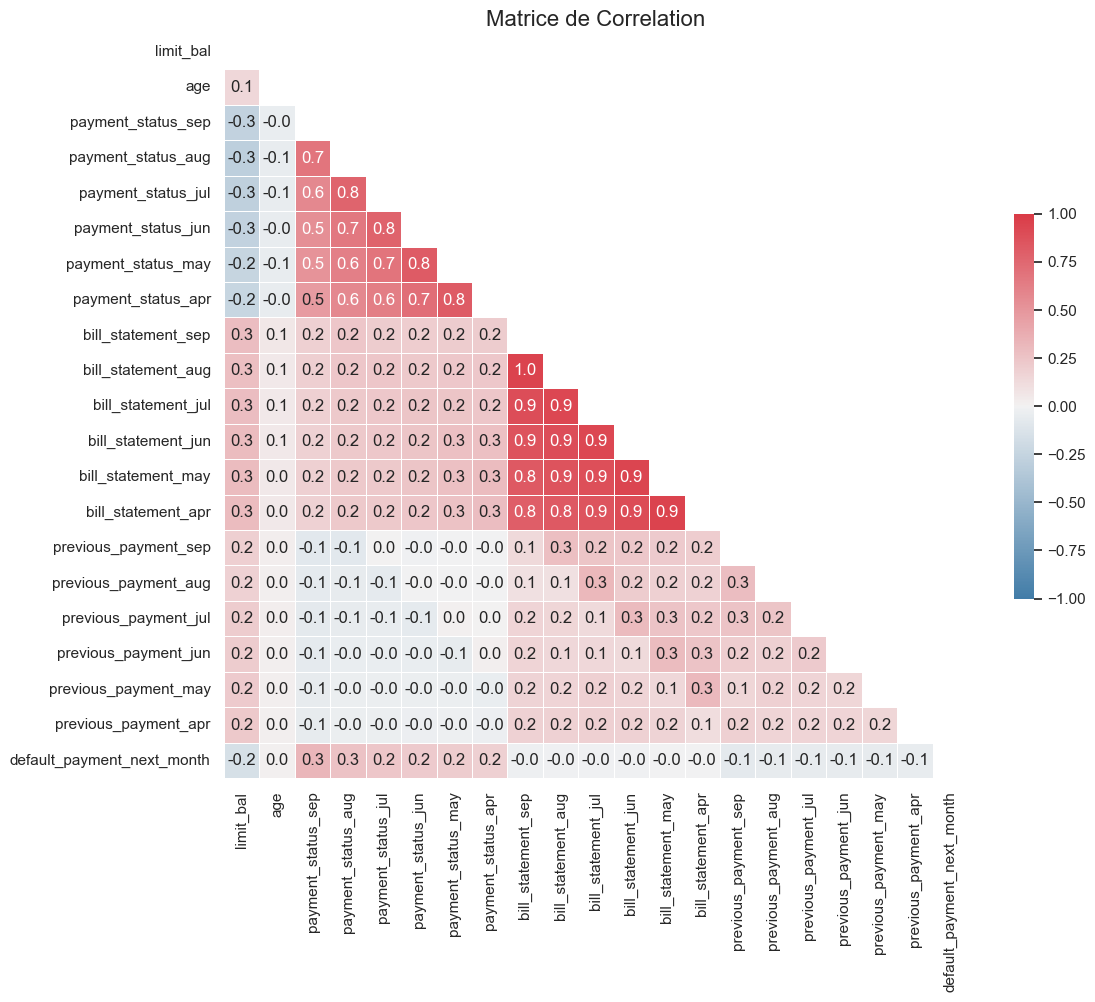

In [14]:
# Matrice de corrélation
corr_mat = df[[c for c in df.columns if c not in ['id', 'sex', 'education', 'marriage']]].corr()
plot_correlation_matrix(corr_mat)

***Explique la fonction plot_correlation_matrix *** :

La fonction `plot_correlation_matrix` est utilisée pour générer une carte thermique (heatmap) de la matrice de corrélation entre les différentes variables numériques. Cette carte thermique est un moyen de visualiser la force et la direction des relations linéaires entre les variables numériques d'un ensemble de données. Voici comment cette fonction fonctionne :

1. Préparation de la carte thermique :

    - La fonction commence par préparer la figure et les axes pour la carte thermique. Elle crée une figure de taille (12, 10), ce qui permet d'obtenir un graphique de grande taille pour une meilleure lisibilité.

    - Elle initialise un masque booléen `mask` de la même forme que la matrice de corrélation `corr_mat`. Le masque est utilisé pour masquer la partie supérieure de la carte thermique (pour éviter les duplications) en définissant `True` pour les positions qui doivent être masquées.

2. Choix de la palette de couleurs :

    - La palette de couleurs est définie avec `sns.diverging_palette`. Cela permet de choisir une palette de couleurs qui va du bleu (valeurs négatives) au rouge (valeurs positives) avec un centre neutre. Cela signifie que les valeurs négatives apparaîtront en bleu, les valeurs positives en rouge, et les valeurs proches de zéro en blanc. Cette palette de couleurs permet de visualiser les corrélations positives et négatives.

3. Création de la carte thermique :

La fonction `sns.heatmap` est utilisée pour créer la carte thermique. Elle prend en compte les éléments suivants :

    - `corr_mat`: La matrice de corrélation à afficher.

    - `mask`: Le masque booléen pour masquer la moitié supérieure de la carte.

    - `cmap`: La palette de couleurs à utiliser.

    - `annot`: Si True, les valeurs de corrélation sont annotées dans chaque cellule de la carte.

    - `fmt`: Le format des valeurs annotées (1 décimale dans cet exemple).

    - `vmin` et `vmax`: Les valeurs minimales et maximales de la plage de couleur (dans cet exemple, de -1 à 1 pour les corrélations).

    - `center`: La valeur au centre de la palette de couleurs (0 dans cet exemple).

    - `square`: Si True, assure que les cellules de la carte sont carrées.

    - `linewidths`: Épaisseur des lignes de séparation entre les cellules.

    - `cbar_kws`: Les paramètres de la barre de couleur (taille).

    - `ax`: L'axe sur lequel la carte thermique est dessinée.

4. Personnalisation et titrage :

    - La fonction ajoute un titre à la carte thermique en utilisant ax.set_title. Le titre indique qu'il s'agit de la "Matrice de Corrélation".

5. Réglage du style :

    - Enfin, la fonction utilise sns.set pour ajuster le style du graphique. Elle utilise "darkgrid," un style de grille sombre.

L'objectif de cette fonction est de visualiser rapidement la corrélation entre les variables numériques d'un ensemble de données. Cela permet d'identifier les relations linéaires entre les variables et d'explorer comment elles sont liées les unes aux autres.

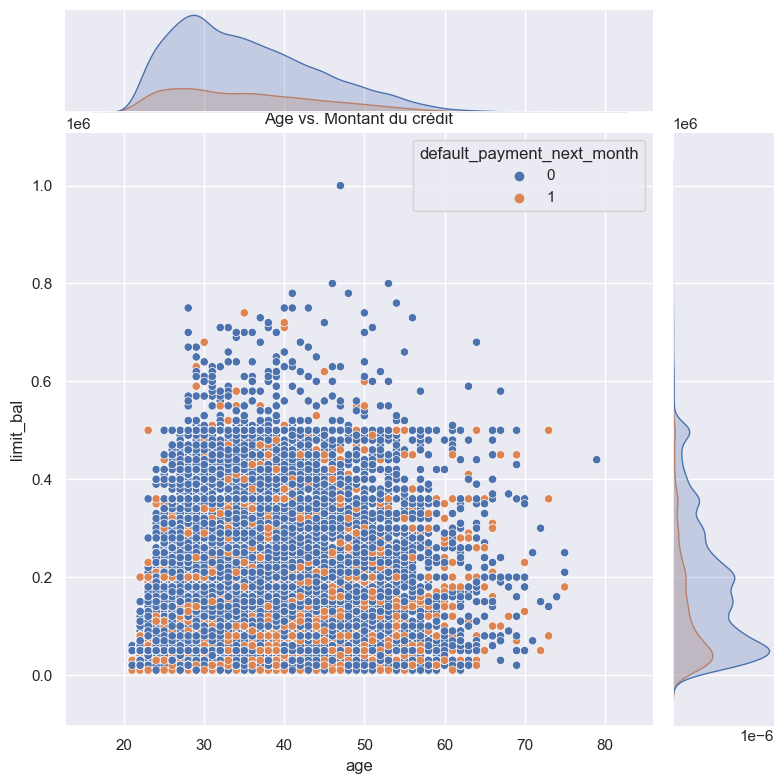

In [15]:
# Analyse de la relation entre l'âge et le montant du crédit accordé
sns.jointplot(
    data=df, x="age", y="limit_bal",
    hue="default_payment_next_month",
    height=8
)
plt.title("Age vs. Montant du crédit")
plt.show()

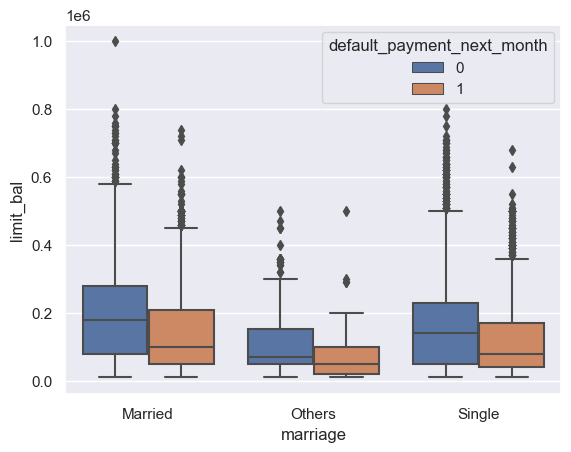

In [16]:
sns.boxplot(data=df, y="limit_bal", x="marriage", hue="default_payment_next_month");

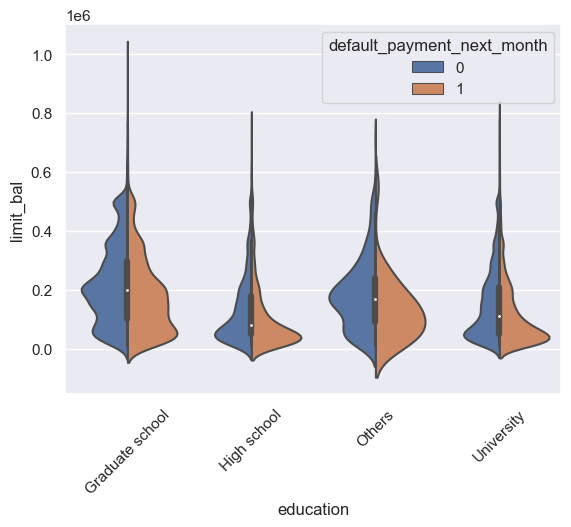

In [17]:
# Distribution du montant du crédit accordé par niveau d'éducation
sns.violinplot(data=df, y="limit_bal", x="education", hue="default_payment_next_month", split=True)
plt.xticks(rotation=45)
plt.show()

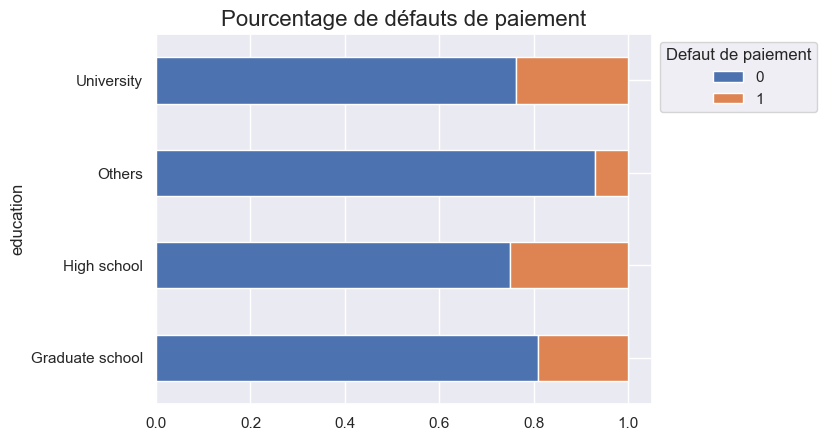

In [18]:
pct_default_by_category(df, "education")

la plupart des défauts surviennent parmi les clients ayant fait des études secondaires, tandis que le moins de défauts se produit dans la catégorie Autres.

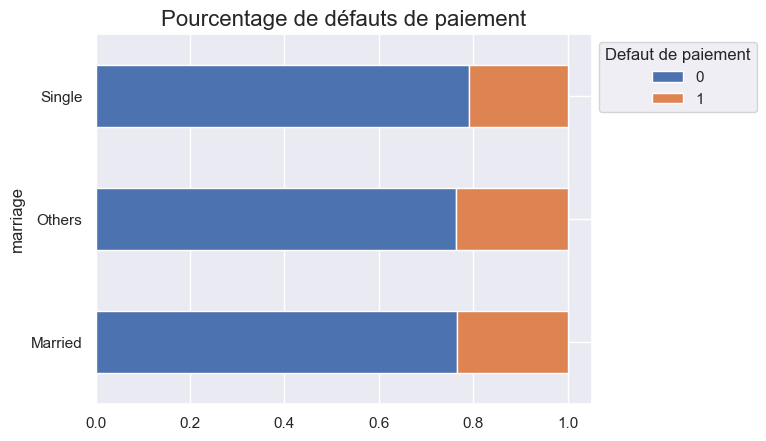

In [19]:
pct_default_by_category(df, "marriage")

***Explication de la fonction pct_default_by_category*** :

La fonction `pct_default_by_category` est conçue pour générer un graphique à barres empilées qui affiche le pourcentage de défauts de paiement pour différentes catégories d'une variable catégorielle (c'est-à-dire, une variable qui prend des valeurs discrètes ou des catégories). Voici comment cette fonction fonctionne :

1. Agrégation des données :

    - La fonction commence par regrouper les données du DataFrame df en fonction de la variable catégorielle `cat_var`. Elle compte également le nombre de défauts de paiement (`default_payment_next_month`) pour chaque catégorie en utilisant `value_counts(normalize=True)`. L'option `normalize=True` permet d'obtenir les pourcentages au lieu des comptages bruts.

2. Création du graphique à barres empilées :

    - Une fois que les données sont agrégées, la fonction utilise la méthode plot pour générer un graphique à barres empilées (`kind="barh"`, `stacked=True`). Le graphique à barres empilées est utilisé pour montrer la répartition des défauts de paiement dans chaque catégorie de `cat_var`.

3. Titre et légende :

    - La fonction ajoute un titre au graphique en utilisant `ax.set_title`. Le titre est défini comme "Pourcentage de défauts de paiement" avec une police de taille 16.

    - Elle ajoute également une légende au graphique pour indiquer les catégories de défaut de paiement (par exemple, "Défaut de paiement" ou "Pas de défaut de paiement"). La légende est placée en dehors du graphique à l'aide de `bbox_to_anchor=(1,1)`.

4. Affichage du graphique :

    - Enfin, la fonction utilise `plt.show()` pour afficher le graphique.

L'objectif de cette fonction est d'illustrer visuellement comment les défauts de paiement sont répartis dans différentes catégories d'une variable catégorielle. Les barres empilées permettent de comparer les pourcentages de défauts de paiement pour chaque catégorie et d'identifier rapidement les tendances ou les différences.

In [20]:
#pip install sweetviz

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:05 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



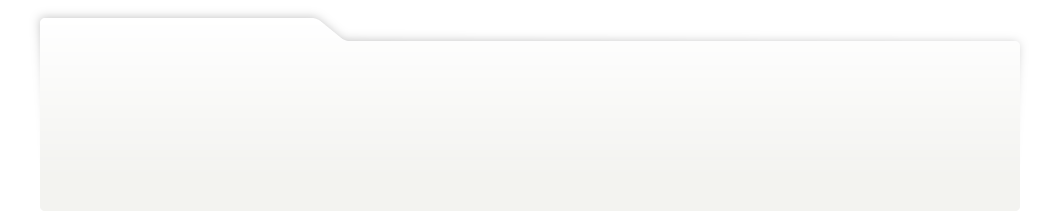
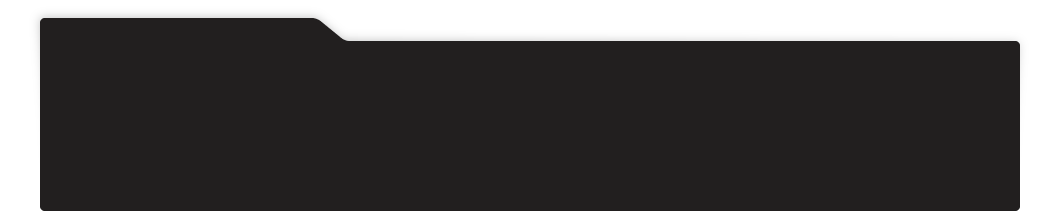
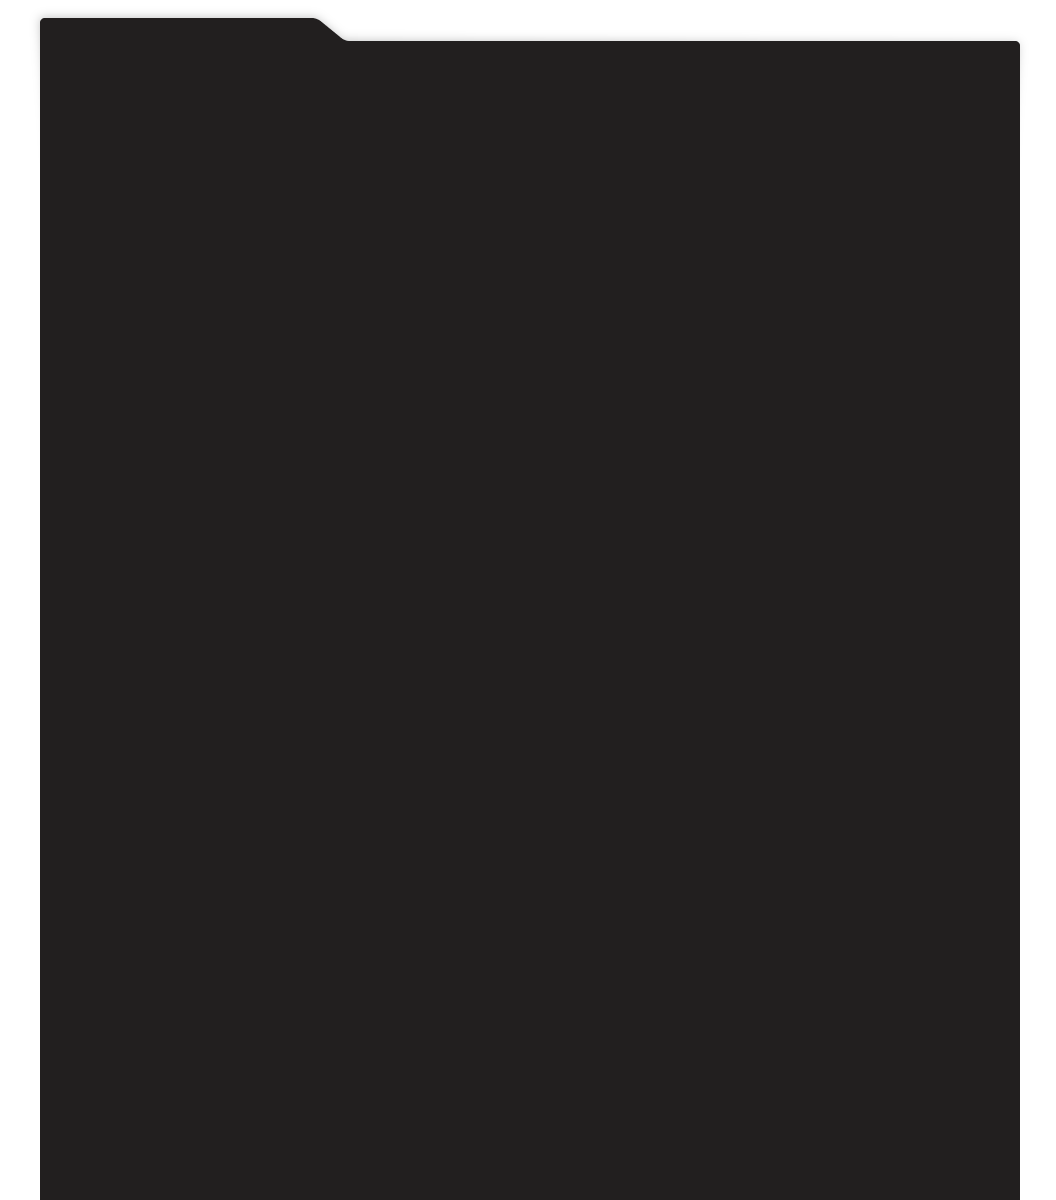
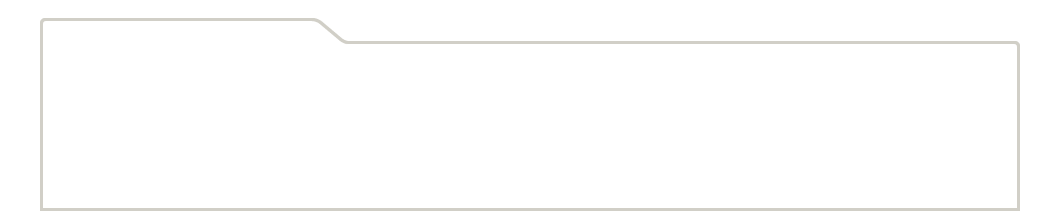
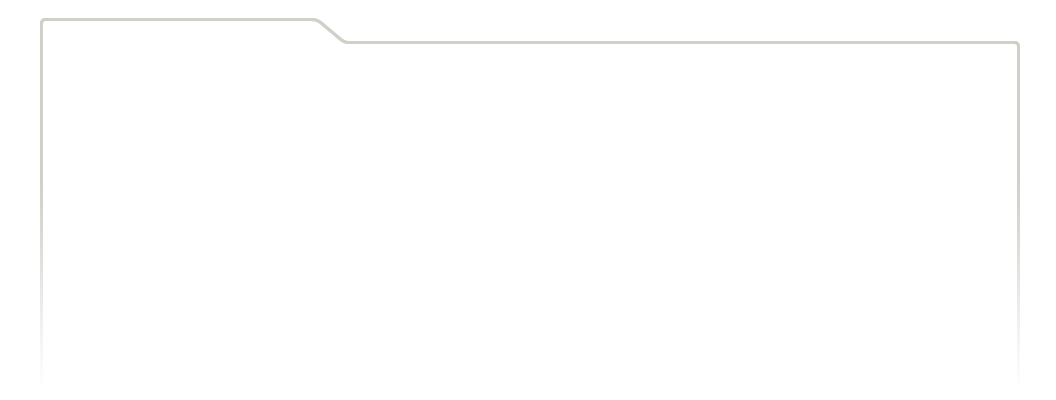
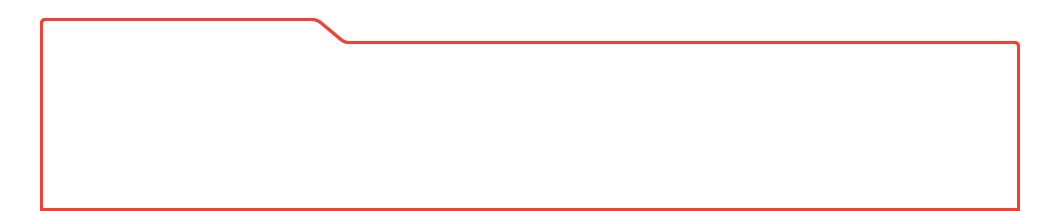
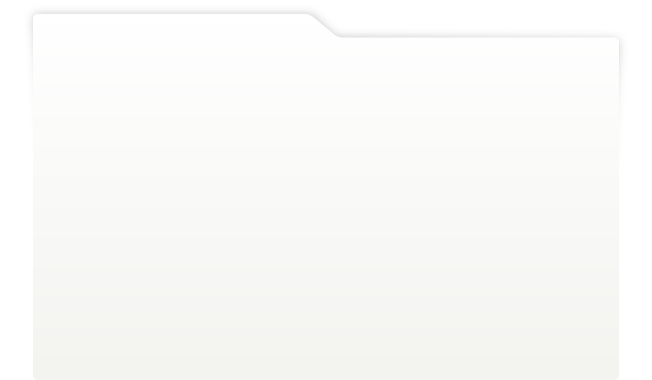
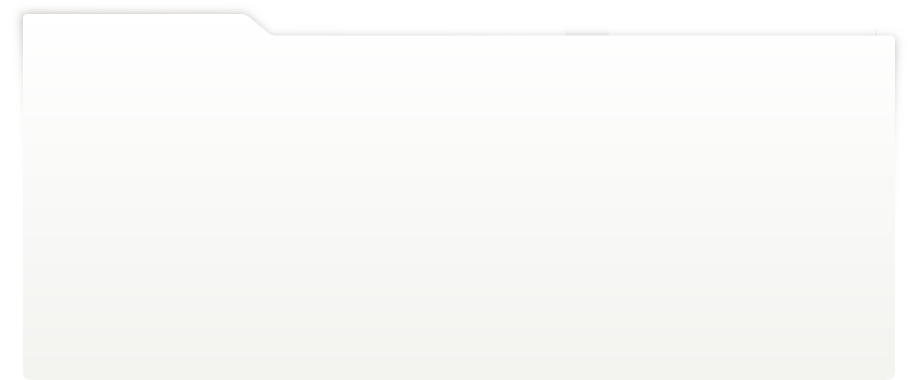
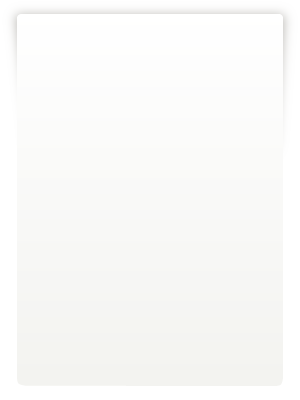
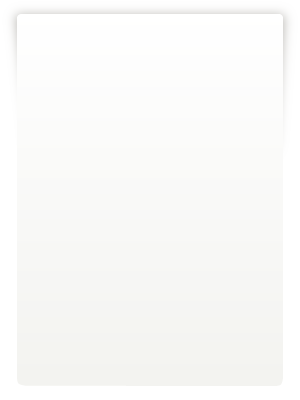
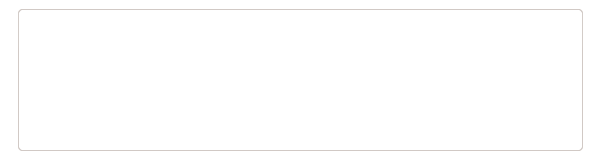
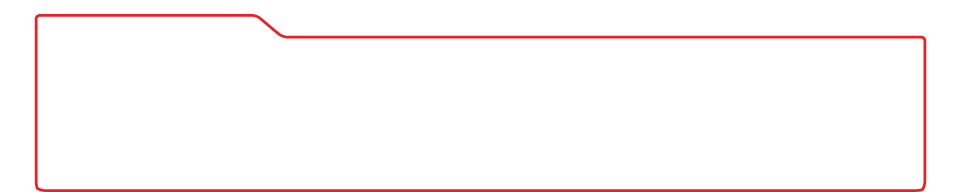
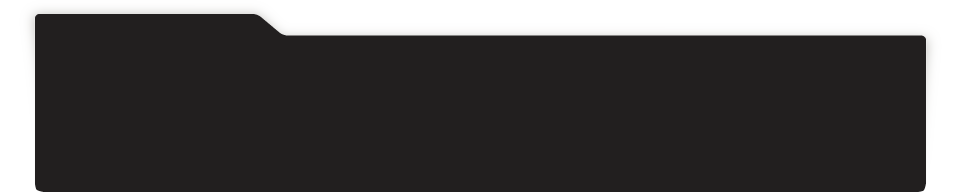
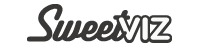
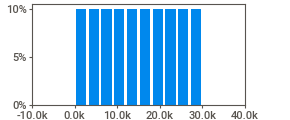
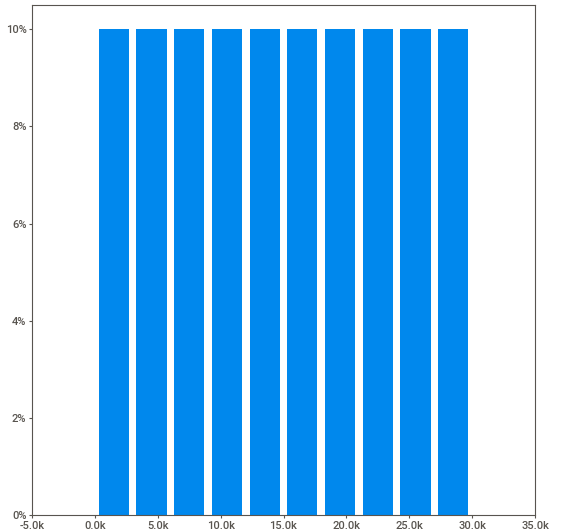
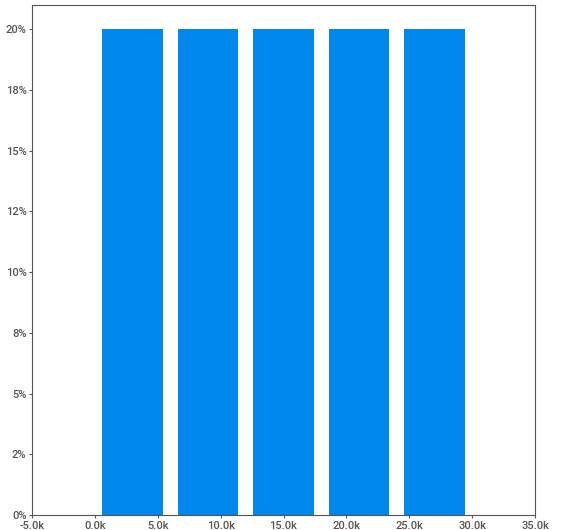
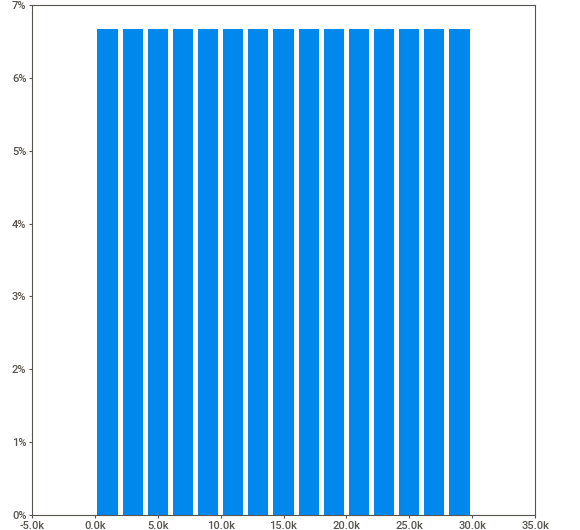
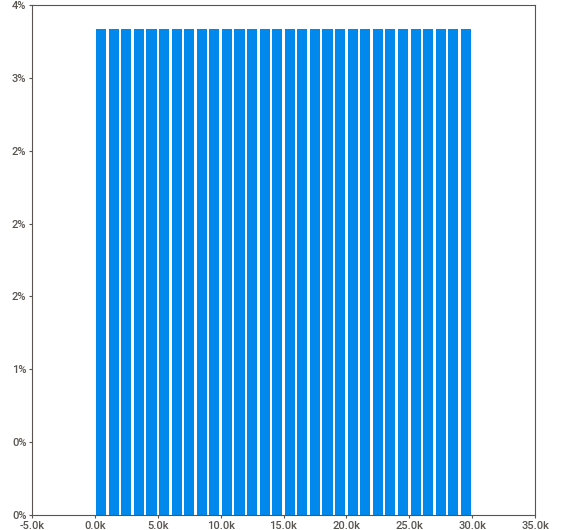
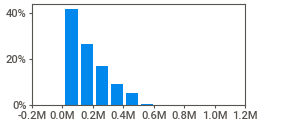
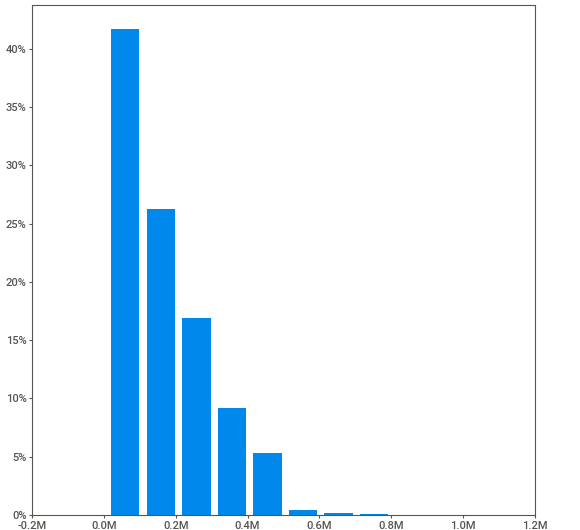
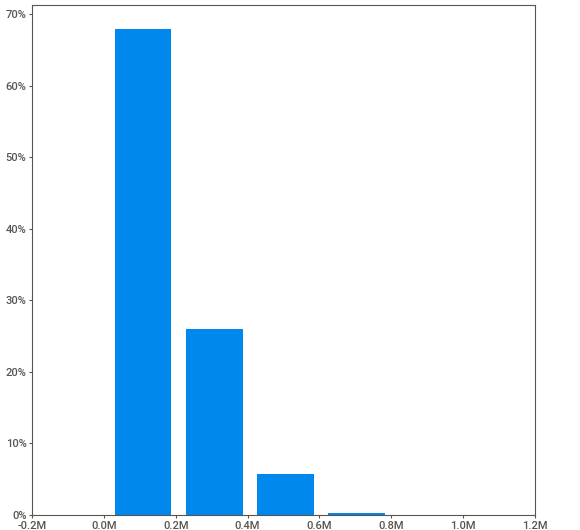
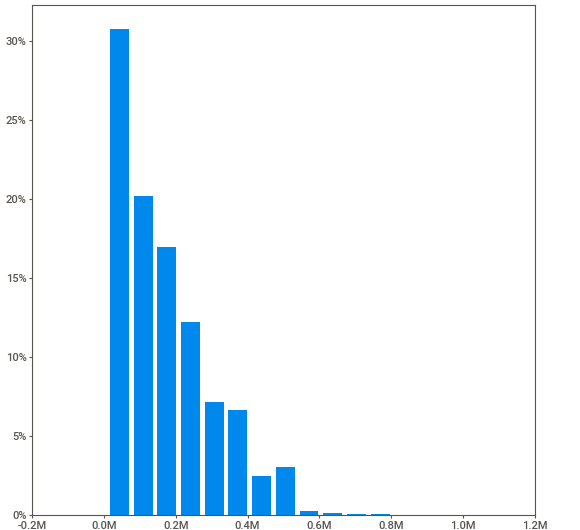
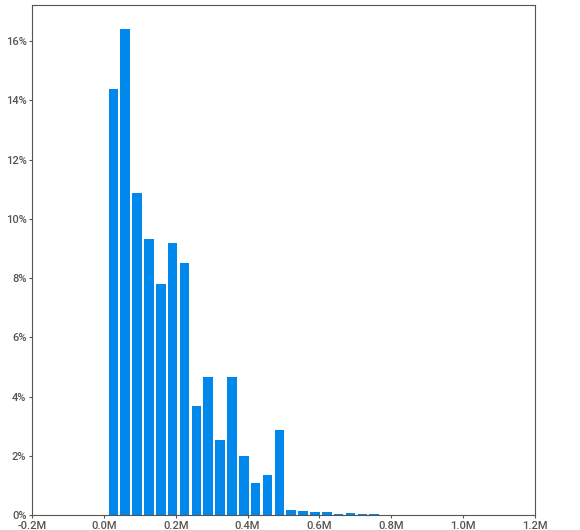
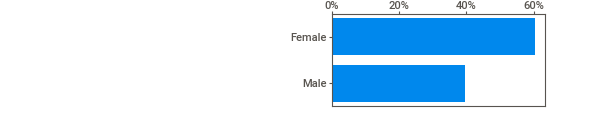
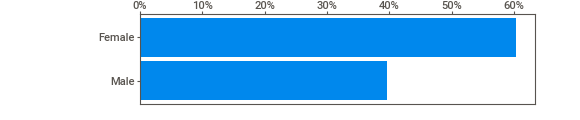
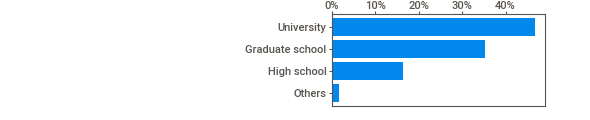
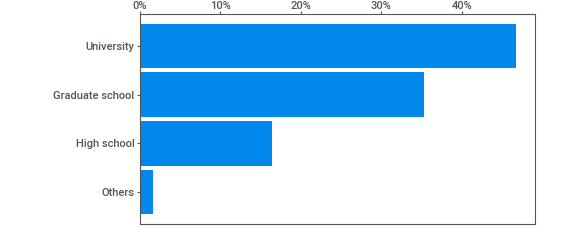
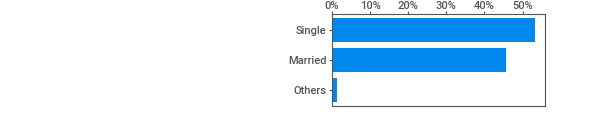
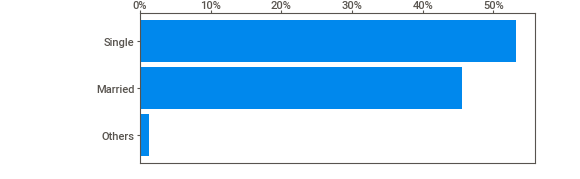
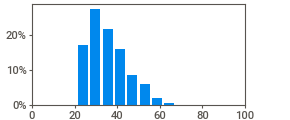
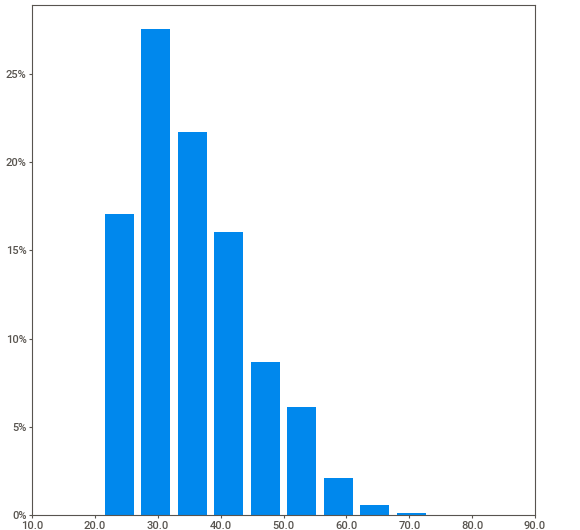
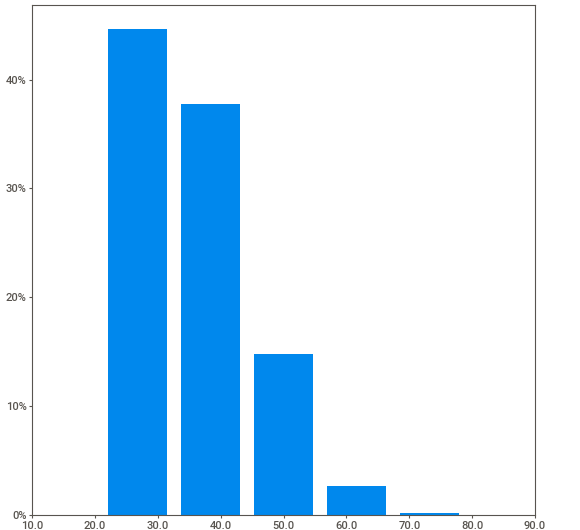
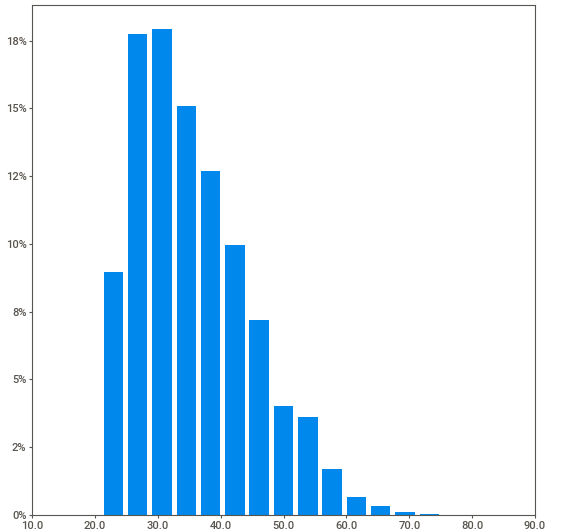
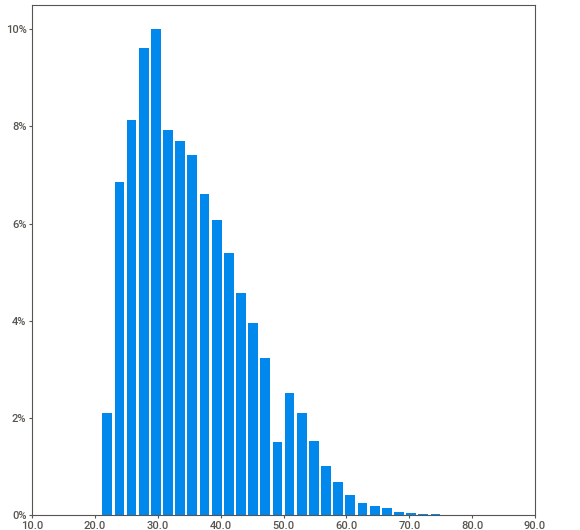
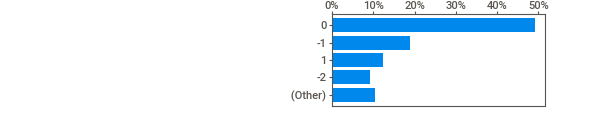
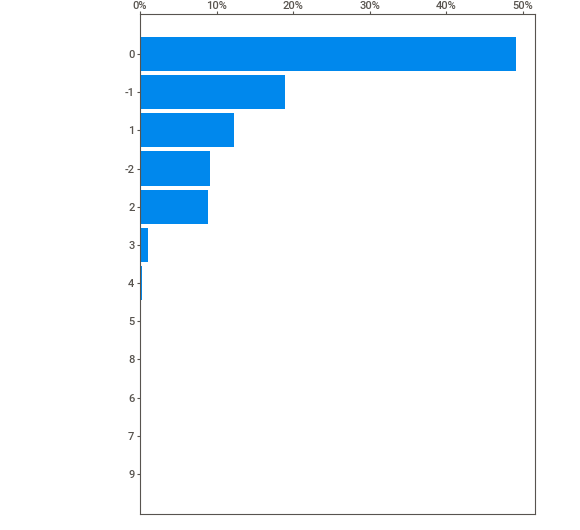
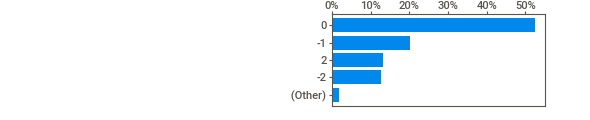
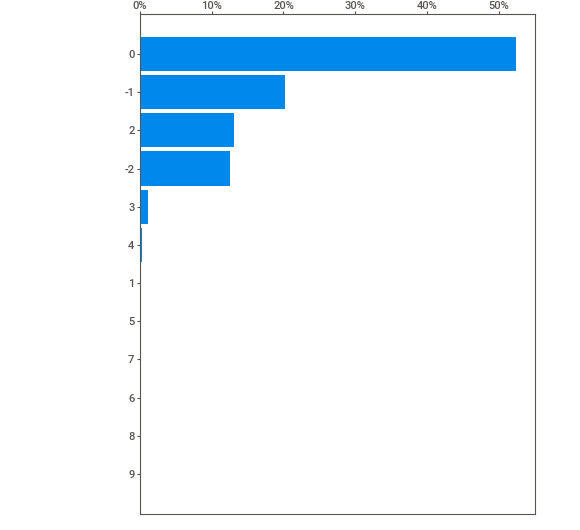
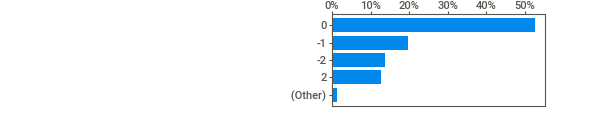
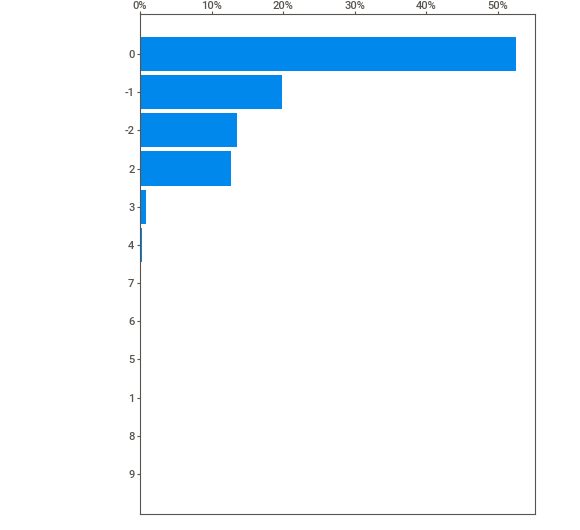
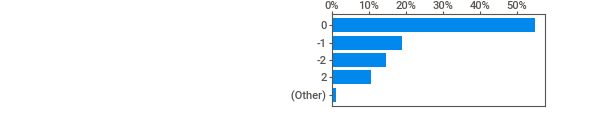
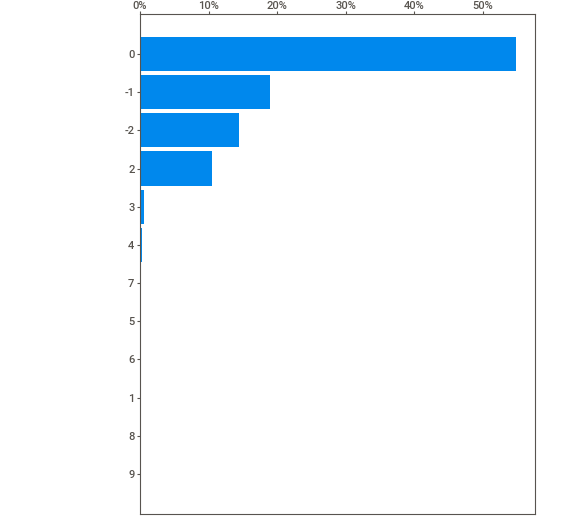
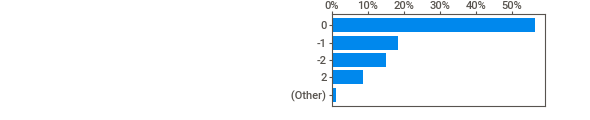
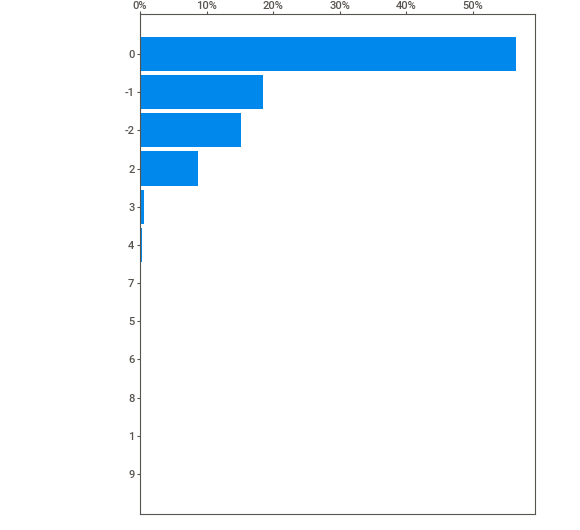
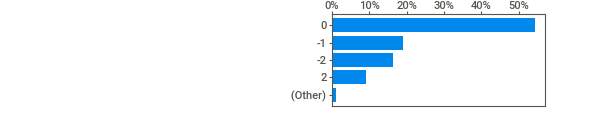
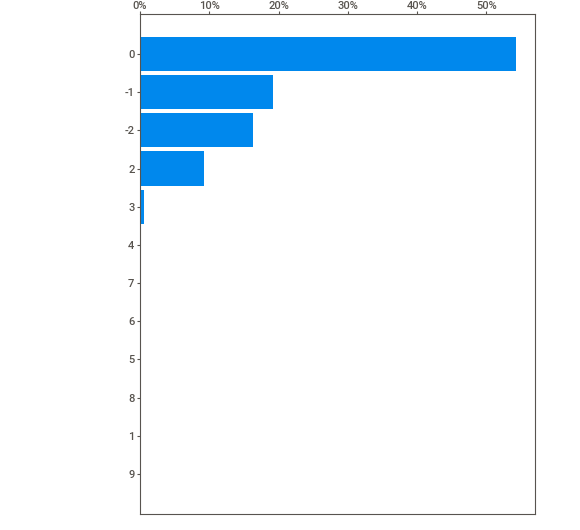
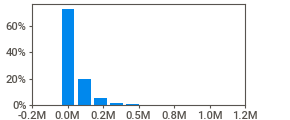
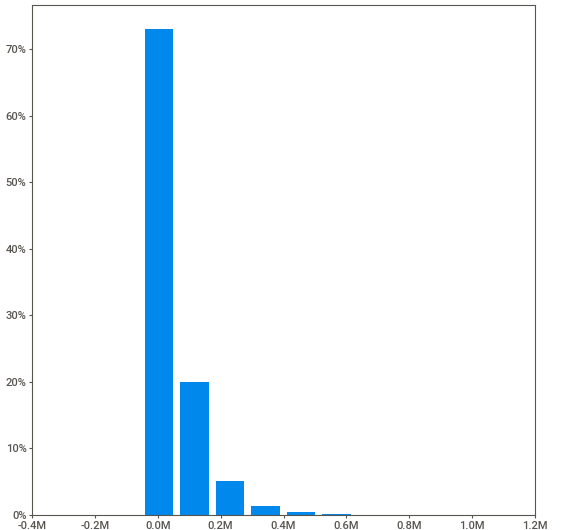
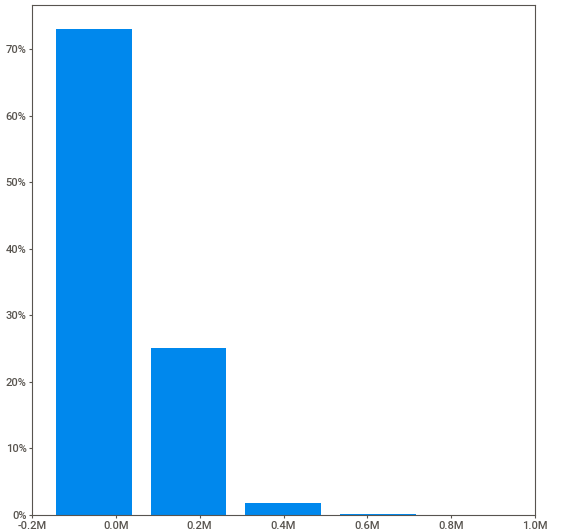
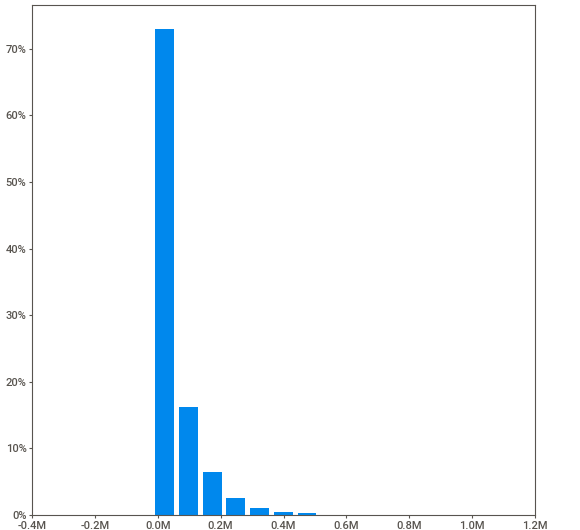
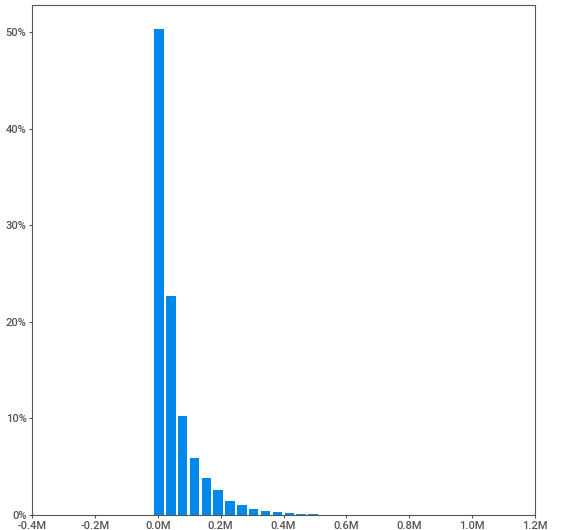
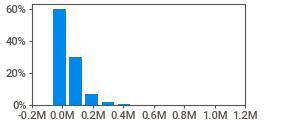
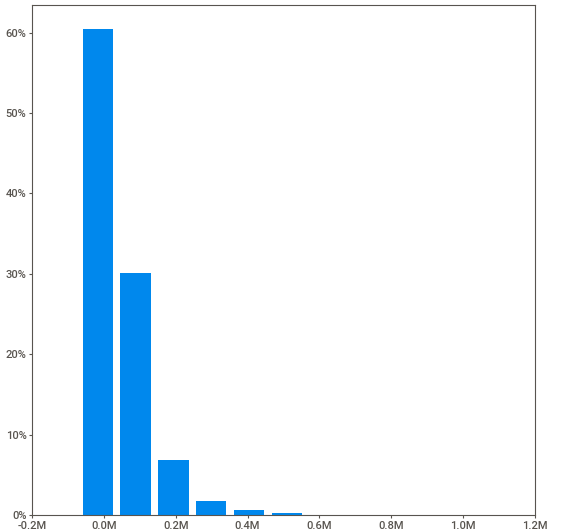
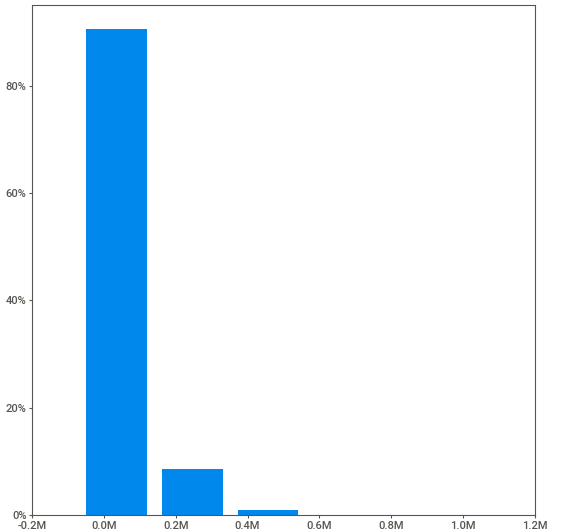
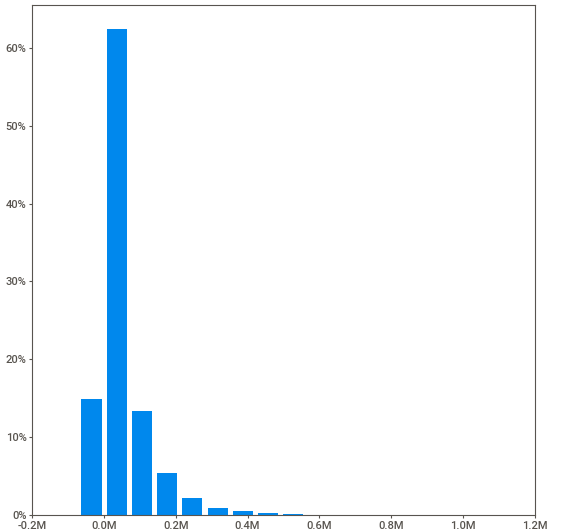
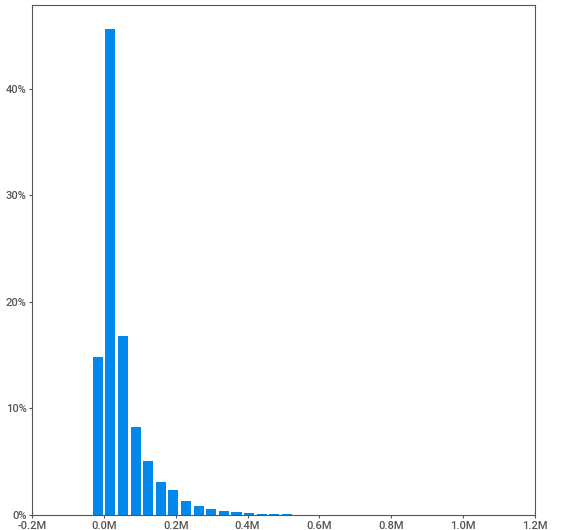
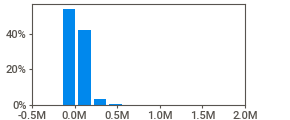
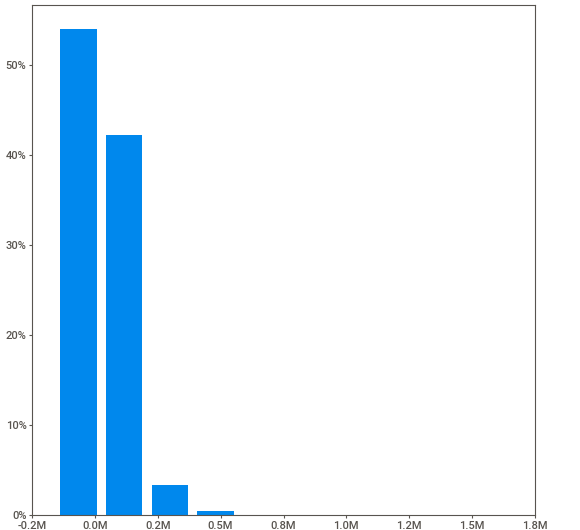
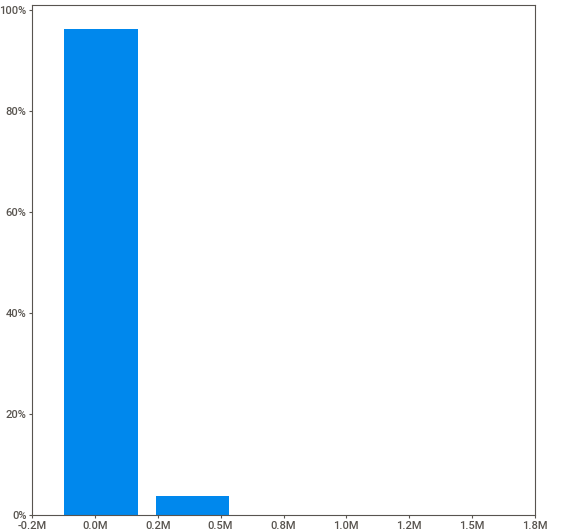
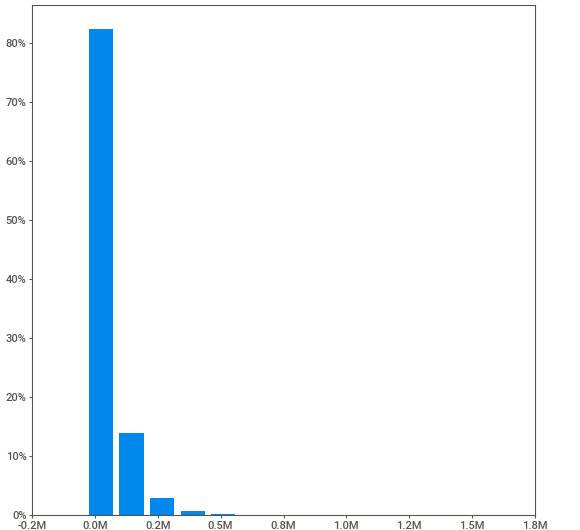
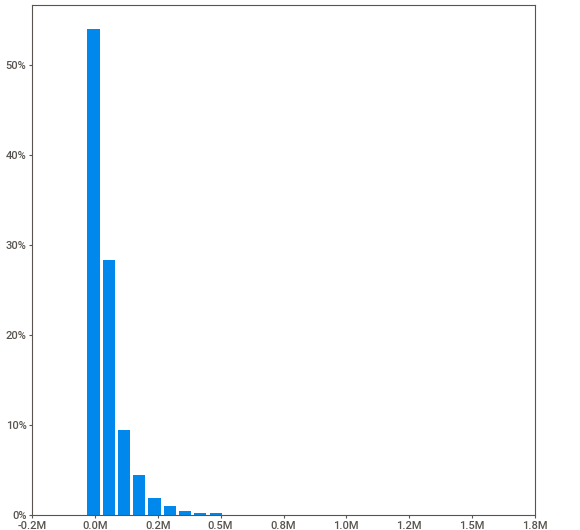
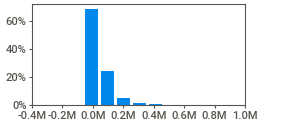
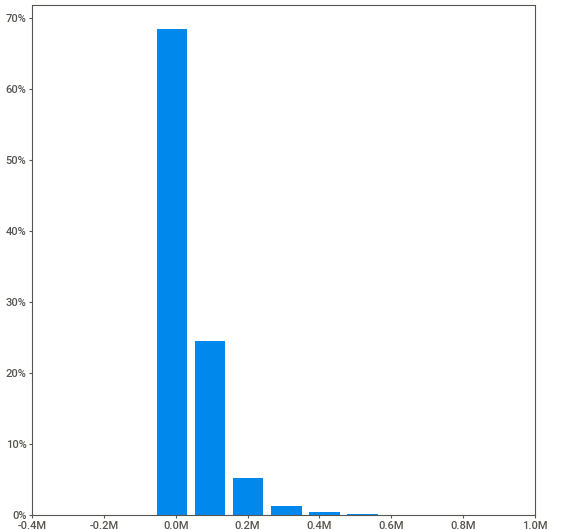
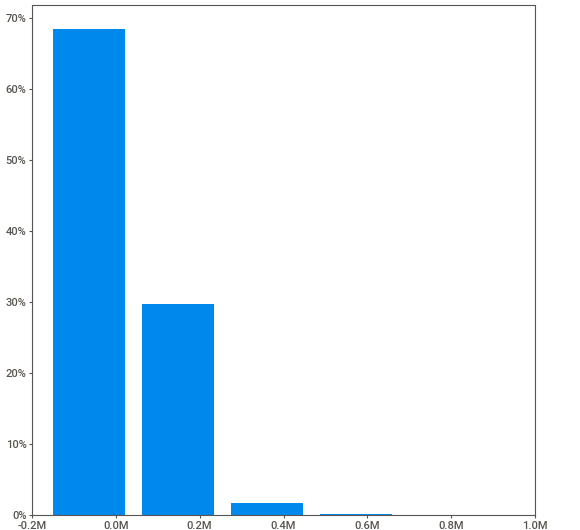
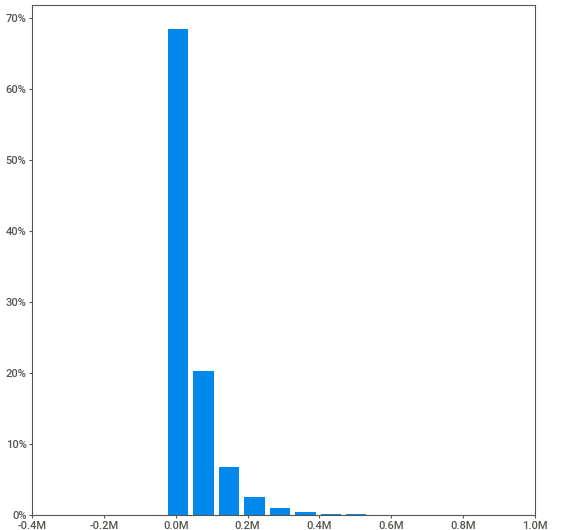
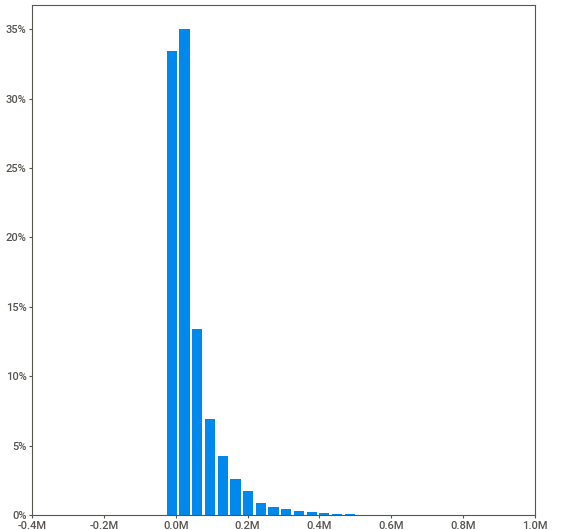
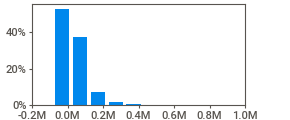
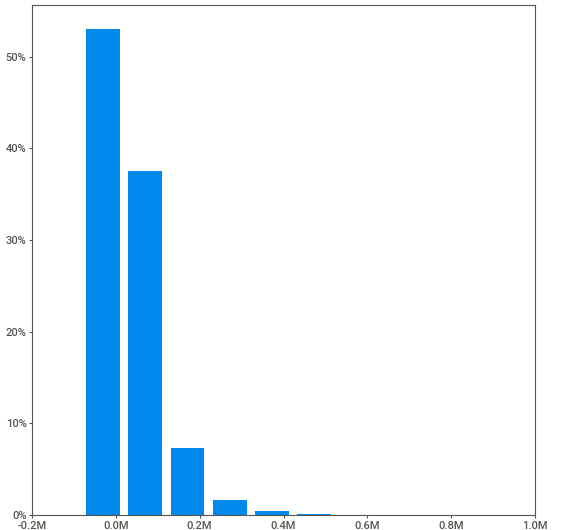
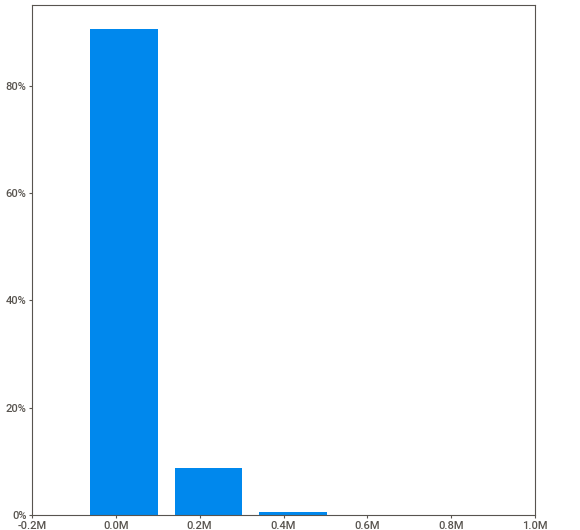
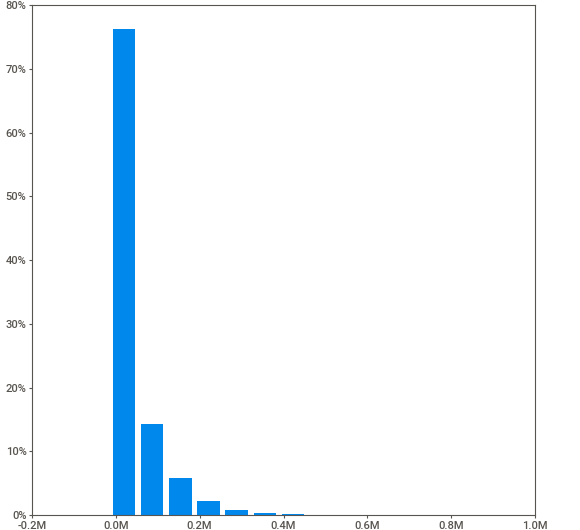
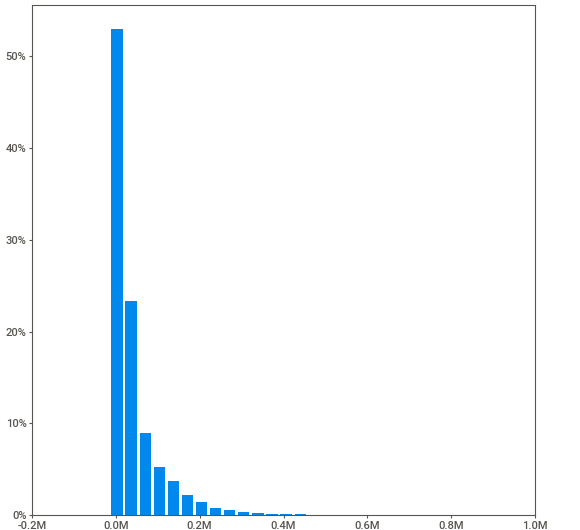
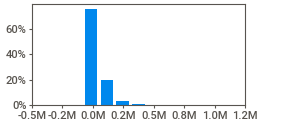
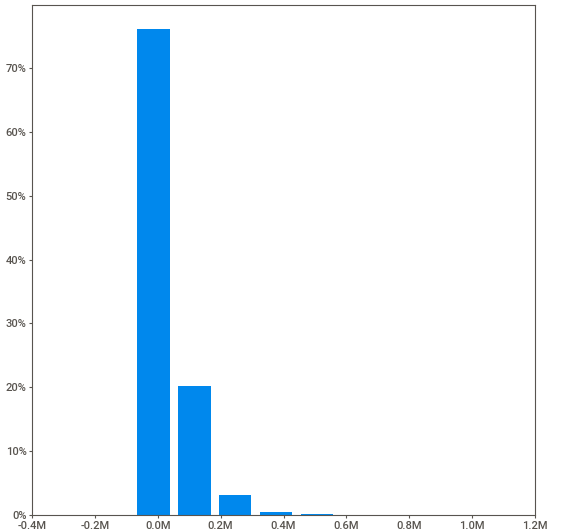
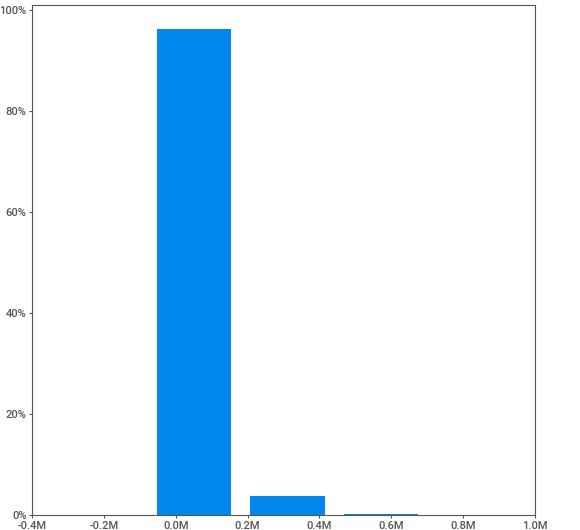
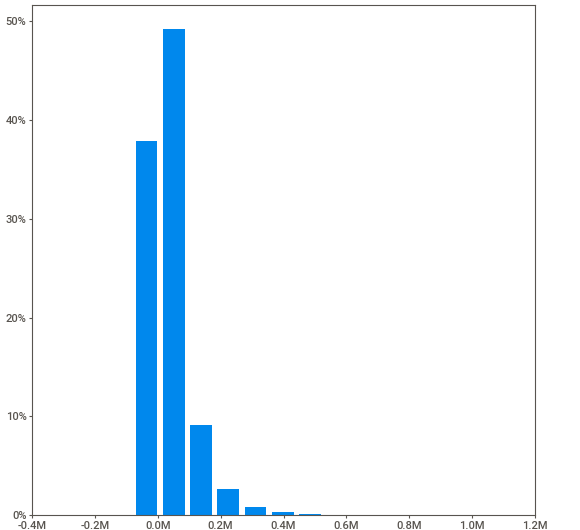
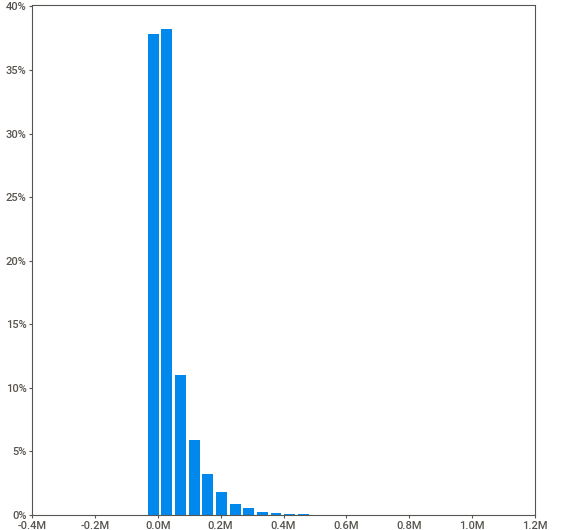
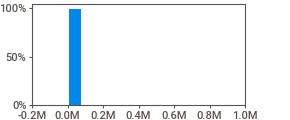
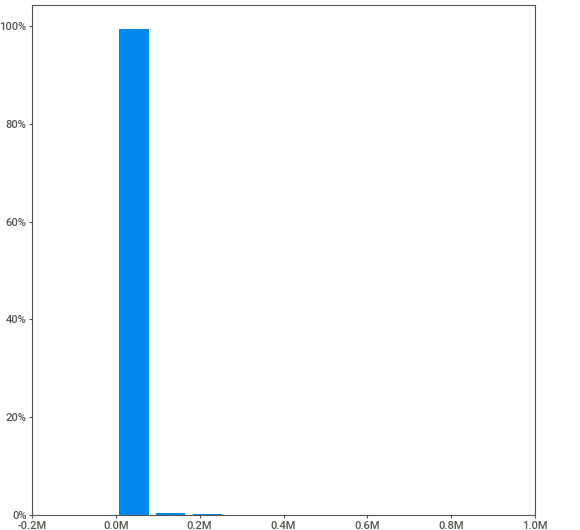
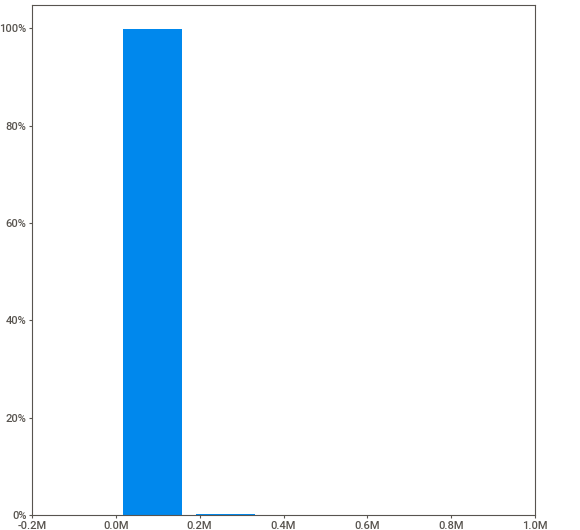
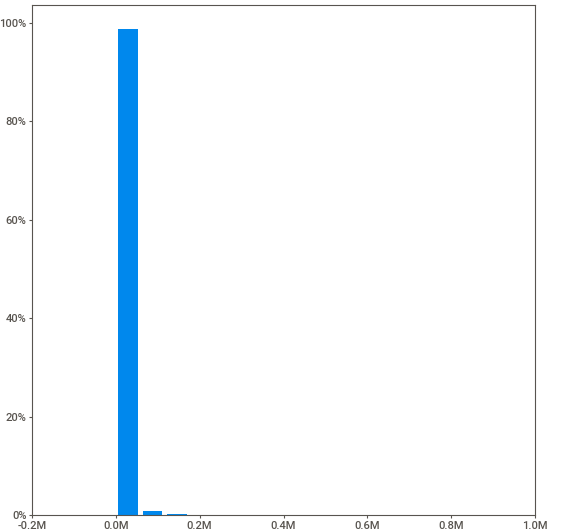
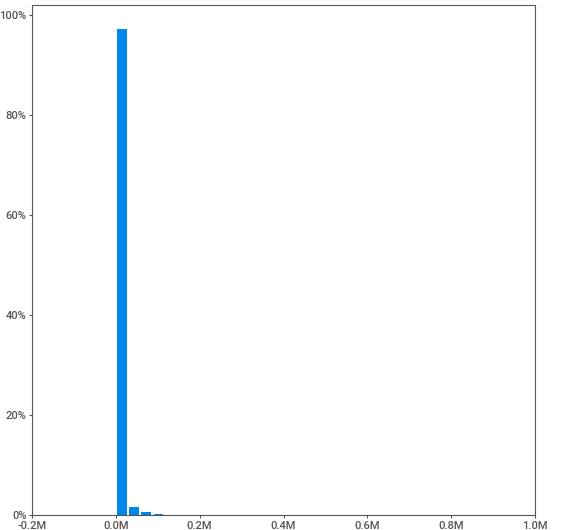
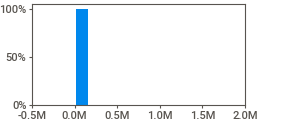
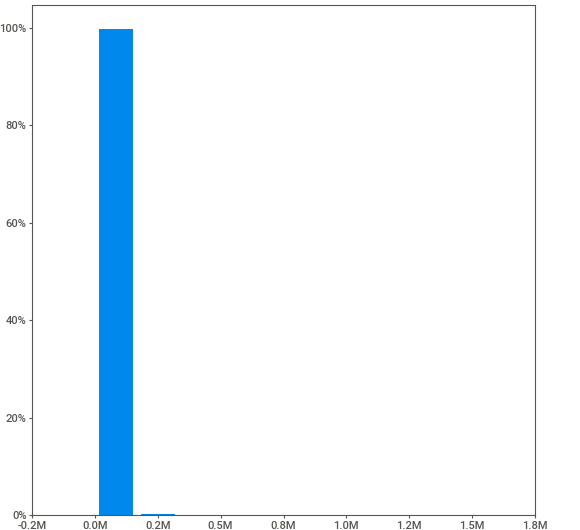
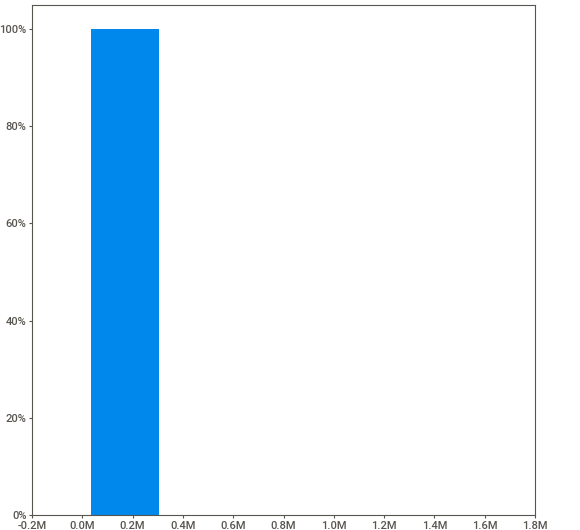
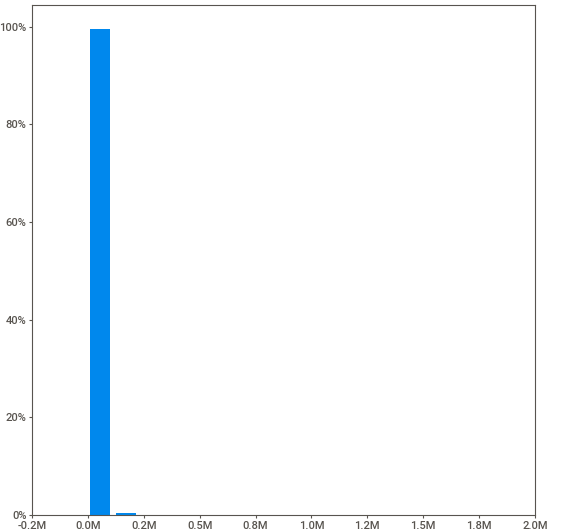
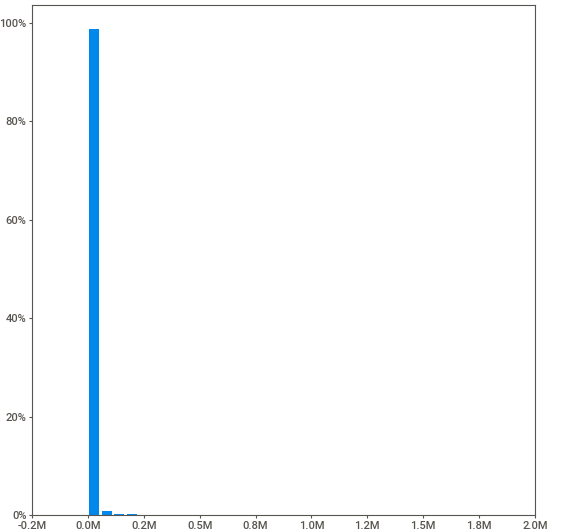
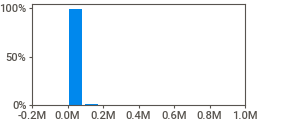
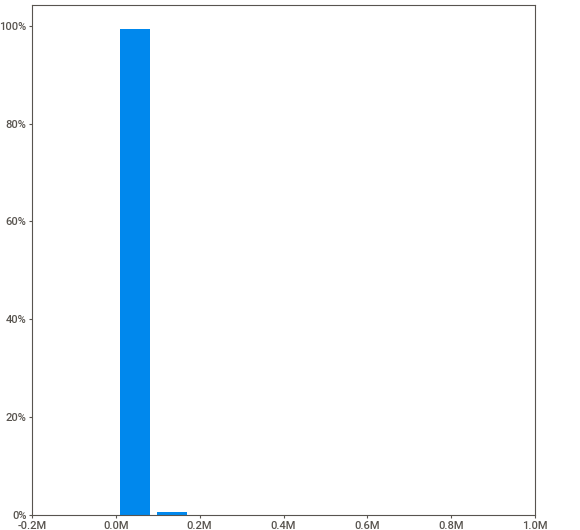
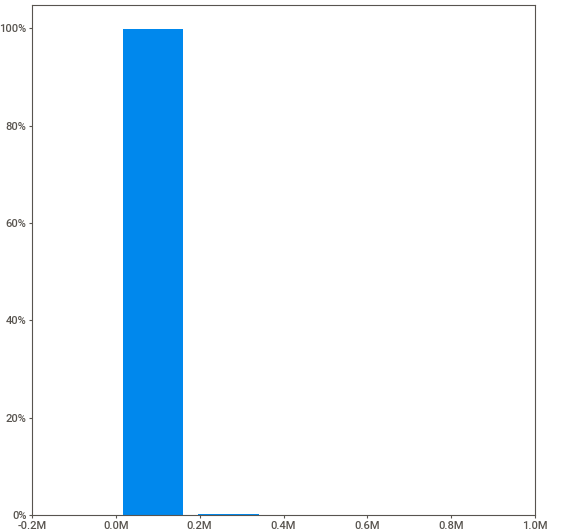
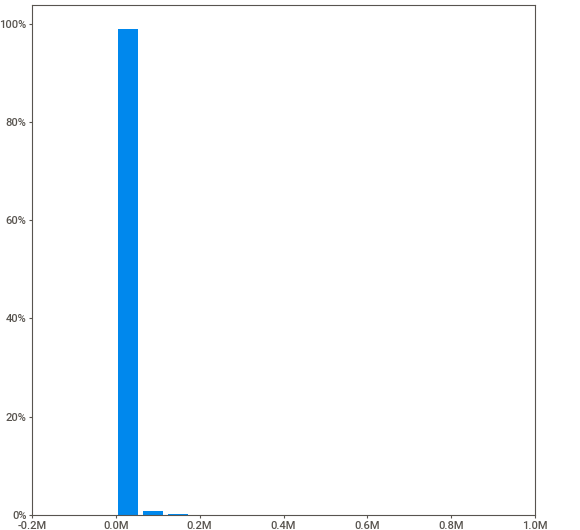
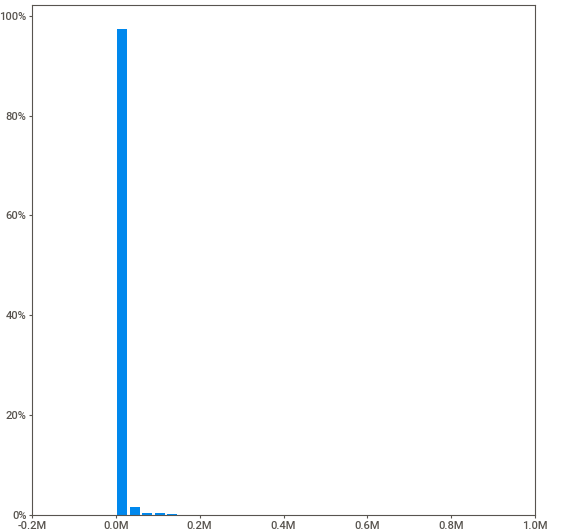
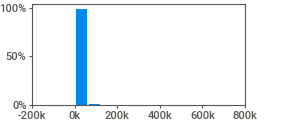
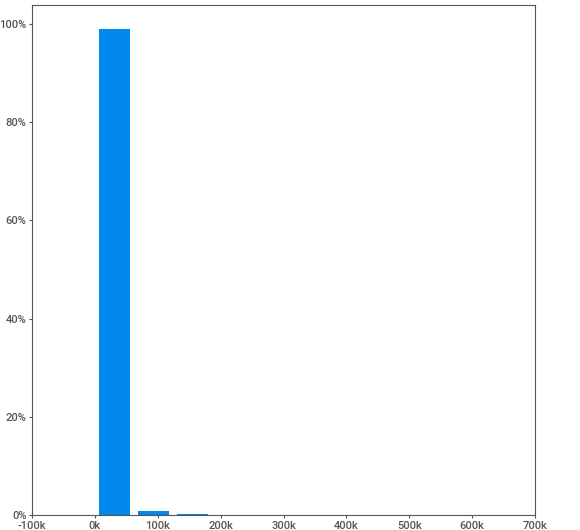
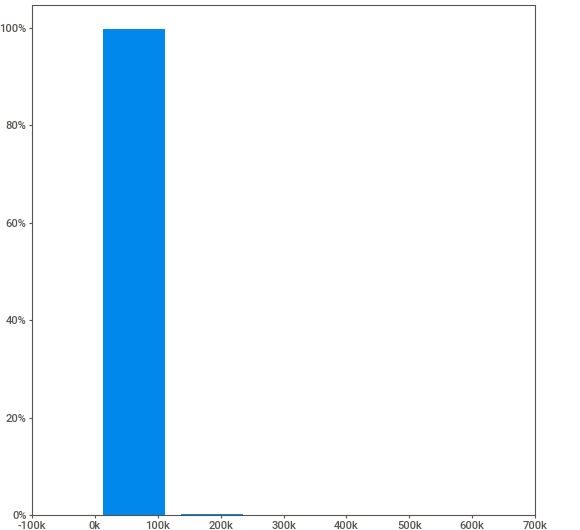
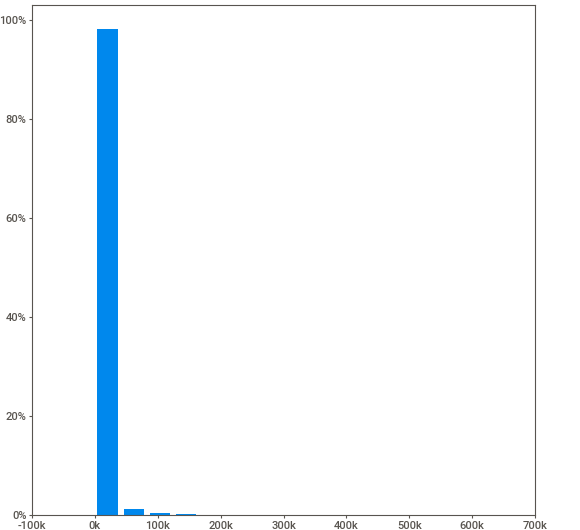
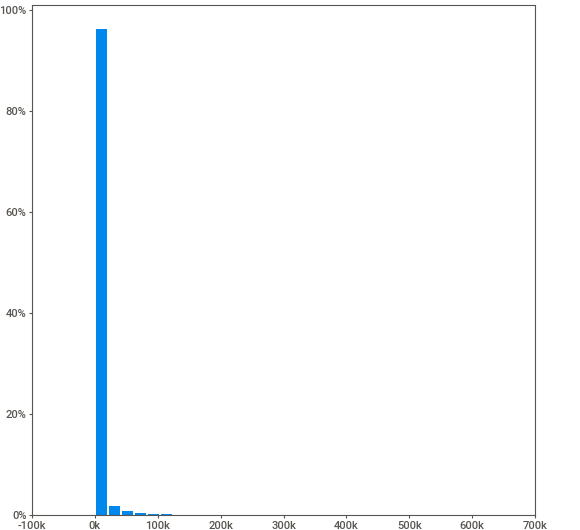
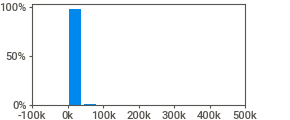
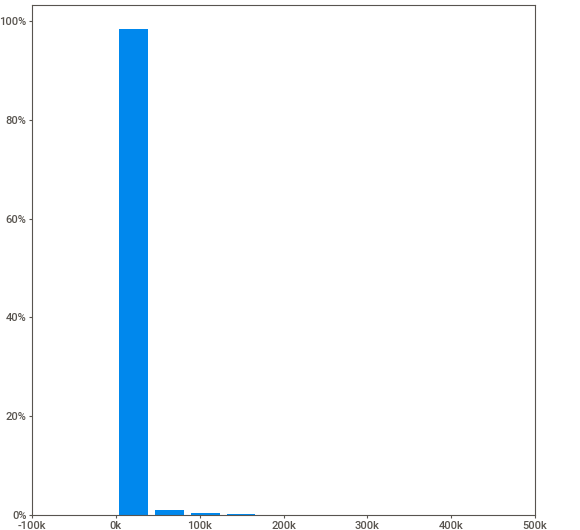
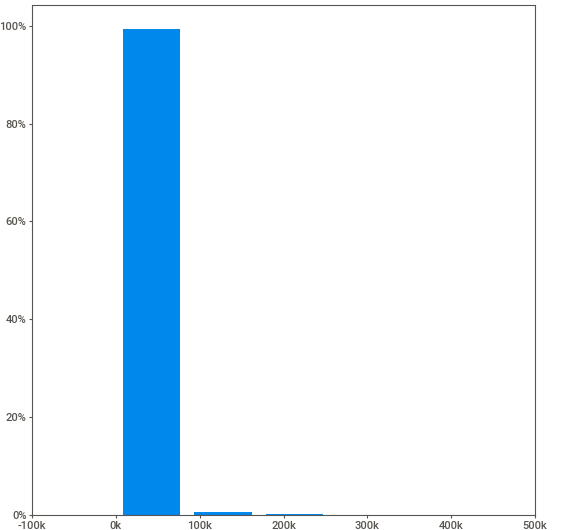
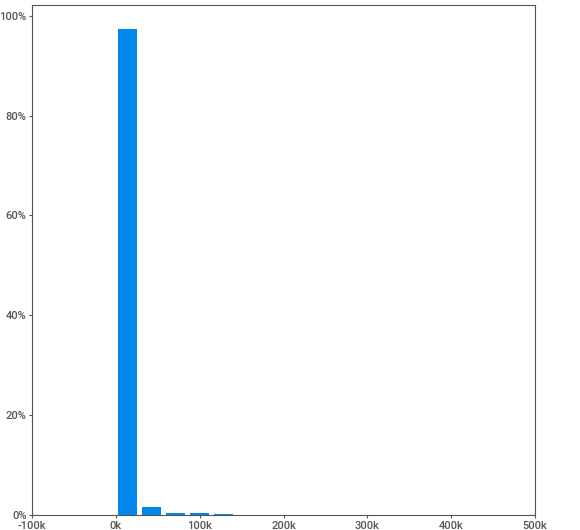
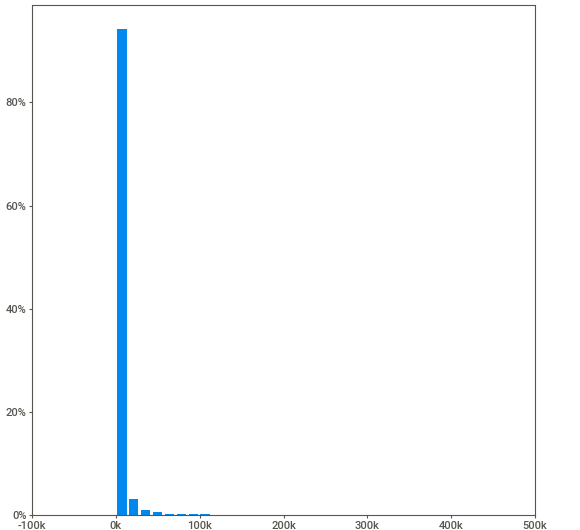
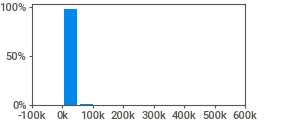
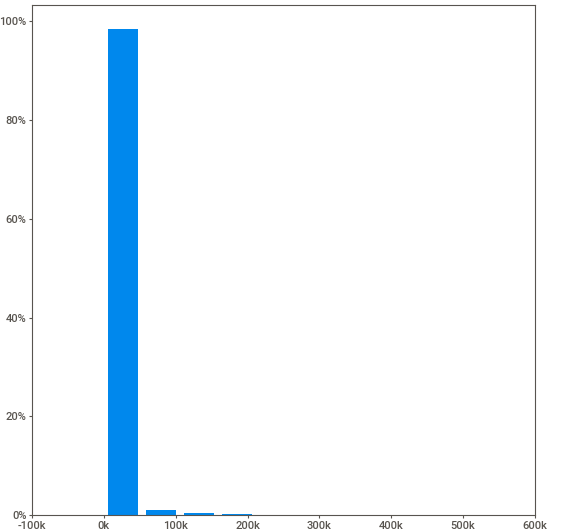
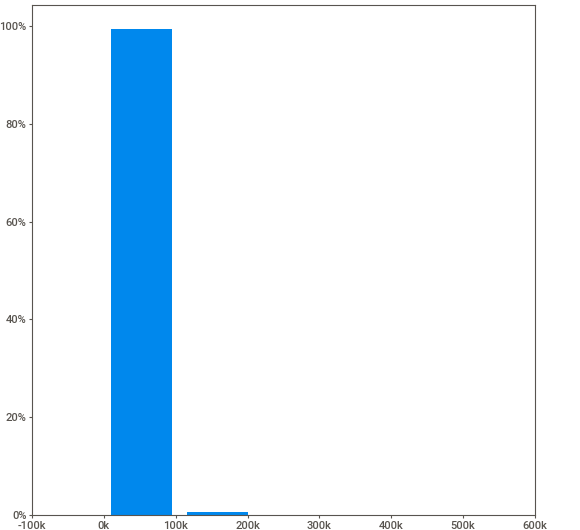
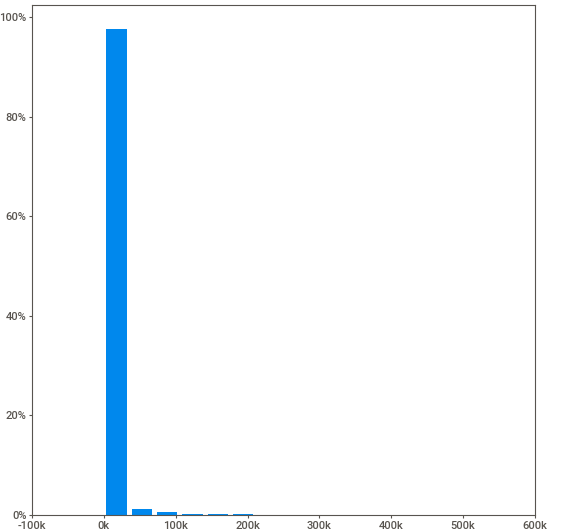
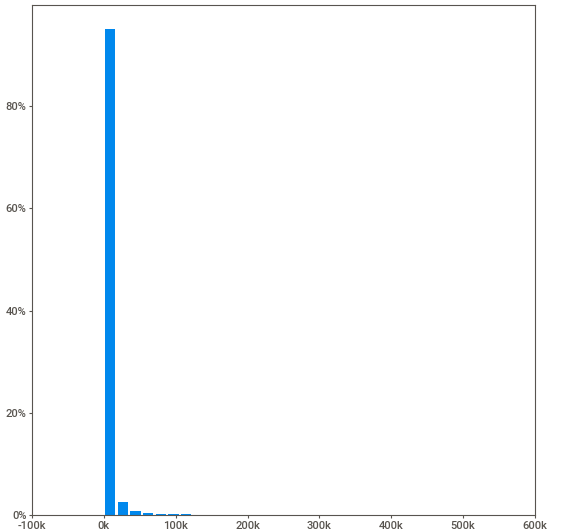
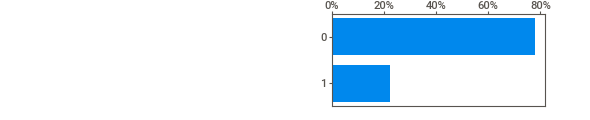
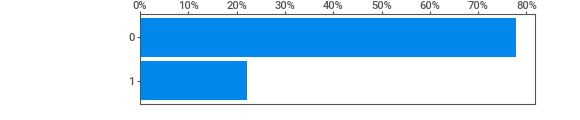
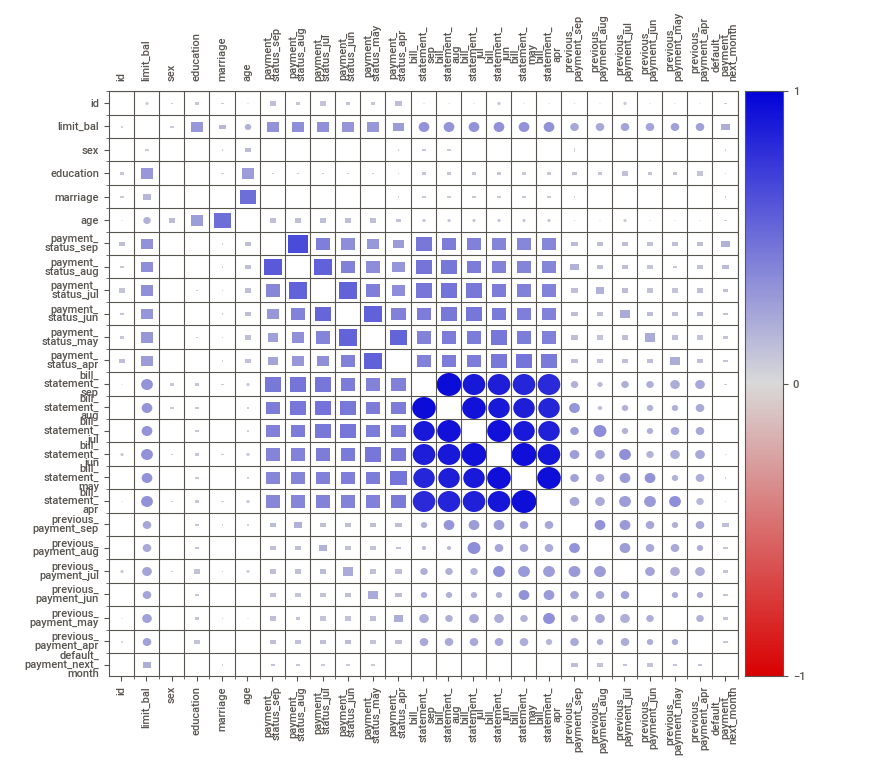
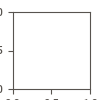

In [21]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report.show_notebook()

In [22]:
my_analyze = sv.analyze(source=raw_df, target_feat="default payment next month")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:05 -> (00:00 left)


In [23]:
my_analyze.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



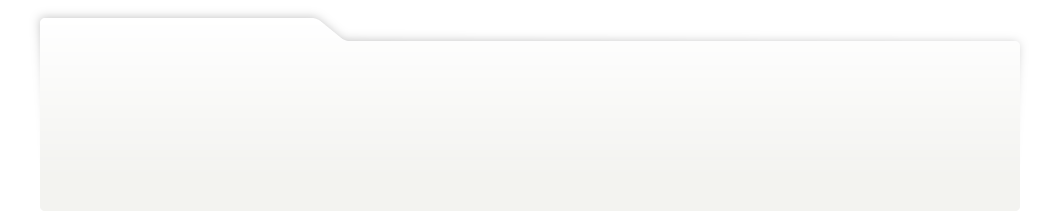
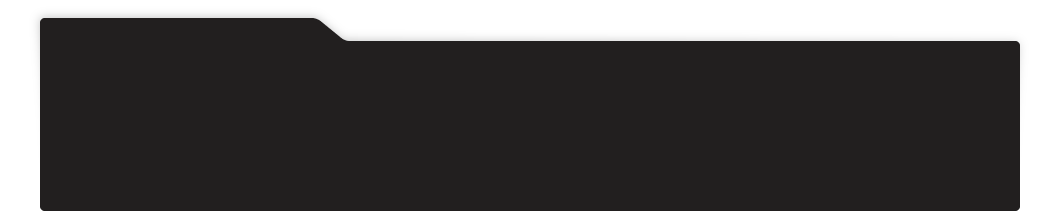
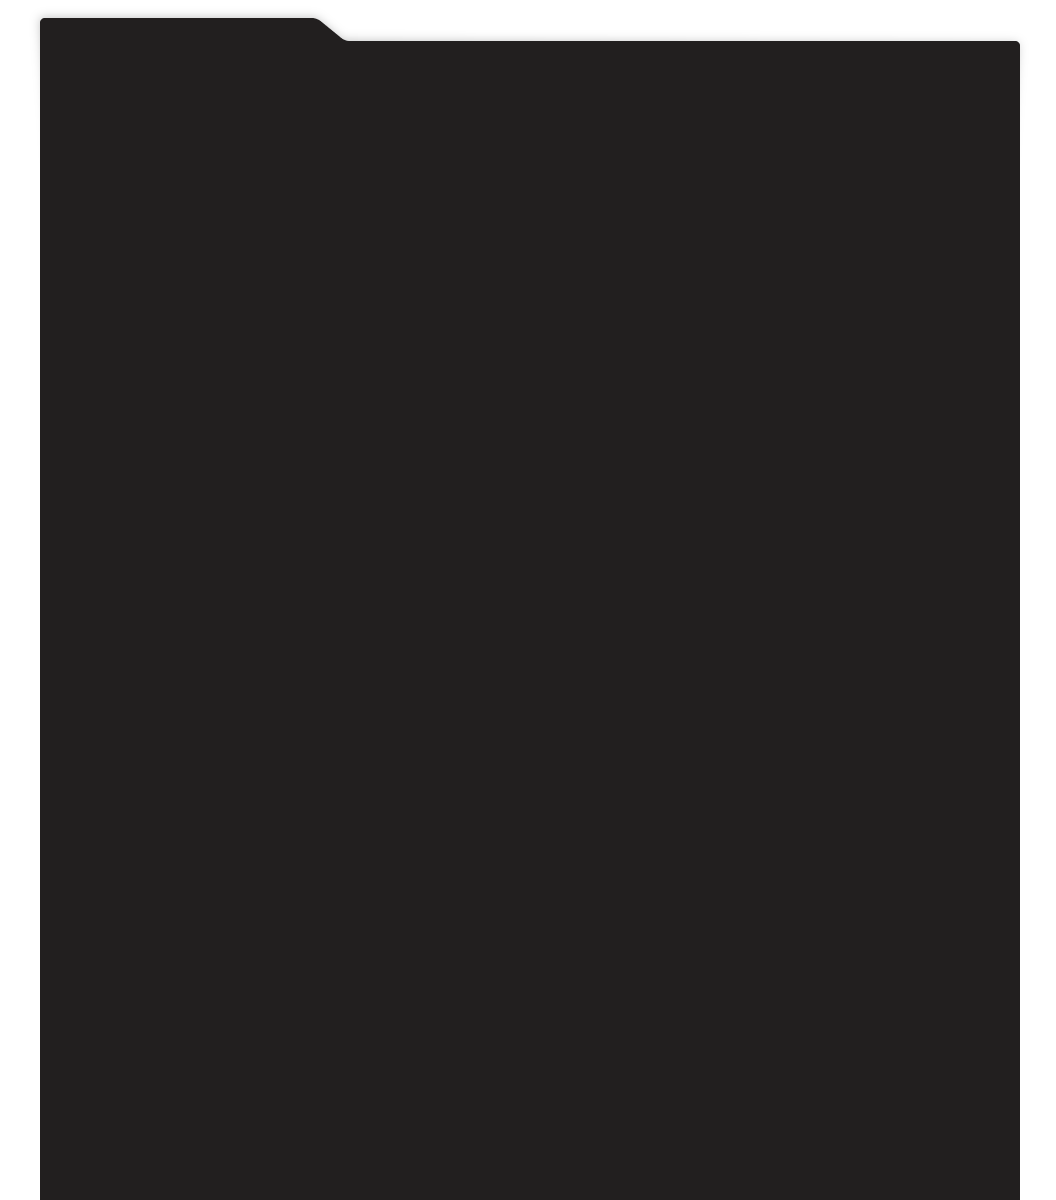
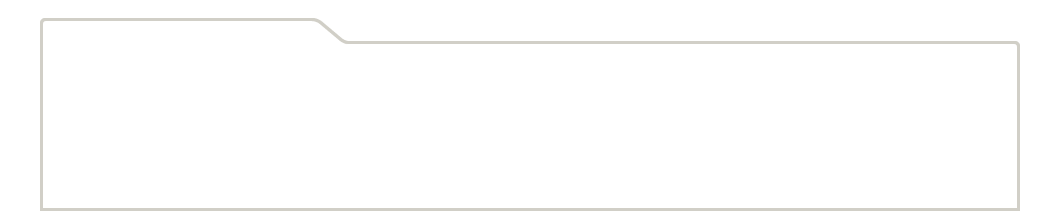
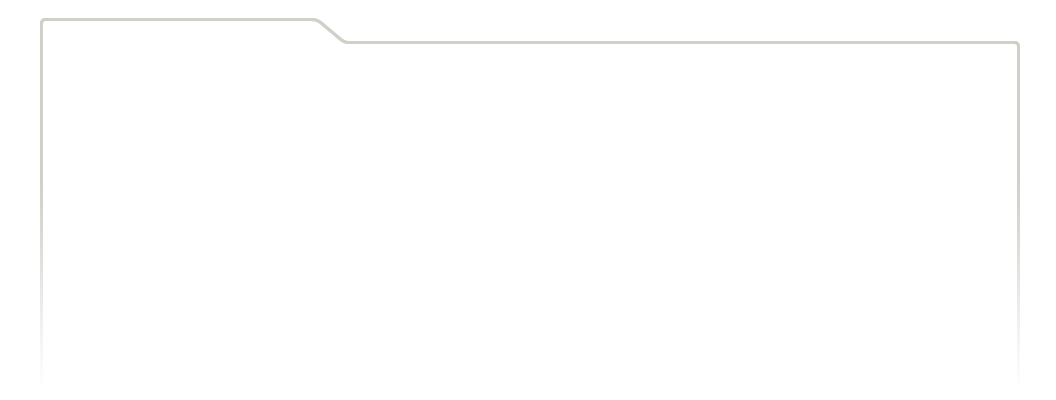
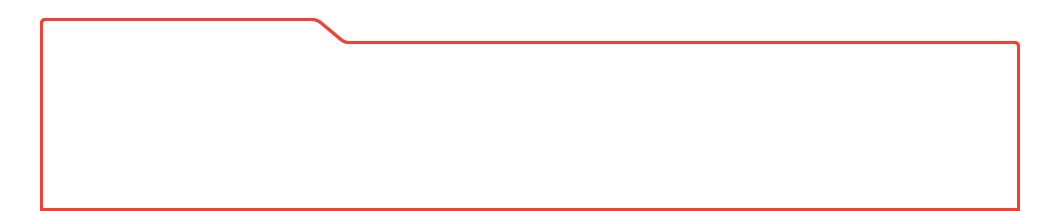
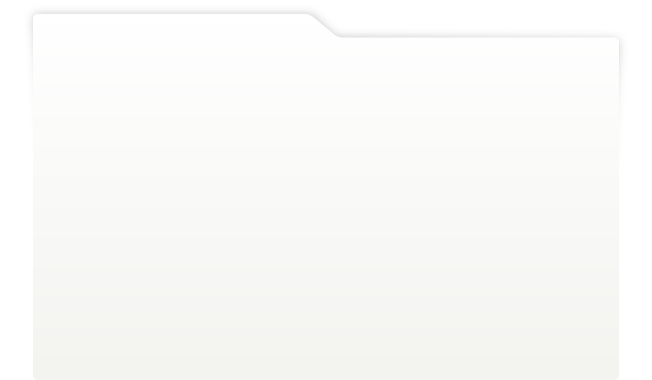
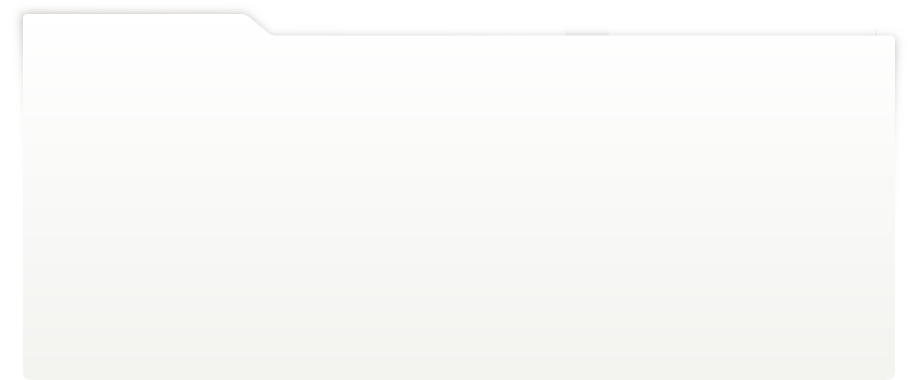
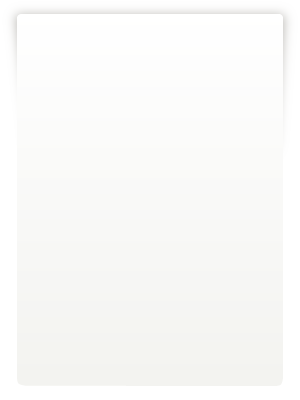
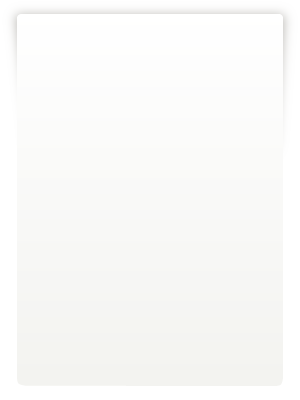
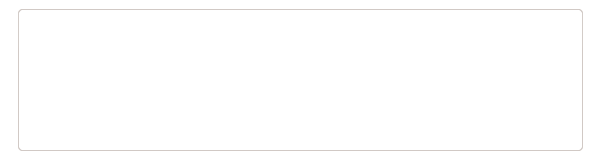
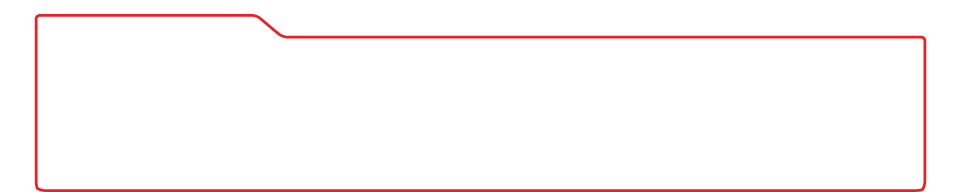
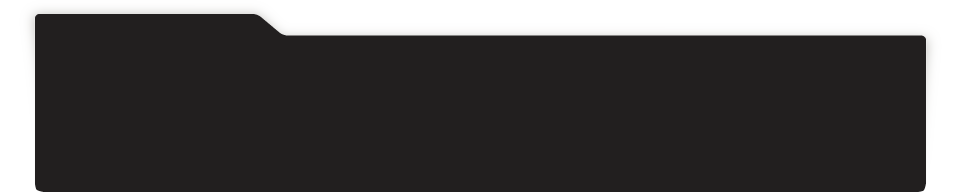
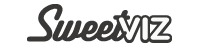
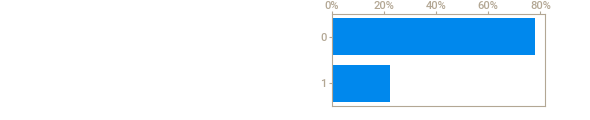
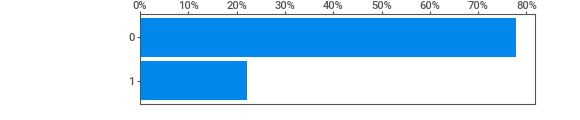
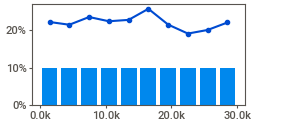
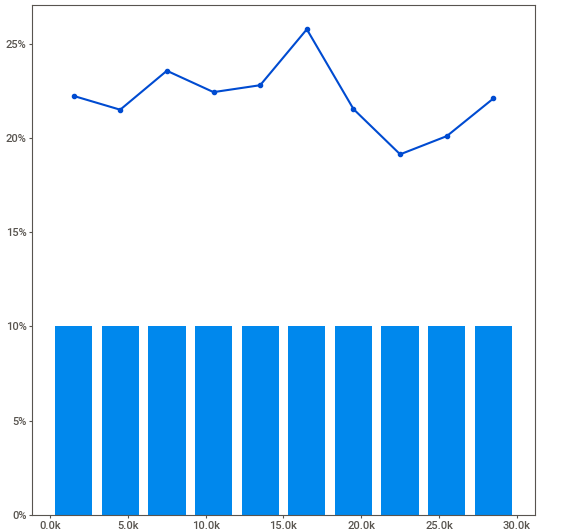
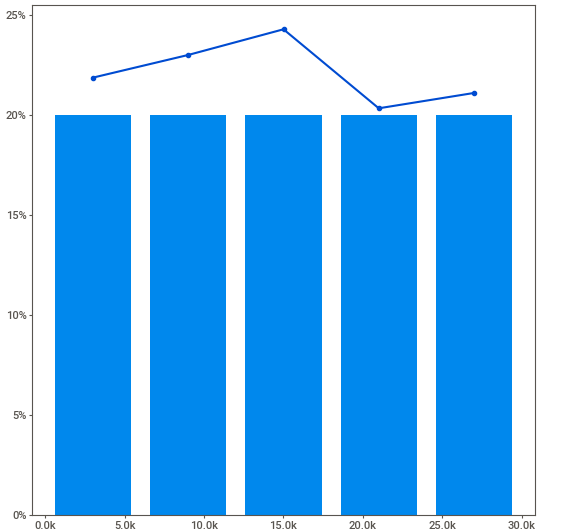
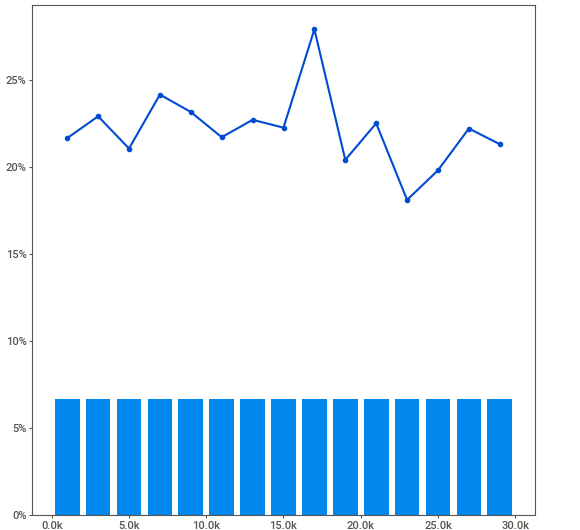
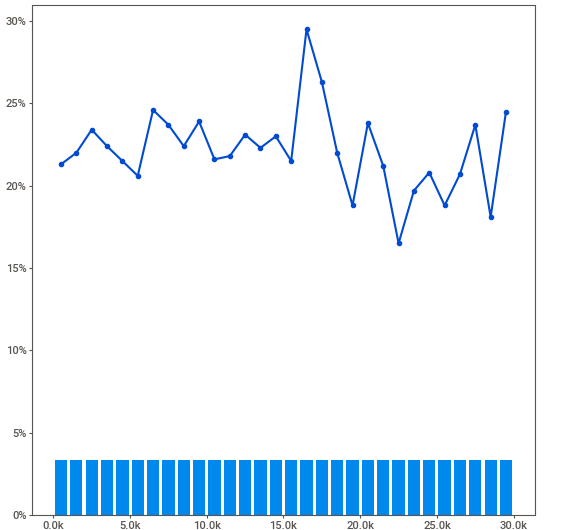
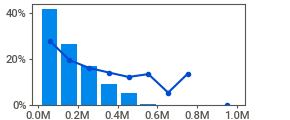
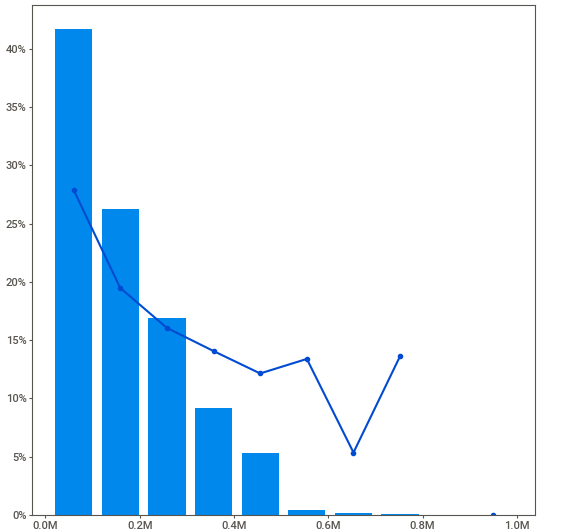
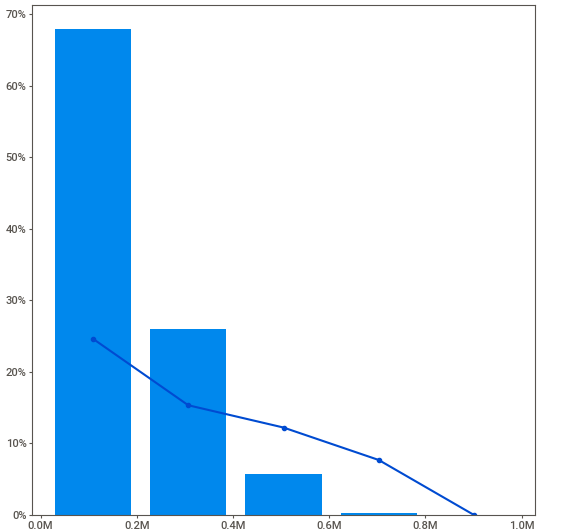
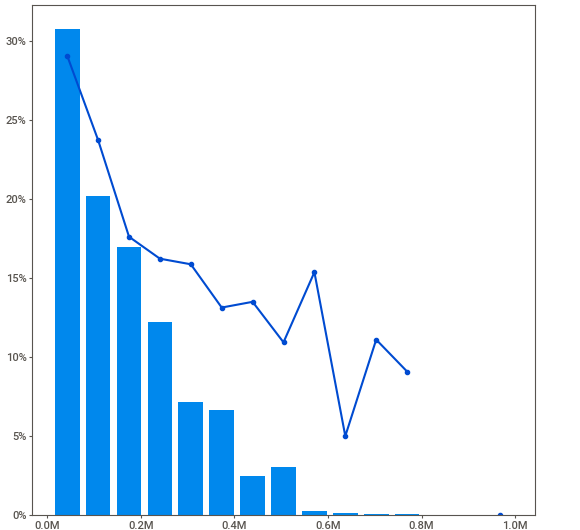
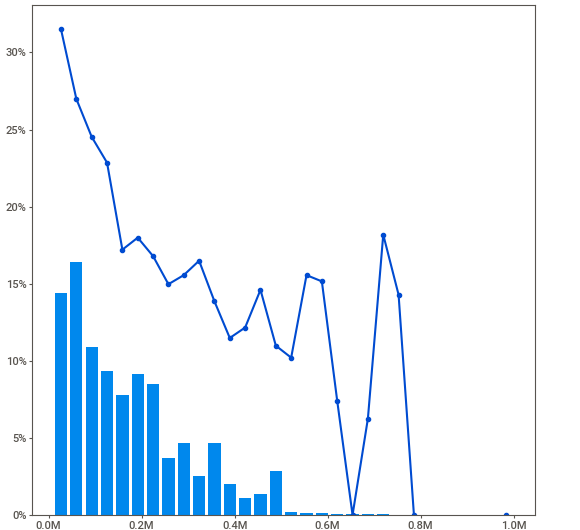
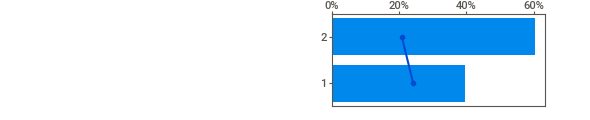
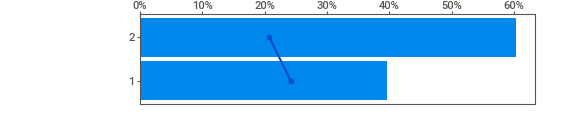
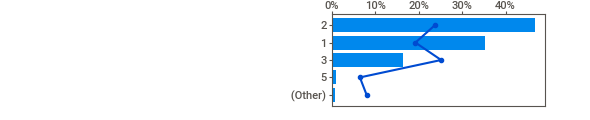
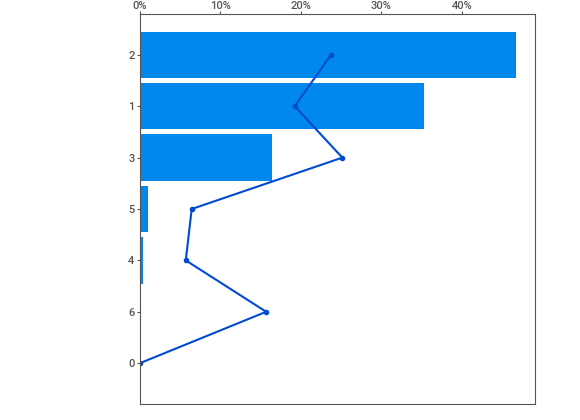
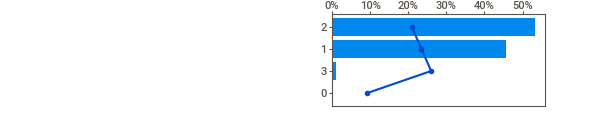
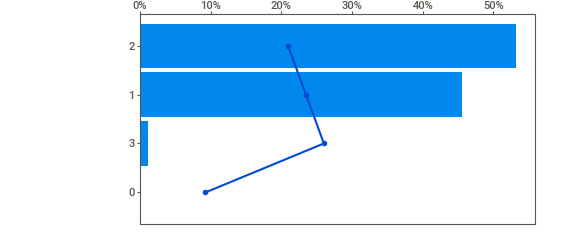
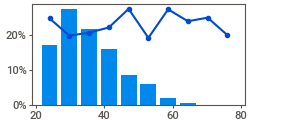
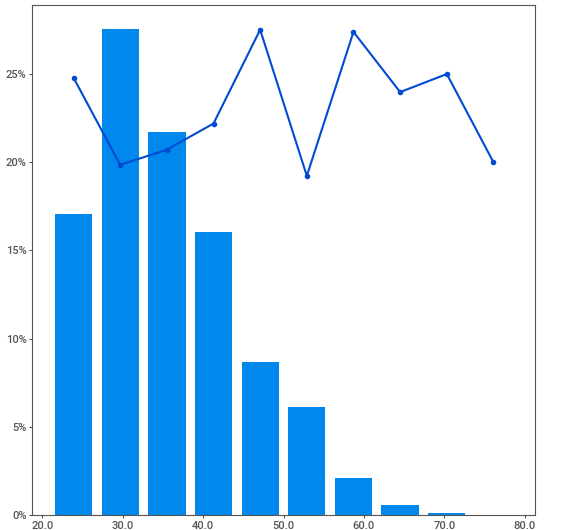
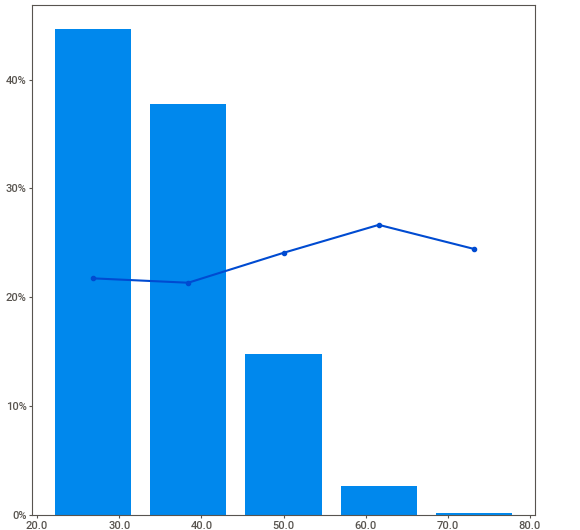
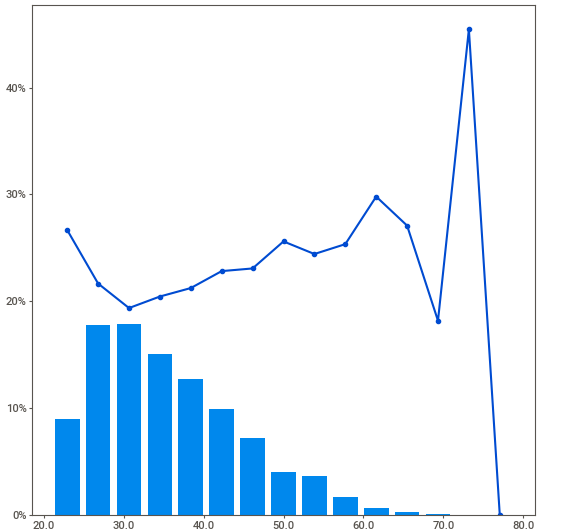
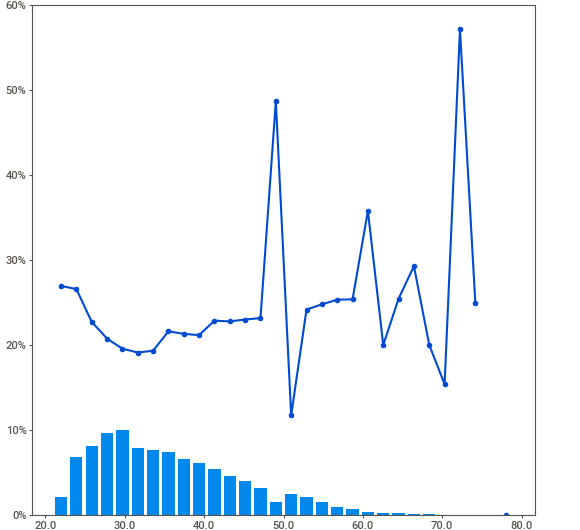
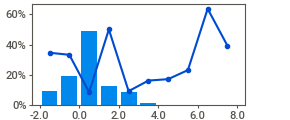
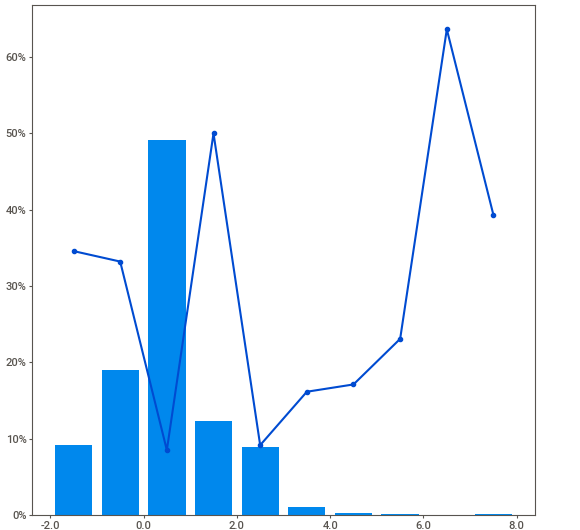
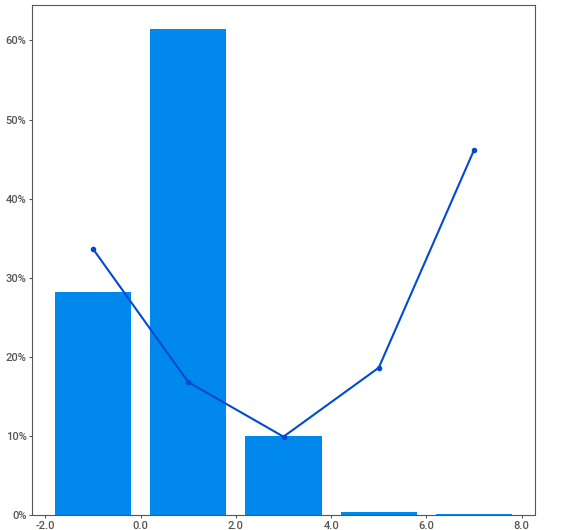
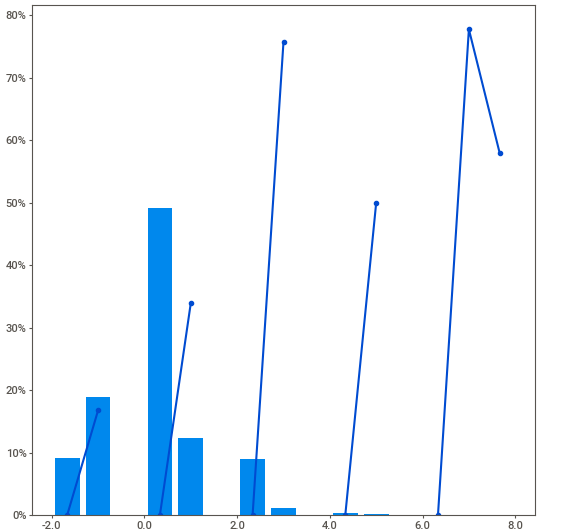
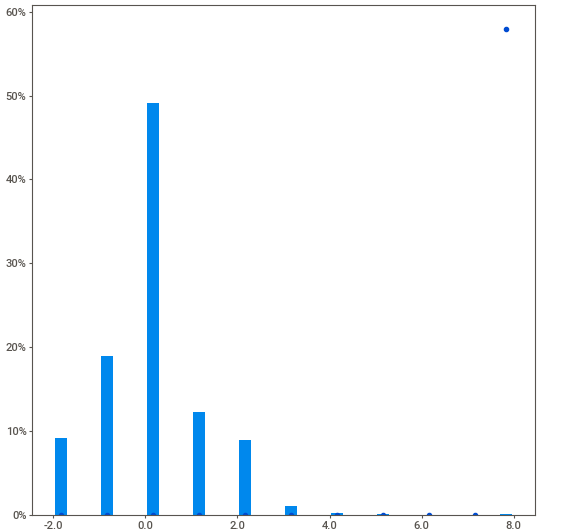
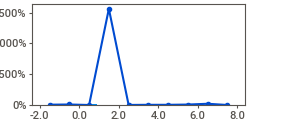
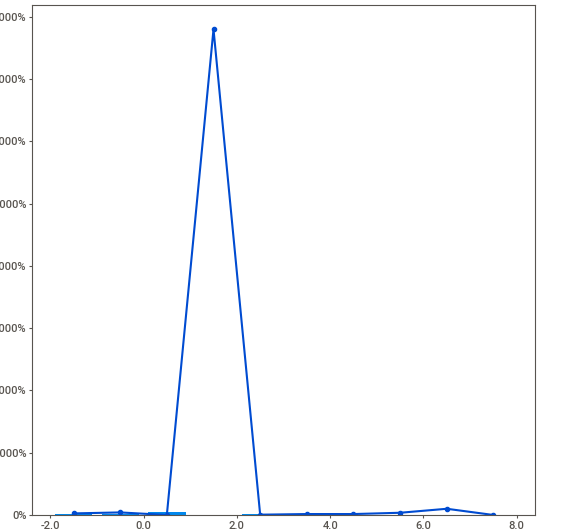
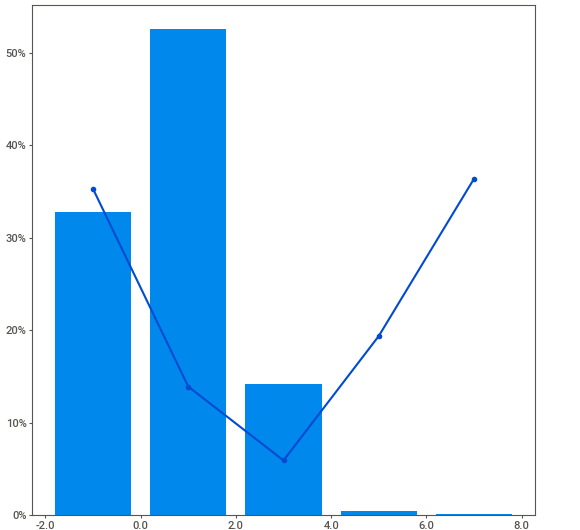
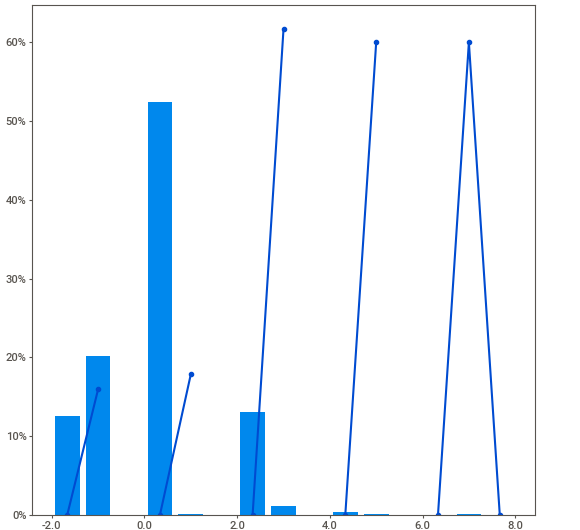
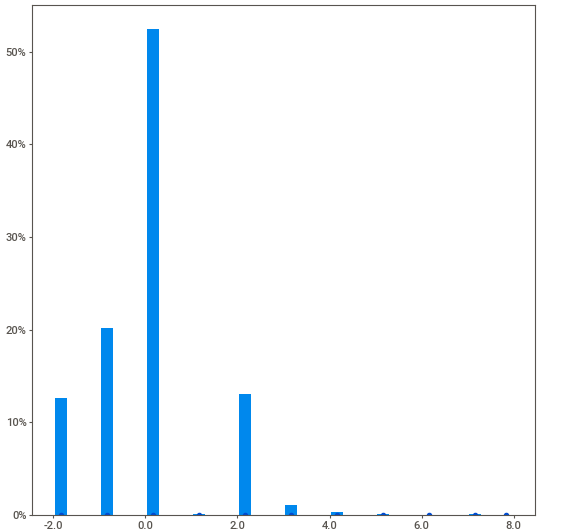
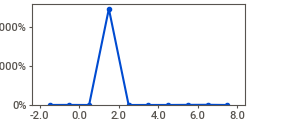
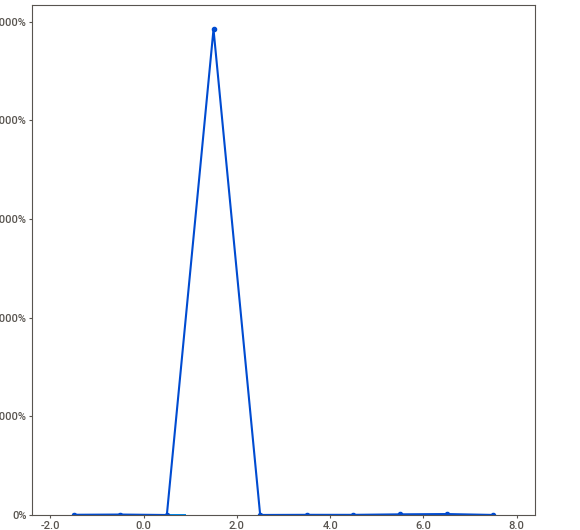
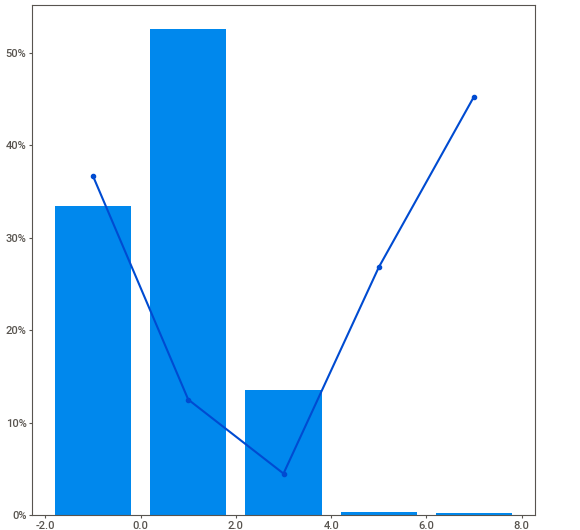
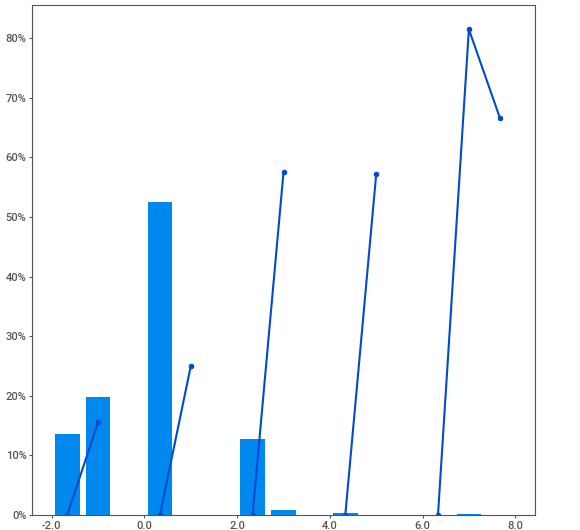
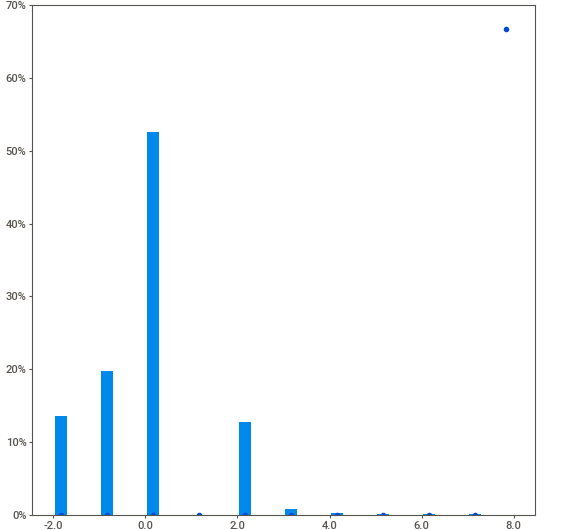
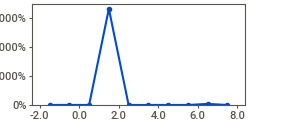
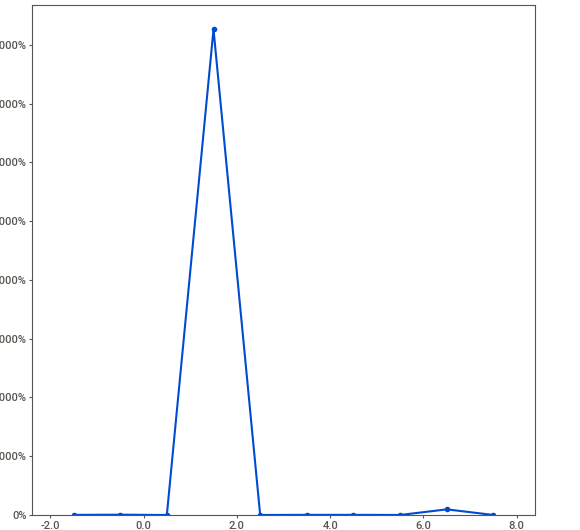
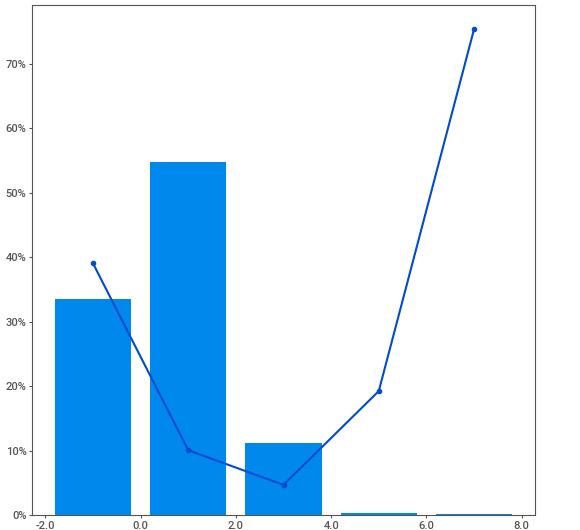
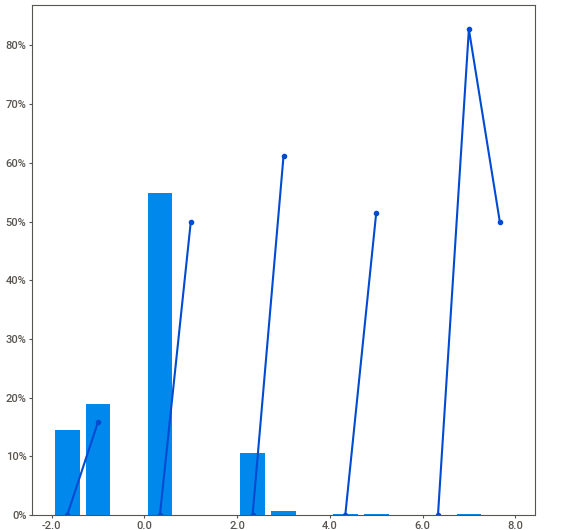
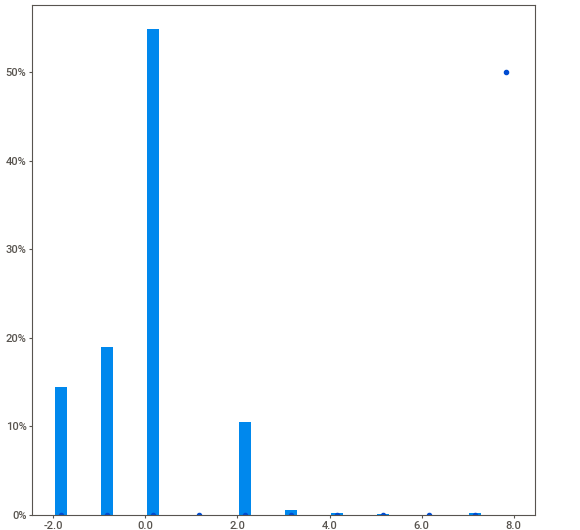
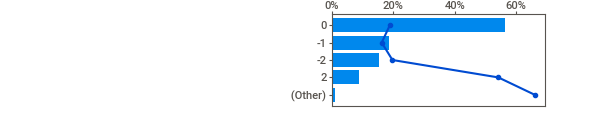
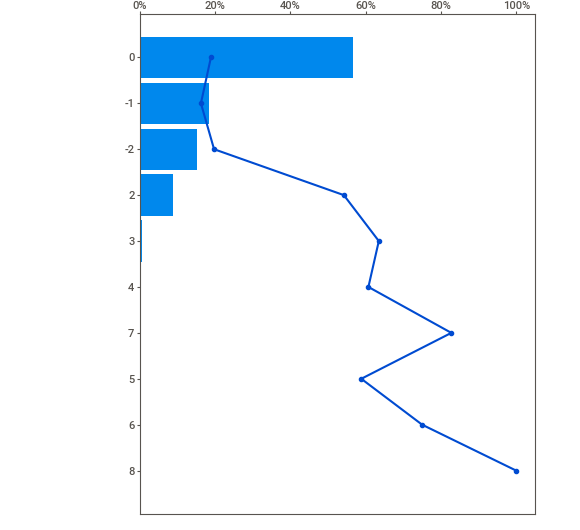
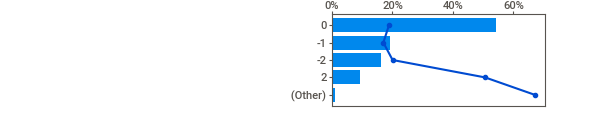
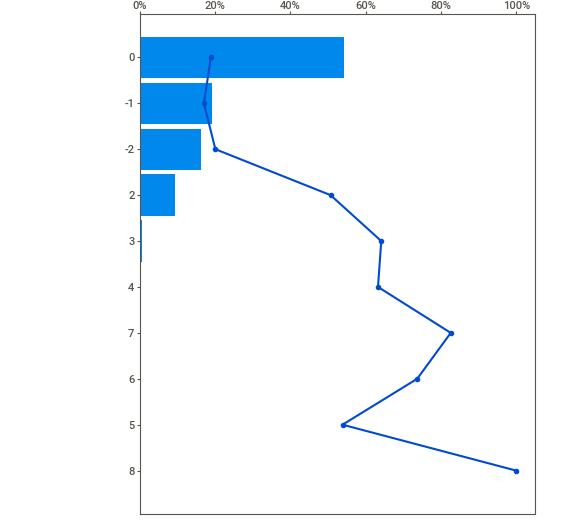
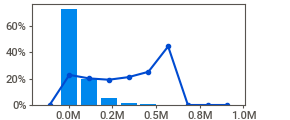
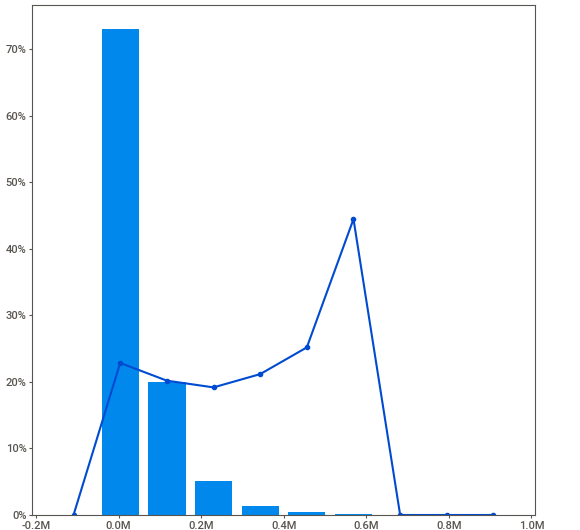
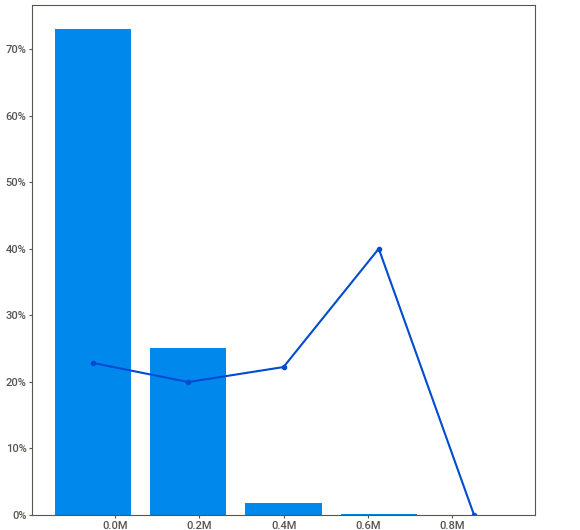
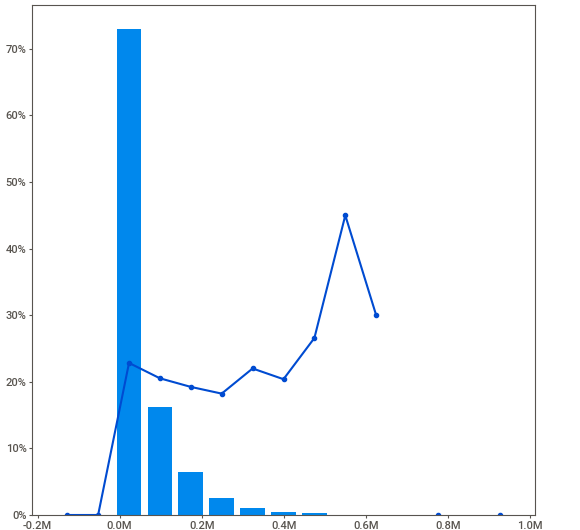
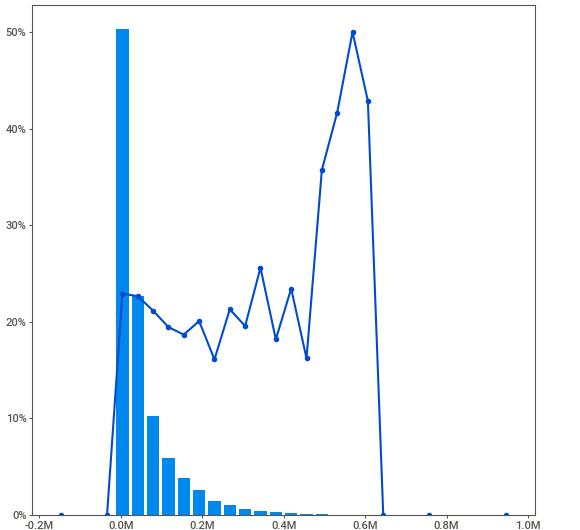
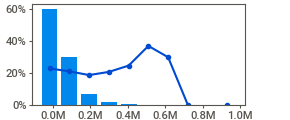
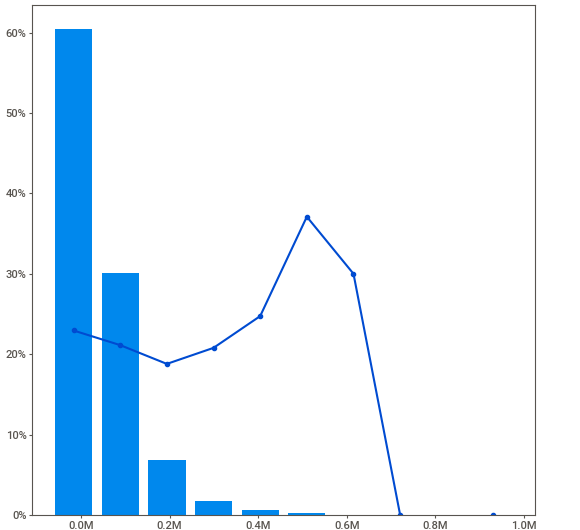
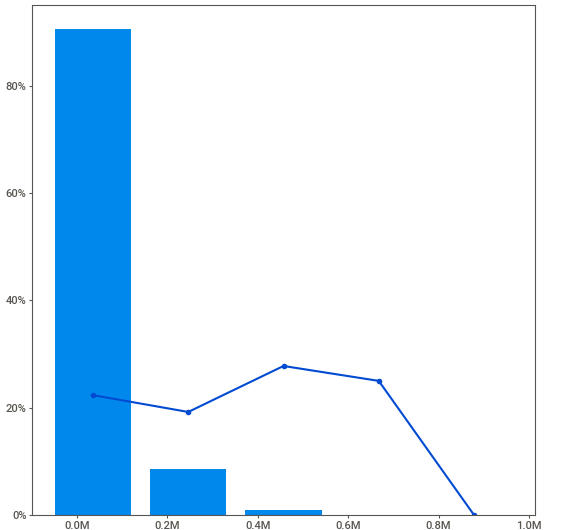
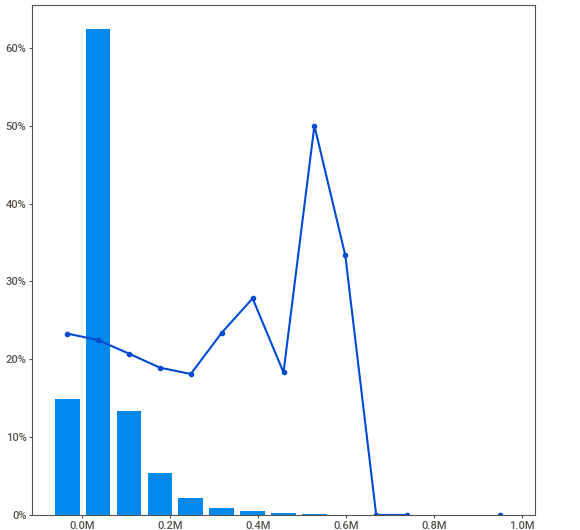
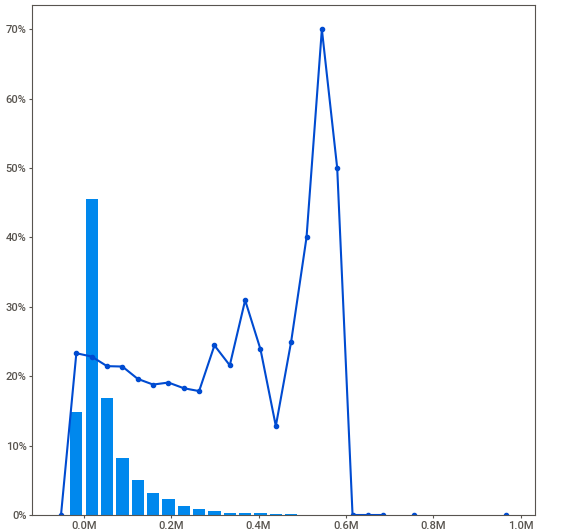
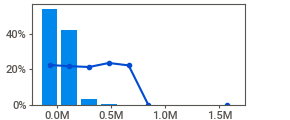
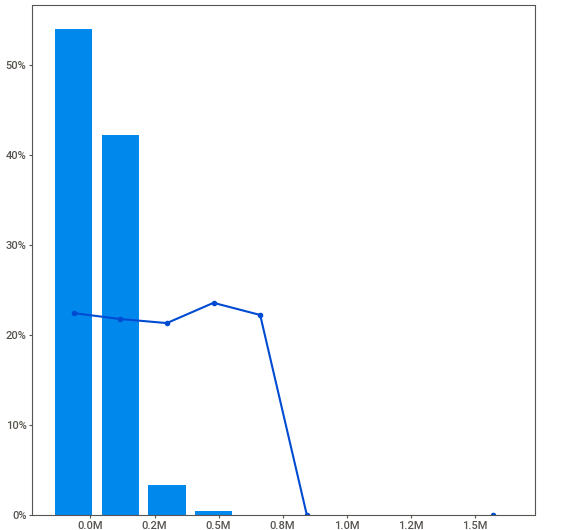
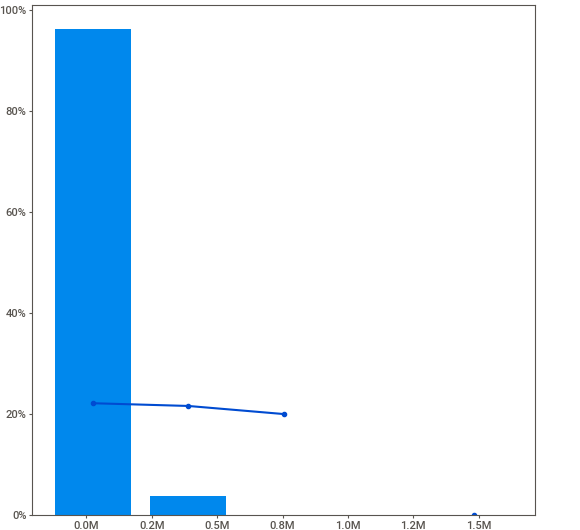
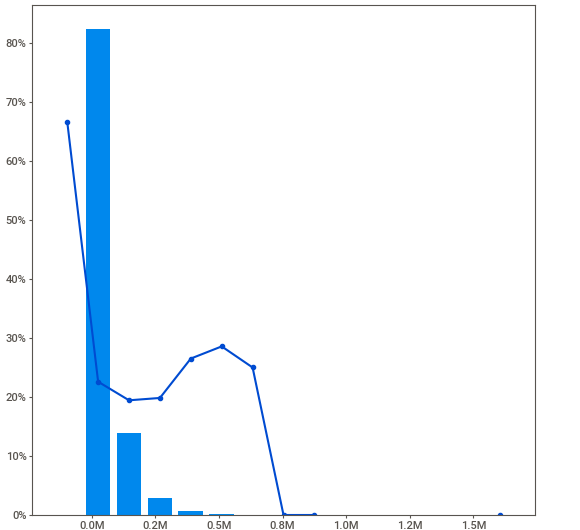
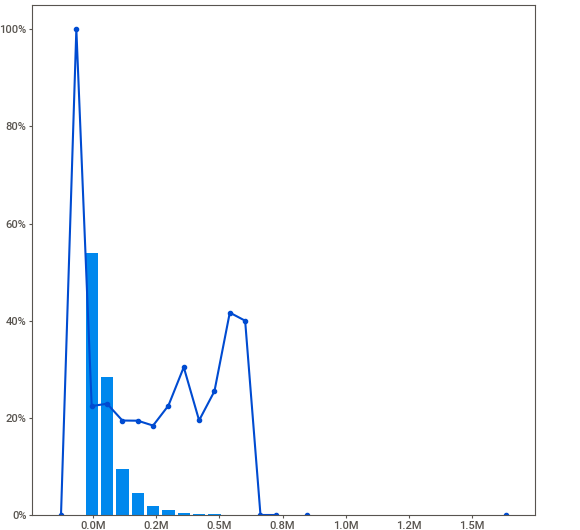
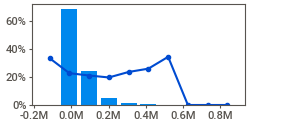
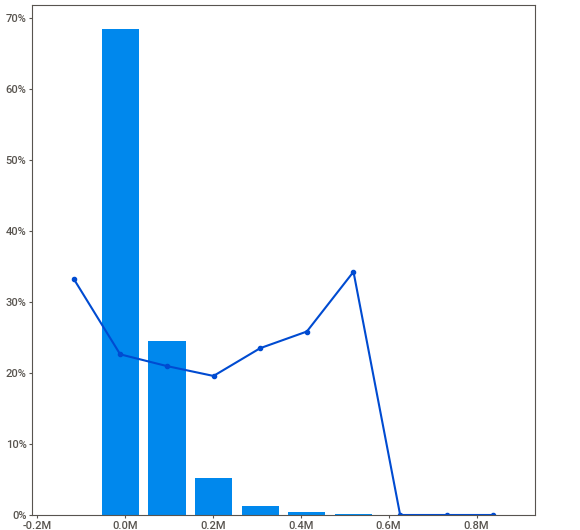
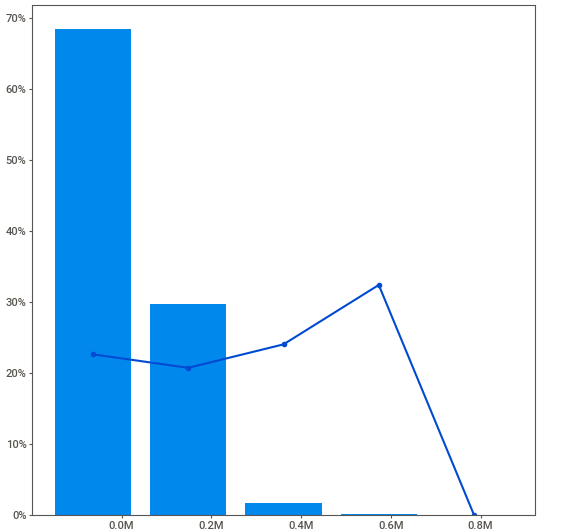
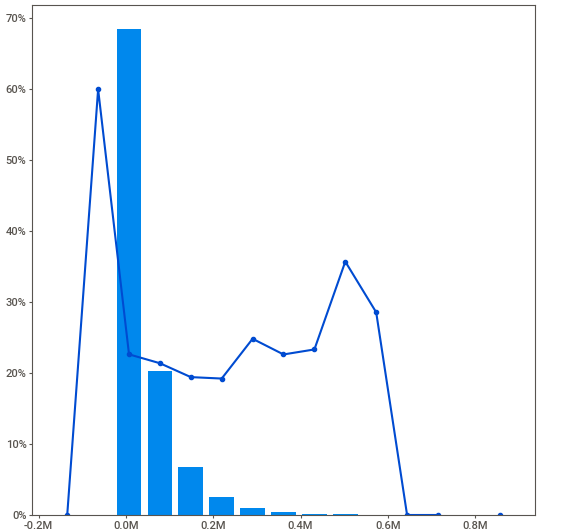
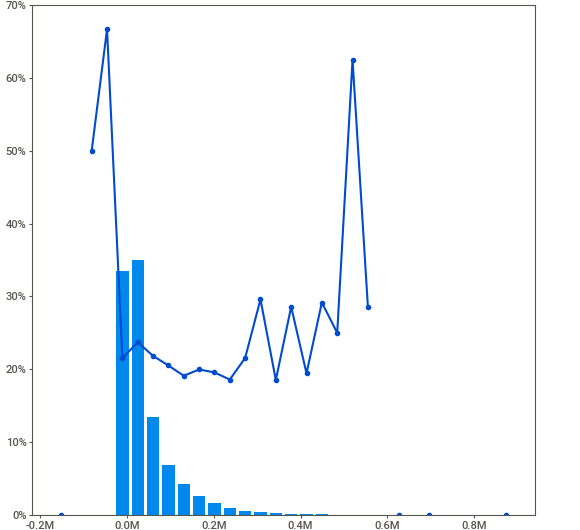
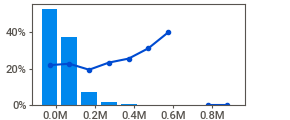
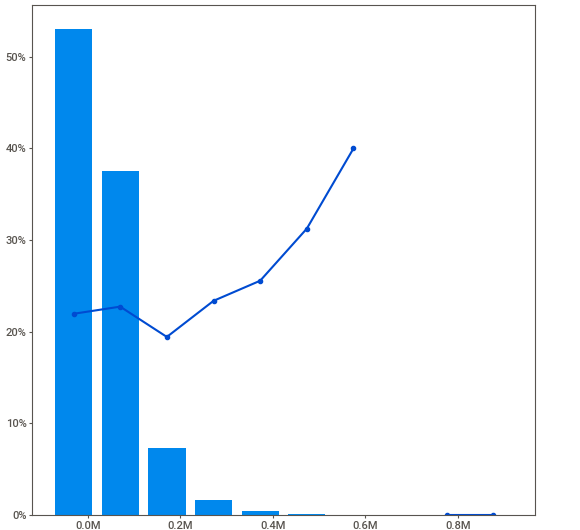
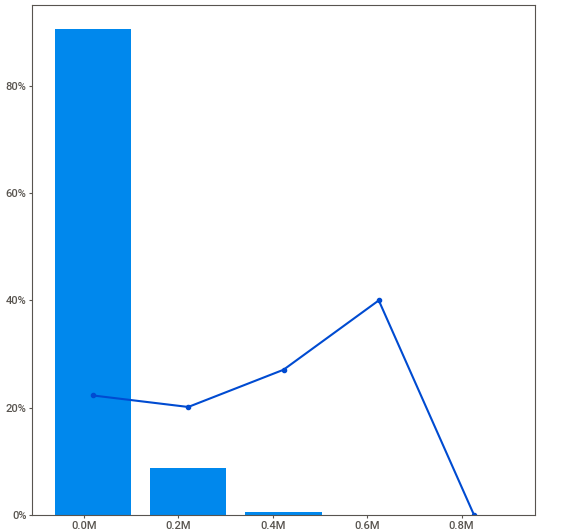
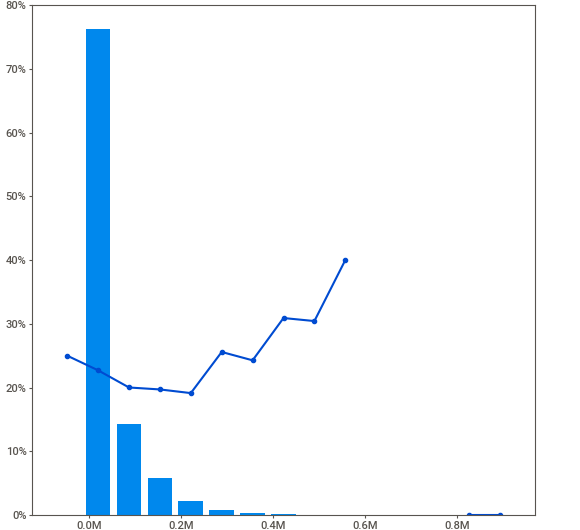
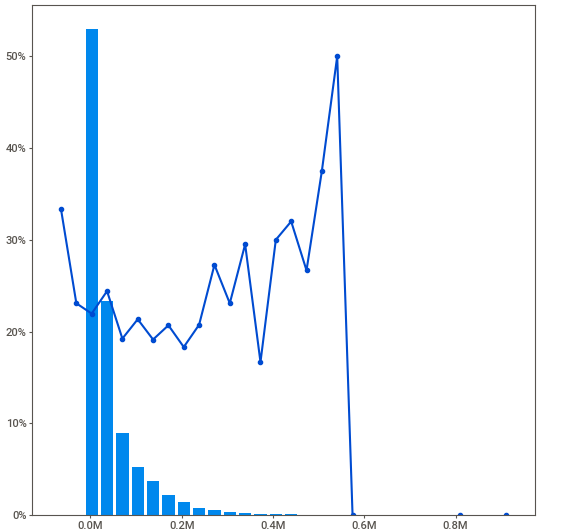
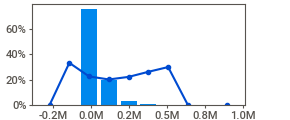
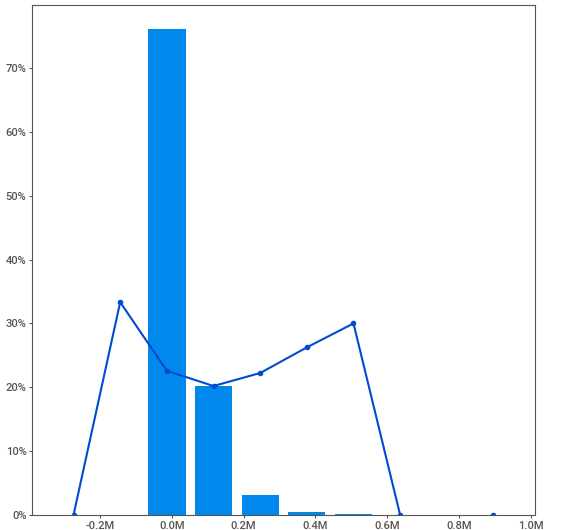
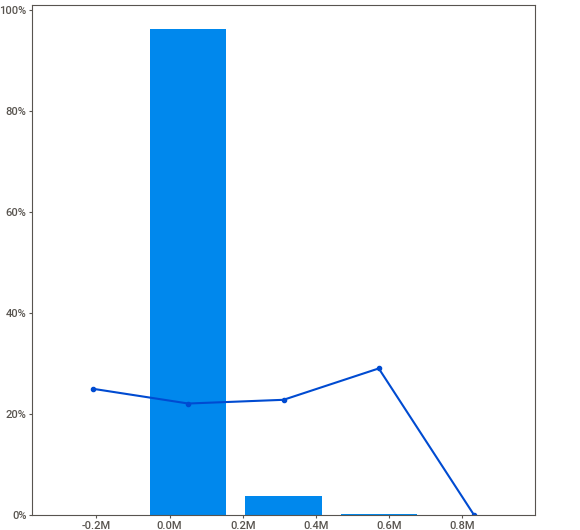
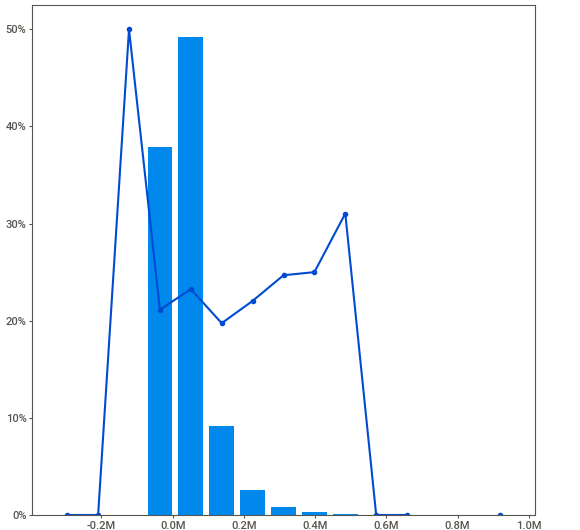
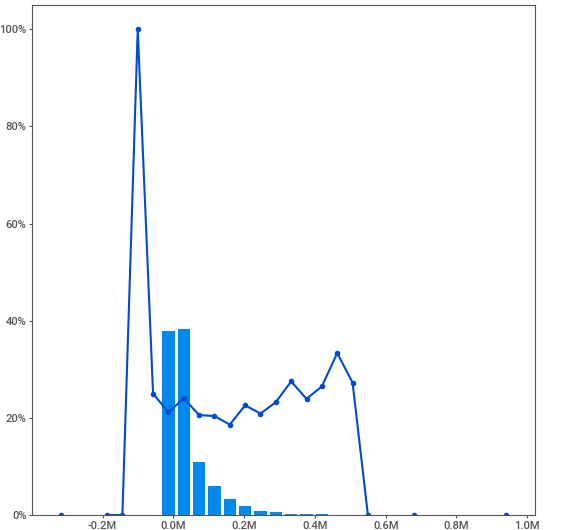
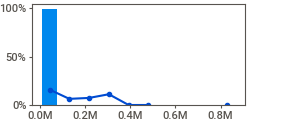
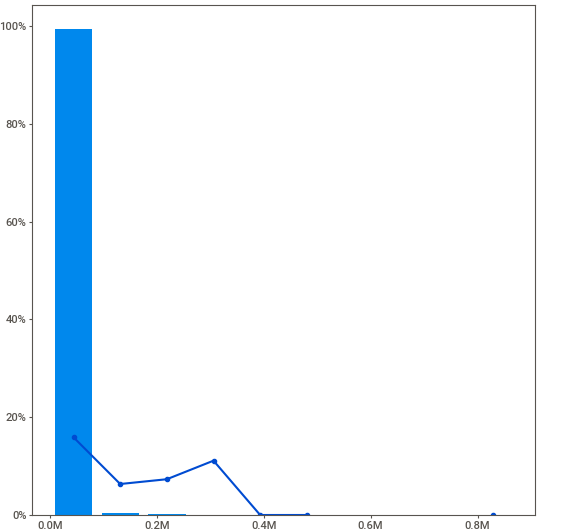
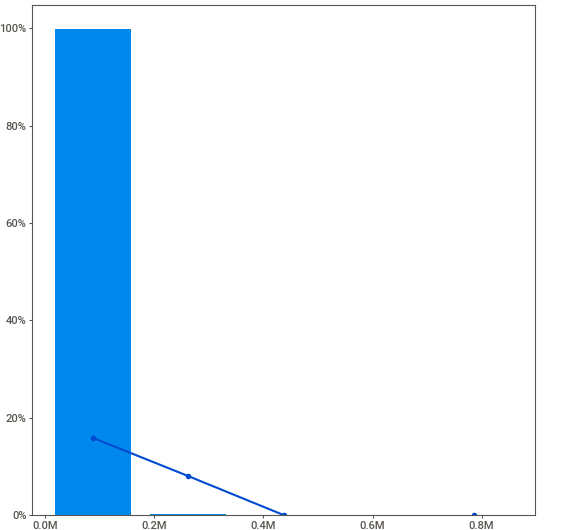
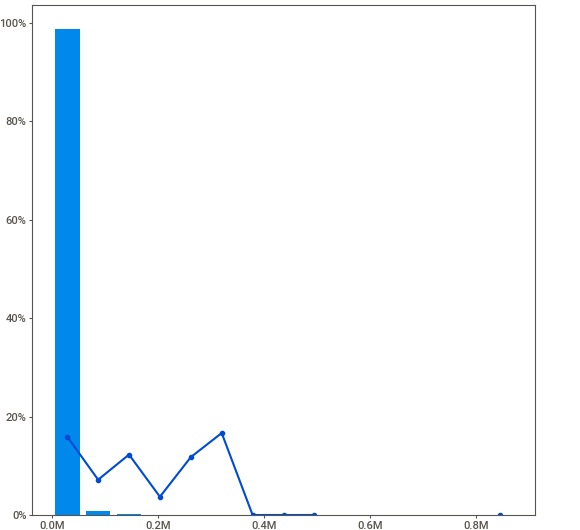
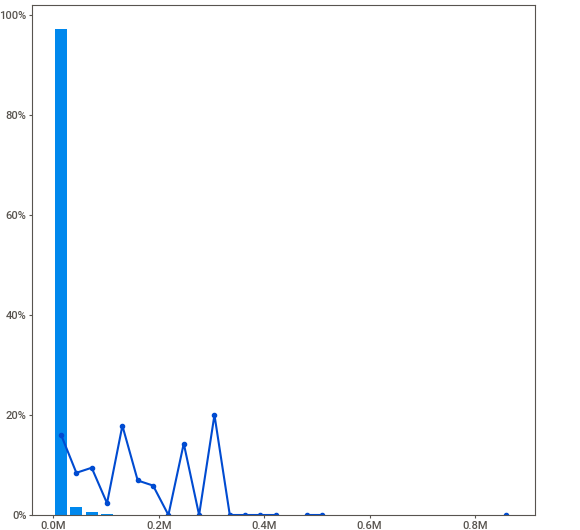
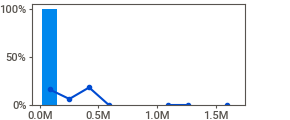
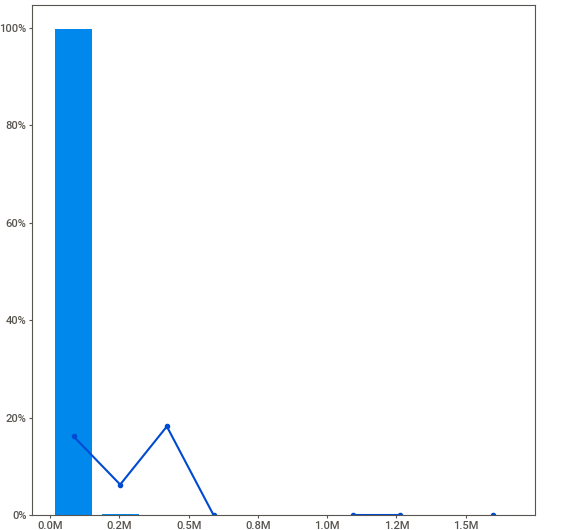
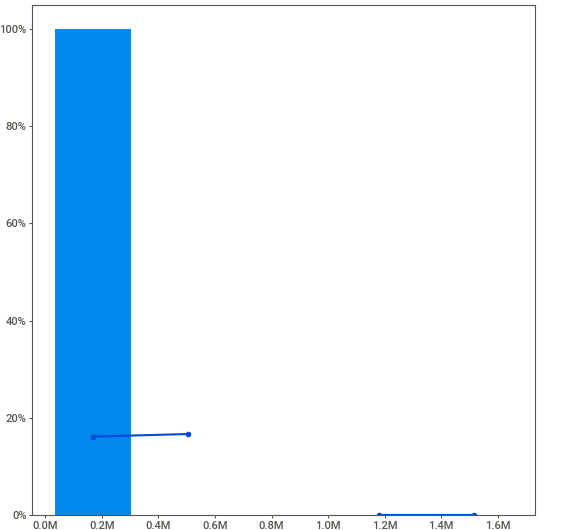
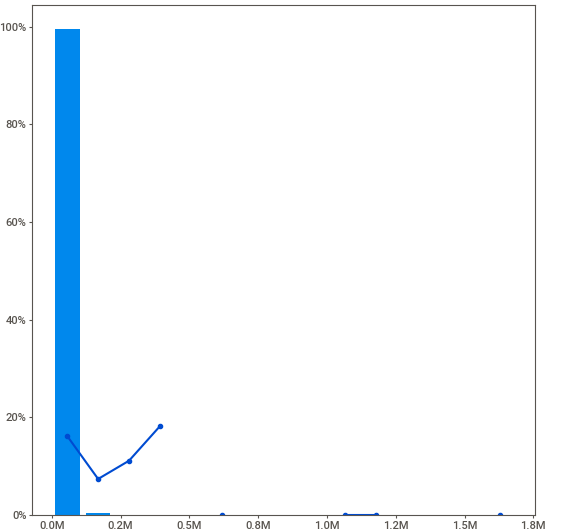
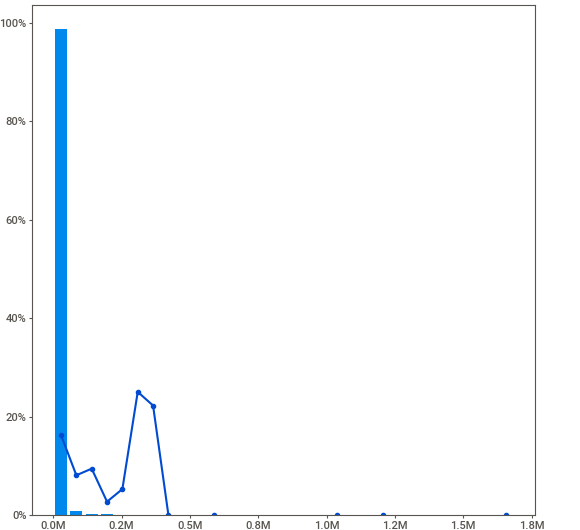
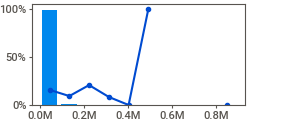
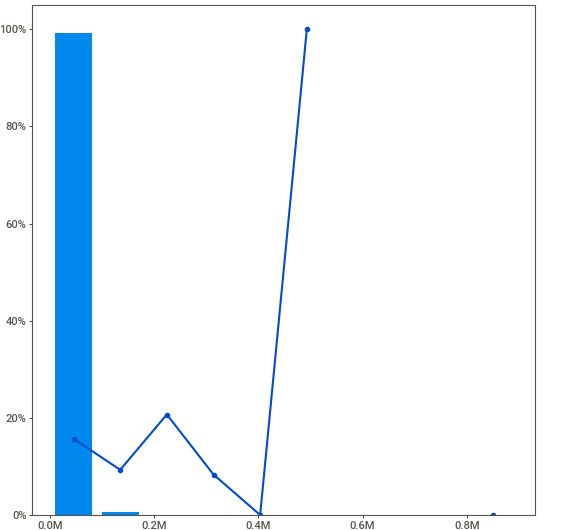
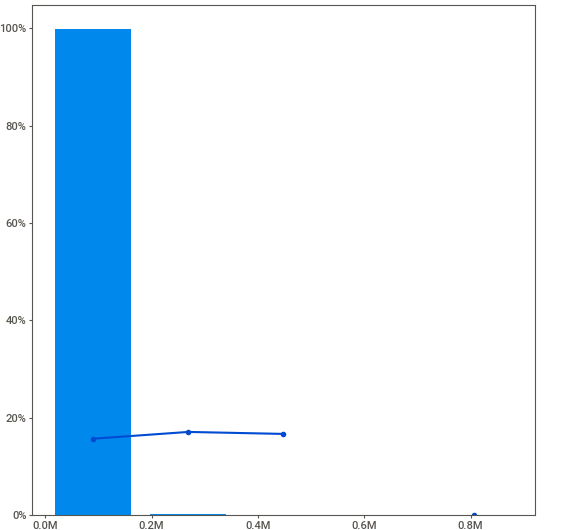
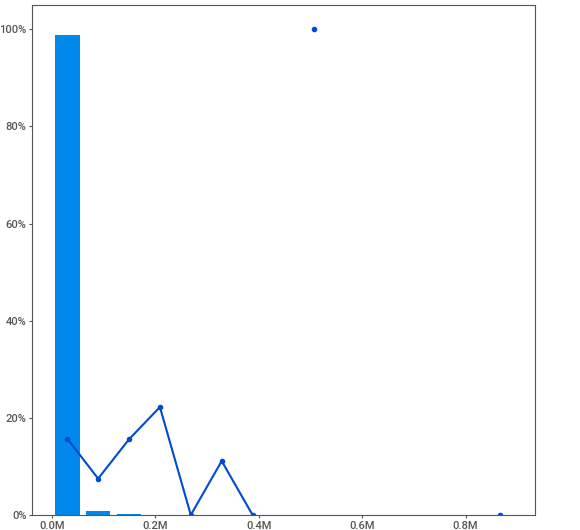
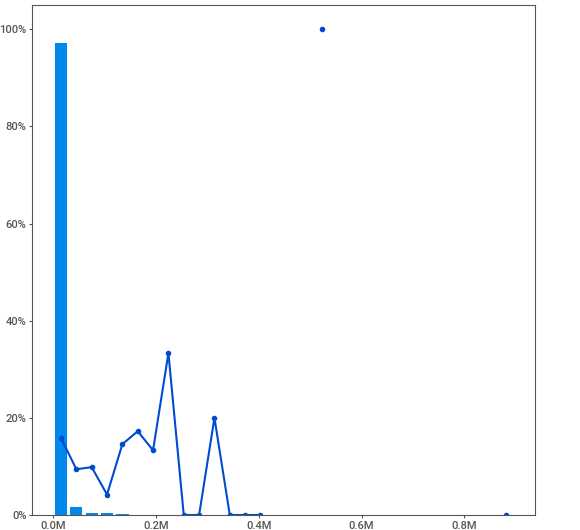
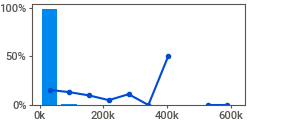
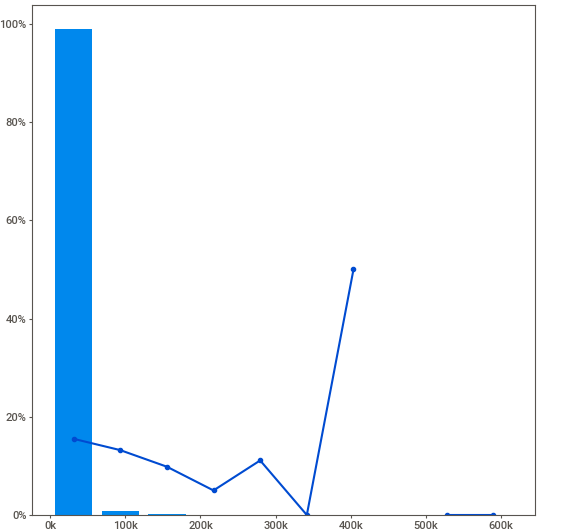
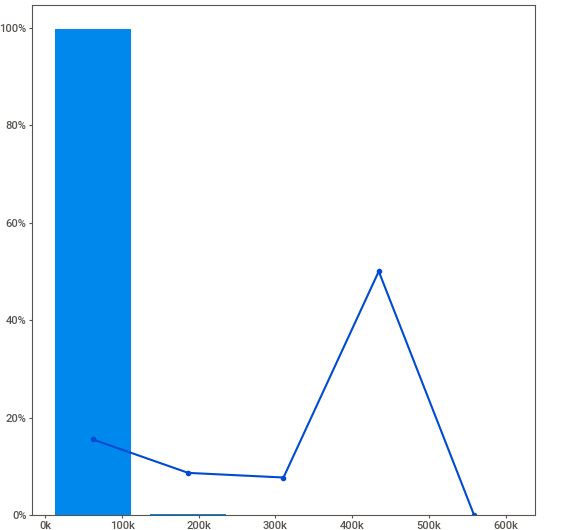
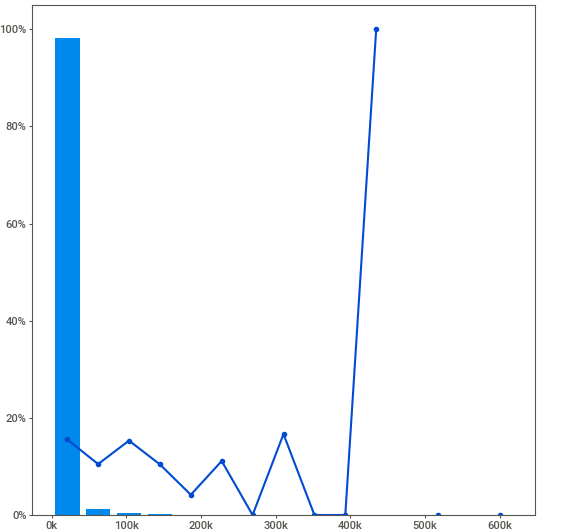
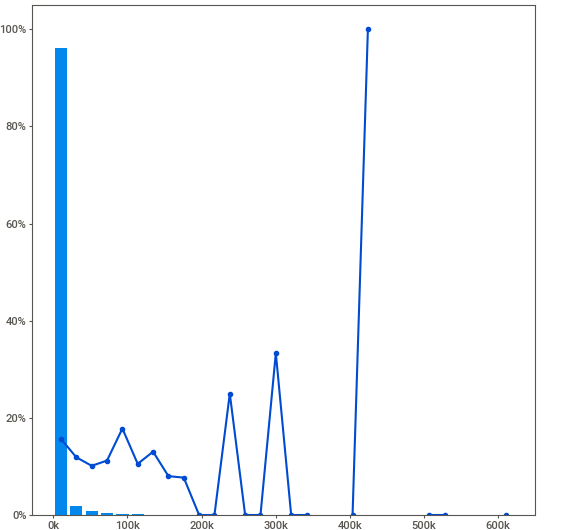
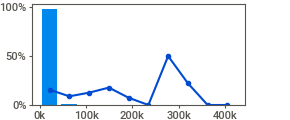
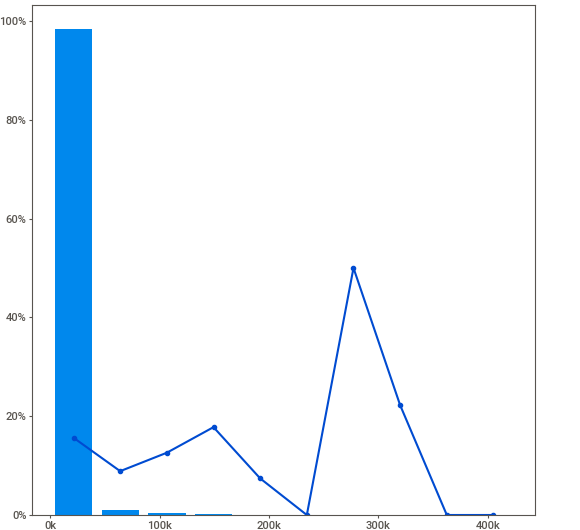
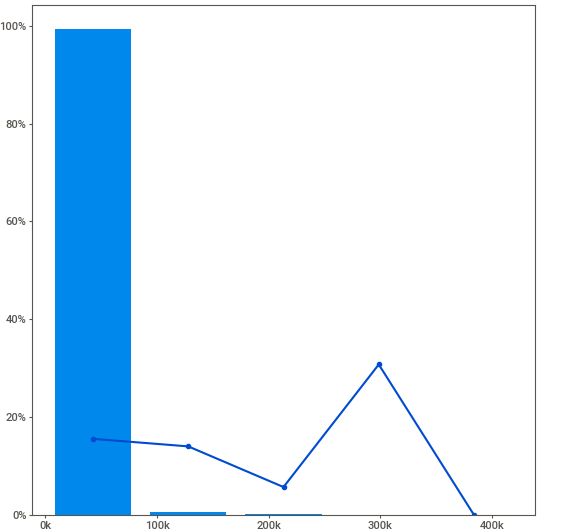
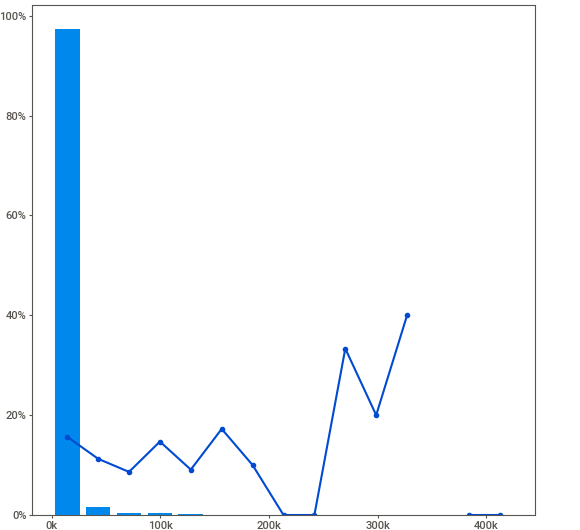
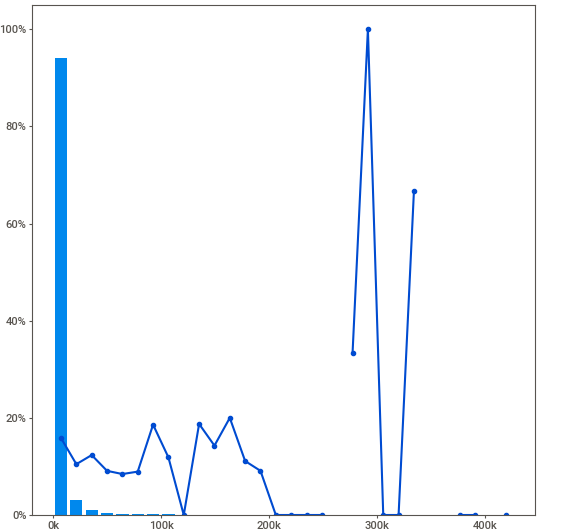
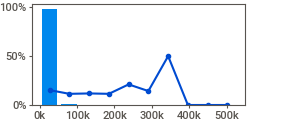
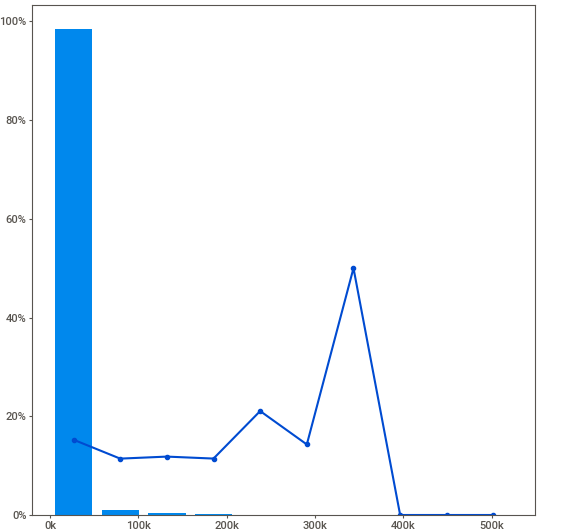
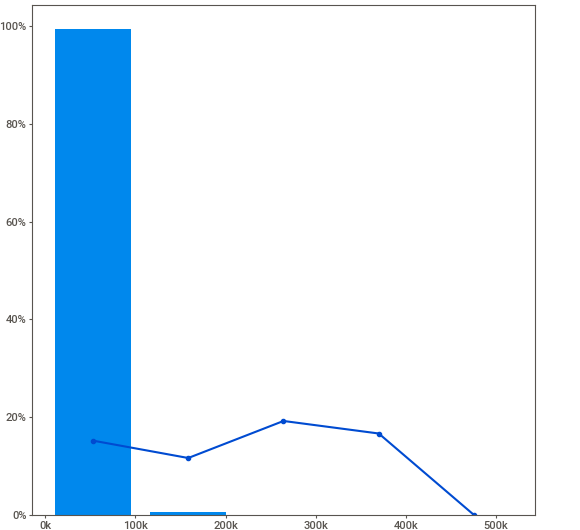
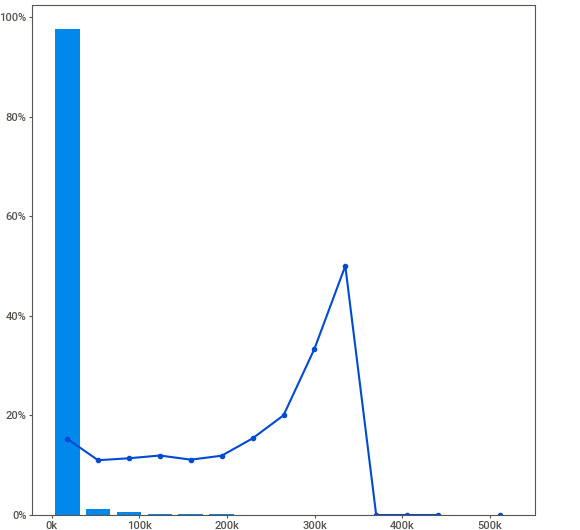
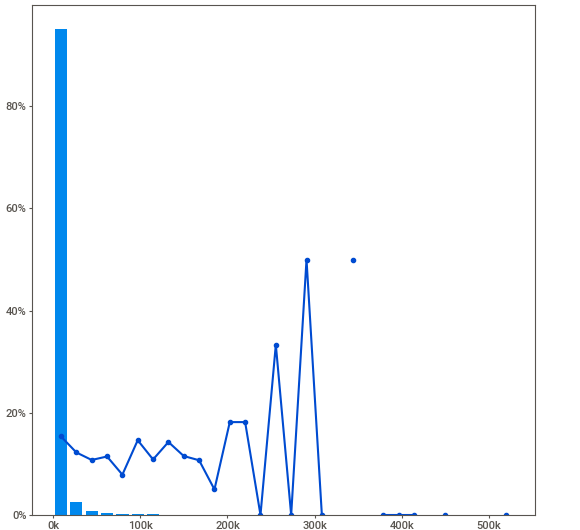
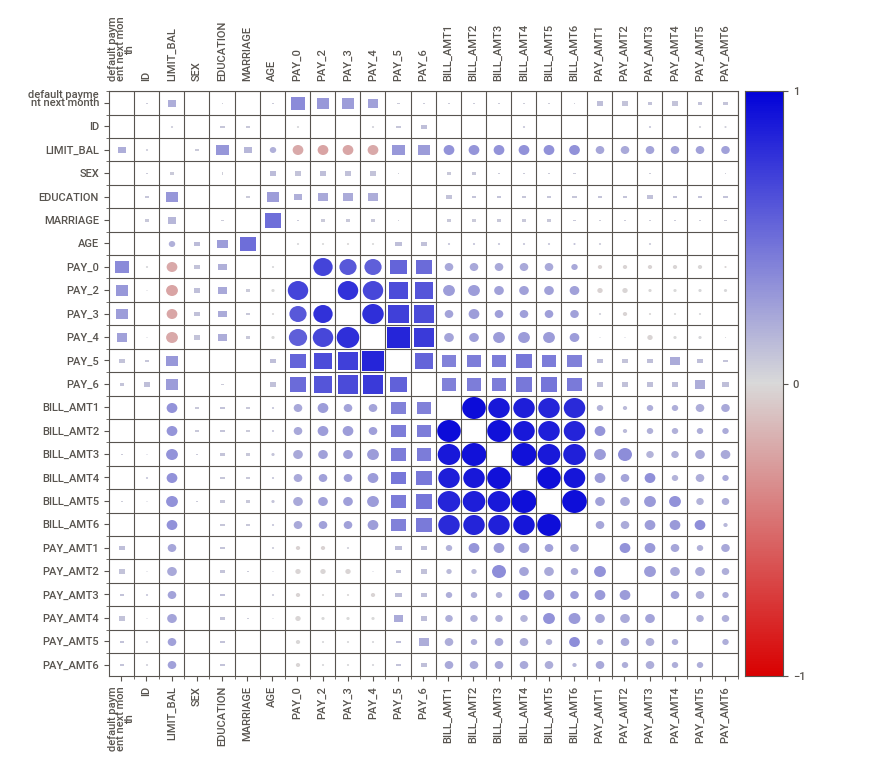
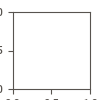

In [24]:
my_analyze.show_notebook()

## Division des données en 3 ensembles : Entrainement, Validation et Test

Il est courant de diviser les données en trois ensembles distincts : l'ensemble d'entraînement, l'ensemble de validation et l'ensemble de test. Cette approche est souvent utilisée pour ajuster les hyperparamètres du modèle et évaluer sa performance de manière plus robuste.

Voici comment vous pouvez effectuer cette division en utilisant scikit-learn :

In [25]:
# Séparer les caractéristiques (X) de la variable cible (y)
X = df.drop(columns=['id', 'default_payment_next_month'])
y = df['default_payment_next_month']

# Diviser les données en ensembles d'entraînement, de validation et de test
# Par exemple, 60% pour l'entraînement, 20% pour la validation et 20% pour le test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Afficher la taille des ensembles d'entraînement, de validation et de test
print("Taille de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Taille de l'ensemble de validation :", X_val.shape, y_val.shape)
print("Taille de l'ensemble de test :", X_test.shape, y_test.shape)
print("")
print("Distribution des classes dans chaque ensemble ----")
print(f"Total: {y.value_counts(normalize=True).values}")
print(f"Train: {y_train.value_counts(normalize=True).values}")
print(f"Valid: {y_val.value_counts(normalize=True).values}")
print(f"Test: {y_test.value_counts(normalize=True).values}")

Taille de l'ensemble d'entraînement : (18000, 23) (18000,)
Taille de l'ensemble de validation : (6000, 23) (6000,)
Taille de l'ensemble de test : (6000, 23) (6000,)

Distribution des classes dans chaque ensemble ----
Total: [0.7788 0.2212]
Train: [0.77816667 0.22183333]
Valid: [0.77966667 0.22033333]
Test: [0.77983333 0.22016667]


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 2758 to 23654
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   limit_bal             18000 non-null  int64   
 1   sex                   18000 non-null  category
 2   education             18000 non-null  category
 3   marriage              18000 non-null  category
 4   age                   18000 non-null  int64   
 5   payment_status_sep    18000 non-null  category
 6   payment_status_aug    18000 non-null  category
 7   payment_status_jul    18000 non-null  category
 8   payment_status_jun    18000 non-null  category
 9   payment_status_may    18000 non-null  category
 10  payment_status_apr    18000 non-null  category
 11  bill_statement_sep    18000 non-null  int64   
 12  bill_statement_aug    18000 non-null  int64   
 13  bill_statement_jul    18000 non-null  int64   
 14  bill_statement_jun    18000 non-null  int64   
 15  bill

In [27]:
# Nombre de valeurs manquantes par colonne
X_train.isna().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

## Pipeline de Modélisation

In [28]:
cat_features = ['sex', 'education', 'marriage']

num_features = [c for c in X_train.columns if c not in cat_features]
num_features

['limit_bal',
 'age',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr',
 'bill_statement_sep',
 'bill_statement_aug',
 'bill_statement_jul',
 'bill_statement_jun',
 'bill_statement_may',
 'bill_statement_apr',
 'previous_payment_sep',
 'previous_payment_aug',
 'previous_payment_jul',
 'previous_payment_jun',
 'previous_payment_may',
 'previous_payment_apr']

In [29]:
# Création de transformateurs pour les colonnes catégorielles et numériques
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))  # Utilisation de l'encodage one-hot
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalisation des caractéristiques numériques
])

# Création du transformateur de colonnes en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Création du modèle (dans cet exemple, nous utilisons un RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Création du pipeline complet
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [30]:
# Entraînement du modèle en utilisant l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model', RandomForestClassifier(random_state=42))])

{'accuracy': 0.8143333333333334,
 'precision': 0.6333333333333333,
 'recall': 0.37367624810892586,
 'specificity': 0.9388627618640445,
 'f1_score': 0.4700285442435775,
 'cohens_kappa': 0.36642628022840507,
 'matthews_corr_coeff': 0.38518335851490765,
 'roc_auc': 0.7706381756689018,
 'pr_auc': 0.530144714112875,
 'average_precision': 0.5266418206491454}

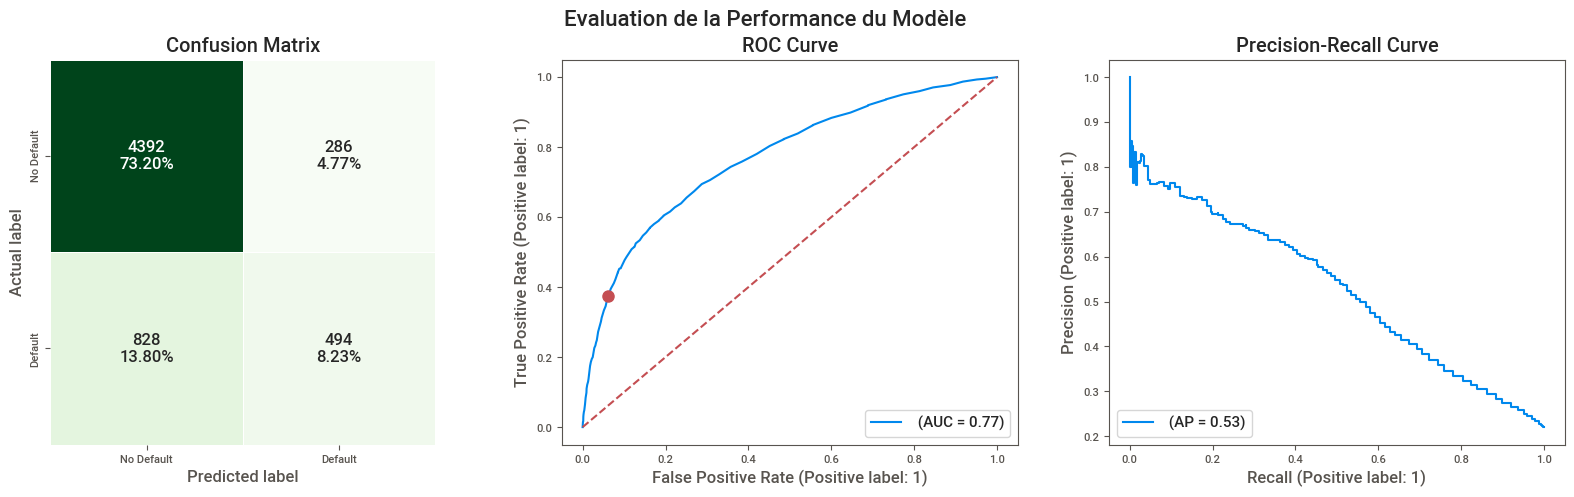

In [31]:
# Evaluation de la performance du pipeline modèle
LABELS = ["No Default", "Default"]
performance_evaluation_report(
    pipeline, X_val, y_val, labels=LABELS, 
    show_plot=True, show_pr_curve=True
)

***Explication de la fonction performance_evaluation_report*** :

La fonction `performance_evaluation_report` est conçue pour évaluer les performances d'un modèle de classification en générant un rapport qui inclut plusieurs métriques d'évaluation. Voici comment cette fonction fonctionne :

1. Prédiction :

    - La fonction commence par utiliser le modèle donné pour prédire les étiquettes de classe sur l'ensemble de test `X_test`. Elle stocke les prédictions dans `y_pred` et les probabilités de classe positives (si disponibles) dans `y_pred_prob`.

2. Matrices de confusion et métriques :

    - La fonction calcule la matrice de confusion à partir des étiquettes réelles y_test et des prédictions `y_pred`. La matrice de confusion est décomposée en quatre valeurs : vrais positifs (tp), faux positifs (fp), vrais négatifs (tn) et faux négatifs (fn).

3. Courbe ROC et métriques associées :

    - La fonction calcule la courbe ROC (Receiver Operating Characteristic) en utilisant les taux de faux positifs (fpr) et les taux de vrais positifs (tpr) calculés à partir des probabilités de classe positives et des étiquettes réelles. Elle calcule également la valeur de l'aire sous la courbe ROC (ROC-AUC).

4. Courbe PR et métriques associées (optionnel) :

    - Si l'option `show_pr_curve` est activée, la fonction calcule la courbe de précision-rappel (Precision-Recall) en utilisant la précision et le rappel calculés à partir des probabilités de classe positives et des étiquettes réelles. Elle calcule également la valeur de l'aire sous la courbe PR (PR-AUC).

5. Création du graphique (optionnel) :

    - Si l'option `show_plot` est activée, la fonction génère un graphique avec jusqu'à trois sous-graphiques, en fonction des options `show_pr_curve`. Les sous-graphiques sont les suivants :

        - Matrice de confusion avec des étiquettes des axes des x et des y, ainsi que des pourcentages dans les cellules.

        - Courbe ROC avec le ROC-AUC, un point de décision et la ligne de référence (diagonale).

        - Courbe PR avec le PR-AUC.

6. Métriques de performance :

    - La fonction calcule plusieurs métriques de performance, notamment l'exactitude (accuracy), la précision (precision), le rappel (recall), la spécificité (specificity), le score F1 (f1_score), le coefficient kappa de Cohen (cohens_kappa), le coefficient de corrélation de Matthews (matthews_corr_coeff), l'aire sous la courbe ROC (roc_auc), l'aire sous la courbe PR (pr_auc) et la précision moyenne (average_precision).

7. Renvoi des métriques :

    - La fonction renvoie un objet de type `pd.Series` contenant toutes les métriques calculées. Cette série est structurée de manière à fournir un aperçu complet des performances du modèle.

En résumé, la fonction `performance_evaluation_report` effectue des prédictions, calcule diverses métriques de performance et génère un rapport visuel sous forme de graphique (si demandé). Cela permet d'obtenir une évaluation complète des performances du modèle de classification.

## Réglage des hyperparamètres avec une recherche par grille (Grid Search)

In [32]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

Ce code crée un objet de validation croisée stratifiée (StratifiedKFold) pour diviser un ensemble de données en cinq plis (folds) pour la validation croisée (cross-validation) avec les caractéristiques suivantes :

* n_splits=5 : Cela signifie que l'ensemble de données sera divisé en cinq plis, ce qui est couramment utilisé pour la validation croisée à cinq plis.

* shuffle=True : Cela indique que les données seront mélangées aléatoirement avant d'être divisées en plis. Le mélange aléatoire des données est utile pour garantir que les plis ne sont pas biaisés en fonction de l'ordre des données. Le mélange aléatoire est effectué en utilisant la graine (seed) définie par random_state=42, ce qui garantit que le mélange est reproductible si la même graine est utilisée.

En résumé, l'objet k_fold de validation croisée stratifiée sera utilisé pour diviser l'ensemble de données en cinq plis de manière aléatoire et stratifiée, ce qui est couramment utilisé pour évaluer la performance d'un modèle sur différents sous-ensembles de données dans le cadre de la validation croisée. La stratification garantit que la répartition des classes cibles (si vous effectuez une classification) est préservée dans chaque pli, ce qui est important pour obtenir des résultats de validation croisée fiables.

In [33]:
# Evaluation du pipeline à l'aide d'une validation croisée
scores_cv = cross_val_score(pipeline, X_train, y_train, cv=k_fold)
print(scores_cv)
print(np.mean(scores_cv))
print(np.std(scores_cv))

[0.82583333 0.8125     0.81166667 0.81944444 0.81277778]
0.8164444444444443
0.005458598382029598


In [34]:
# Ajout d'autres métriques à la validation croisée
cv_scores = cross_validate(pipeline, X_train, y_train, cv=k_fold,
                           scoring=["accuracy", "precision", "recall",
                                    "roc_auc"])
pd.DataFrame(cv_scores)

fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  16.842695    0.377567       0.825833        0.683084     0.399749   
1  16.546203    0.367149       0.812500        0.633406     0.365915   
2  17.091233    0.335738       0.811667        0.631808     0.362954   
3  16.128960    0.314891       0.819444        0.658174     0.387985   
4  16.558726    0.429250       0.812778        0.645012     0.347935   

   test_roc_auc  
0      0.768261  
1      0.761883  
2      0.758544  
3      0.760188  
4      0.761862

In [35]:
# Définition de la grille de paramètres
param_grid = {
    "model__criterion": ["entropy", "gini"],
    "model__max_depth": range(7, 11),
    "model__n_estimators": [150, 200, 250]
}
# on peut aussi régler des hyperparamètres des composants du preprocessor
  # Exemple : "preprocessor__numerical__outliers__n_std": [3, 4]

In [36]:
# Recherche des meilleurs hyperparamètres
classifier_gs = GridSearchCV(pipeline, param_grid,
                             scoring="roc_auc", cv=k_fold,
                             n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

print(f"Best parameters: {classifier_gs.best_params_}")
print(f"roc_auc (Training set): {classifier_gs.best_score_:.4f}")
print(f"roc_auc (Validation set): {metrics.roc_auc_score(y_val, classifier_gs.predict(X_val)):.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__n_estimators': 250}
roc_auc (Training set): 0.7779
roc_auc (Validation set): 0.6516


{'accuracy': 0.823,
 'precision': 0.6811188811188811,
 'recall': 0.36866010598031795,
 'specificity': 0.9512716392391537,
 'f1_score': 0.4783889980353634,
 'cohens_kappa': 0.3829748706542191,
 'matthews_corr_coeff': 0.40917562057855933,
 'roc_auc': 0.7824104641367141,
 'pr_auc': 0.557960577493893,
 'average_precision': 0.5582215226982382}

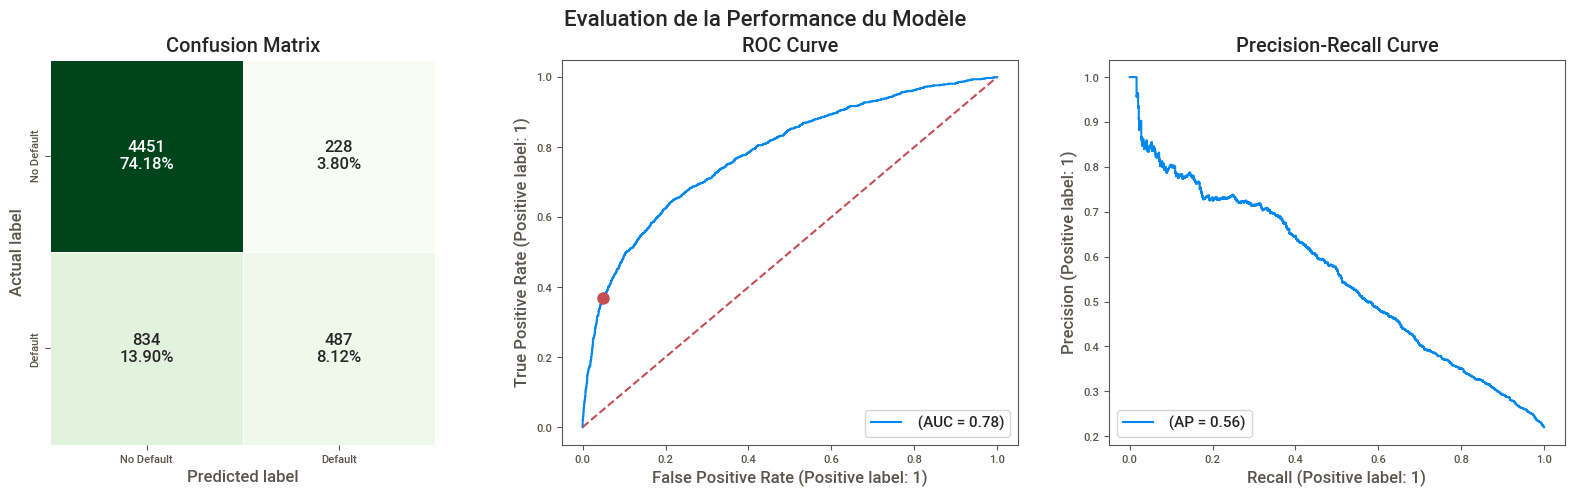

In [37]:
# Evaluation du meilleur modèle sur les données de test
LABELS = ["No Default", "Default"]
performance_evaluation_report(
    classifier_gs, X_test, y_test, labels=LABELS, 
    show_plot=True, show_pr_curve=True
)

In [38]:
import joblib

# Enregistrez le modèle dans un fichier
model_filename = "classifier_gs_model.pkl"
joblib.dump(classifier_gs, model_filename)

['classifier_gs_model.pkl']

In [39]:
# Charger le modèle depuis le fichier
loaded_model = joblib.load("classifier_gs_model.pkl")

# Vous pouvez maintenant utiliser loaded_model pour faire des prédictions, etc.

{'accuracy': 0.823,
 'precision': 0.6811188811188811,
 'recall': 0.36866010598031795,
 'specificity': 0.9512716392391537,
 'f1_score': 0.4783889980353634,
 'cohens_kappa': 0.3829748706542191,
 'matthews_corr_coeff': 0.40917562057855933,
 'roc_auc': 0.7824104641367141,
 'pr_auc': 0.557960577493893,
 'average_precision': 0.5582215226982382}

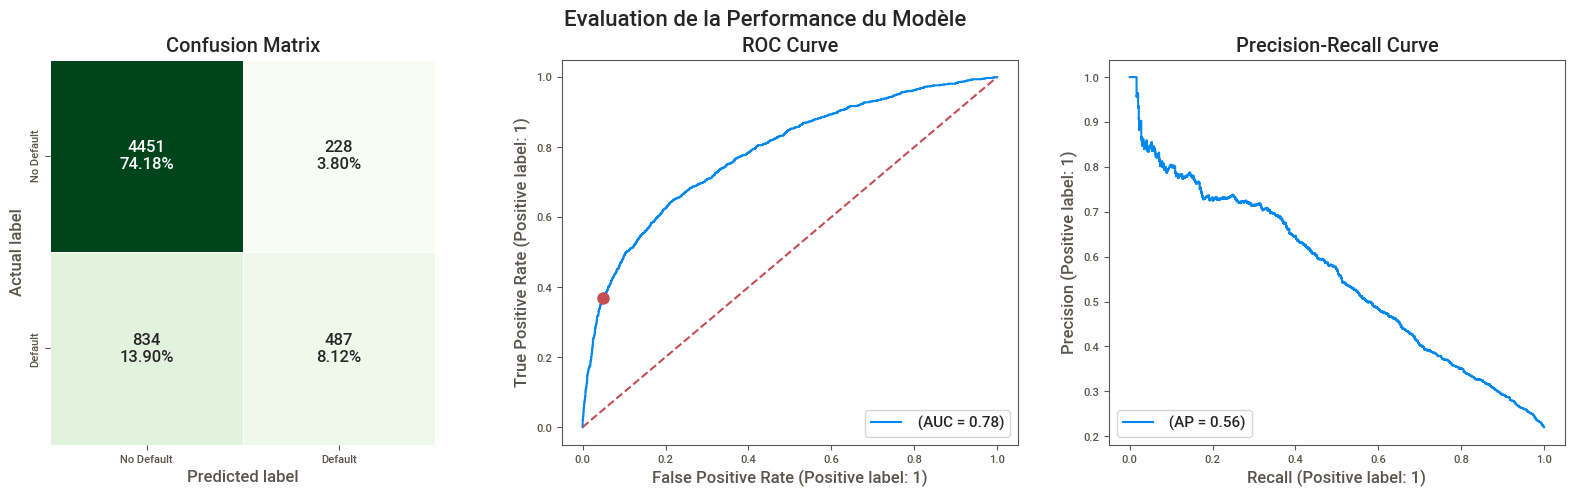

In [40]:
# Vérifier que le modèle chargé est le même que celui enregistré
performance_evaluation_report(
    loaded_model, X_test, y_test, labels=LABELS, 
    show_plot=True, show_pr_curve=True
)

## Utilisation du modèle

In [41]:
def make_prediction(model, features):
    prediction = model.predict(features)
    probability = model.predict_proba(features)
    probability = np.round(probability * 100, 2)
    return prediction, probability

In [42]:
X_train.head(3)

limit_bal     sex        education marriage  age payment_status_sep  \
2758      200000  Female  Graduate school   Single   23                 -2   
11337     120000    Male  Graduate school   Single   38                  0   
23149     280000  Female       University   Single   37                 -1   

      payment_status_aug payment_status_jul payment_status_jun  \
2758                  -2                 -2                 -2   
11337                  0                  0                  0   
23149                 -1                 -1                 -1   

      payment_status_may  ... bill_statement_jul  bill_statement_jun  \
2758                  -2  ...                488                 488   
11337                  0  ...              19920                9155   
23149                 -1  ...               1876                1876   

       bill_statement_may  bill_statement_apr  previous_payment_sep  \
2758                    0                1915                   878   
11337               14155                3867                  1575   
23149                1876                1870                  2716   

       previous_payment_aug  previous_payment_jul  previous_payment_jun  \
2758                    488                   488                     0   
11337                  1800                  1500                 14000   
23149                  1876                  1876                  1876   

       previous_payment_may  previous_payment_apr  
2758                   1915                   100  
11337                  4000                  2850  
23149                  1870                 10267  

[3 rows x 23 columns]

In [43]:
y_train.head(3)

2758     0
11337    0
23149    0
Name: default_payment_next_month, dtype: category
Categories (2, int64): [0, 1]

In [44]:
make_prediction(loaded_model, X_train.head(3))

(array([0, 0, 0], dtype=int64),
 array([[86.53, 13.47],
        [90.07,  9.93],
        [88.14, 11.86]]))